In [303]:
import pandas as pd

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/Capstone Project/

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Capstone Project


# **Reqire Liabraries**

In [304]:
# Required libraries for a classification problem

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Machine learning models and tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report,confusion_matrix,
                             accuracy_score, roc_auc_score,roc_curve,
                             recall_score, precision_score,f1_score)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingClassifier , RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier
from xgboost import XGBClassifier
# To enable plotting graphs
%matplotlib inline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Deep learning libraries
import tensorflow as tf
from tensorflow import keras



# **Data Collection**

In [305]:

data = pd.read_csv('MyBank.csv')
data.head()

,TransactionKey,ConnectionRegion,V1CF,V2CF,V3CF,V4CF,V5CF,TimeZone,AreaCode,ConnectionOrg,...,webSessOS,webSessWebBrowser,LastLong,LastLat,CurrentLong,CurrentLat,IsOldDevice,WebSessionRetail,MainEntityUse,Fraud
0,16758,south central@texas@us,99,98,10,803,19820,-5.0,602.0,013 netvision fix ip users,...,Mac OS X,Chrome,-108.5530,NaN,9.4400,NaN,0.0,0.0,NaN,0
1,8912,northeast@new york@us,99,94,61,602,16980,-4.0,512.0,013 netvision fix ip users,...,Windows 7,Edge,-121.8382,27.9860,-112.0826,33.7985,0.0,0.0,315.0,0
2,92186,mid atlantic@new jersey@us,76,95,66,505,35620,-6.0,407.0,013 netvision fix ip users,...,Windows 7,Mobile Safari,-74.0734,33.7985,-80.3120,32.8494,1.0,NaN,333.0,0
3,12924,south central@arkansas@us,99,23,50,0,35620,-5.0,202.0,013 netvision fix ip users,...,Windows 7,Mobile Safari,-88.1029,27.9860,-84.3883,42.1530,1.0,0.0,327.0,0
4,125650,mid atlantic@new jersey@us,99,74,80,602,19100,-8.0,313.0,013 netvision fix ip users,...,Windows 7,Chrome,-58.5244,34.9497,-111.3270,34.0476,1.0,0.0,394.0,0



# **Problem Statement =**

---


* Fraud Detection: Analyzing the transactional data to identify patterns indicative of fraudulent behavior. This could involve using features such as V1CF to V5CF, TimeZone, web session characteristics, and geographical information to build a predictive model for detecting fraudulent transactions.

* Customer Segmentation: Utilizing the features in the dataset to segment customers based on their transactional behavior, geographical location, or web session characteristics. This could help in targeted marketing or personalized customer experiences.

* Geographic Analysis: Analyzing the geographical distribution of transactions to identify regions with high or low activity, potential market expansion opportunities, or areas prone to certain types of fraud.

 # **Data Dictionary =**

---
- TransactionKey : Unique identifier for each transaction.
- ConnectionRegion : Region associated with the connection.(Region where the connection is established.)
- V1CF, V2CF, V3CF, V4CF, V5CF, V6CF : In banking, all stands for Volume 1 to 6 Comprehensive Finance(Comprehensive financial planning considers the entirety of your financial life. Your assets, your liabilities, your taxes, your income, your business — these aspects of your financial life are never isolated from each other. Occasionally or frequently, they interrelate). It refers to a type of financial management system where various financial services are provided in one place, including investment, loans, and insurance.
- TimeZone : Time zone information related to the transaction.
- AreaCode : Area code associated with the transaction.
- ConnectionOrg : Organization related to the connection.
- ConnectionType : Type of connection used for the transaction.
- ConnectionSpeed: Speed of the connection.
- channel : Channel through which the transaction was conducted.
- TransactionDateTime : Date and time of the transaction.
- AddressUpdateDate, EmailUpdateDate : Dates when address and email information were last updated.
- webSessOS, webSessWebBrowser : Operating system and web browser information from the web session.
- LastLong, LastLat, CurrentLong, CurrentLat : Longitude and latitude coordinates for the last and current locations.
- IsOldDevice : Binary indicator of whether the device is old or not.
- WebSessionRetail :  Web retail banking is the online banking that is for the retail customers(normal) of the bank, which includes the general population.  may not include large or multinational institutions.   (information of customer)
- MainEntityUse: an entity that includes the financial accounting net income or loss of a permanent establishment in its financial statements; Based on 10 documents.
- Fraud : Indicates whether the transaction is flagged as fraudulent.

# **Data Preparation**

**1. Create shollow copy**

In [306]:
df = data.copy()
df.head()

,TransactionKey,ConnectionRegion,V1CF,V2CF,V3CF,V4CF,V5CF,TimeZone,AreaCode,ConnectionOrg,...,webSessOS,webSessWebBrowser,LastLong,LastLat,CurrentLong,CurrentLat,IsOldDevice,WebSessionRetail,MainEntityUse,Fraud
0,16758,south central@texas@us,99,98,10,803,19820,-5.0,602.0,013 netvision fix ip users,...,Mac OS X,Chrome,-108.5530,NaN,9.4400,NaN,0.0,0.0,NaN,0
1,8912,northeast@new york@us,99,94,61,602,16980,-4.0,512.0,013 netvision fix ip users,...,Windows 7,Edge,-121.8382,27.9860,-112.0826,33.7985,0.0,0.0,315.0,0
2,92186,mid atlantic@new jersey@us,76,95,66,505,35620,-6.0,407.0,013 netvision fix ip users,...,Windows 7,Mobile Safari,-74.0734,33.7985,-80.3120,32.8494,1.0,NaN,333.0,0
3,12924,south central@arkansas@us,99,23,50,0,35620,-5.0,202.0,013 netvision fix ip users,...,Windows 7,Mobile Safari,-88.1029,27.9860,-84.3883,42.1530,1.0,0.0,327.0,0
4,125650,mid atlantic@new jersey@us,99,74,80,602,19100,-8.0,313.0,013 netvision fix ip users,...,Windows 7,Chrome,-58.5244,34.9497,-111.3270,34.0476,1.0,0.0,394.0,0


In [307]:
df.shape

(138752, 27)

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138752 entries, 0 to 138751
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TransactionKey       138752 non-null  int64  
 1   ConnectionRegion     138752 non-null  object 
 2   V1CF                 138752 non-null  int64  
 3   V2CF                 138752 non-null  int64  
 4   V3CF                 138752 non-null  int64  
 5   V4CF                 138752 non-null  int64  
 6   V5CF                 138752 non-null  int64  
 7   TimeZone             138752 non-null  float64
 8   AreaCode             138740 non-null  float64
 9   ConnectionOrg        138752 non-null  object 
 10  ConnectionType       138752 non-null  object 
 11  ConnectionSpeed      138752 non-null  object 
 12  V6CF                 138752 non-null  object 
 13  channel              138752 non-null  object 
 14  TransactionDateTime  138752 non-null  object 
 15  AddressUpdateDate

#Observation =
* The all object columns are not null.
* We received some null values from the columns of lastlong, lastlat, curruntlat, isolddevise, websessionretail, mainentityuse.
      

In [309]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TransactionKey,138752.0,69376.500000,40054.396613,1.0000,34688.7500,69376.5000,104064.2500,138752.0000
V1CF,138752.0,95.532252,8.171424,40.0000,99.0000,99.0000,99.0000,99.0000
V2CF,138752.0,78.871541,25.561483,0.0000,80.0000,88.0000,95.0000,99.0000
V3CF,138752.0,69.438386,23.239424,0.0000,66.0000,77.0000,80.0000,99.0000
V4CF,138752.0,600.997341,173.488234,0.0000,505.0000,602.0000,753.0000,881.0000
V5CF,138752.0,27842.709438,11612.998102,0.0000,16980.0000,31100.0000,35620.0000,49780.0000
TimeZone,138752.0,-5.810414,5.766666,-10.0000,-7.0000,-6.0000,-5.0000,999.0000
AreaCode,138740.0,494.512332,263.428397,0.0000,305.0000,415.0000,713.0000,979.0000
LastLong,114363.0,-89.669418,29.563767,-175.2000,-112.0826,-87.6712,-77.8786,178.4589
LastLat,114521.0,36.763389,7.229397,-43.5321,33.6903,38.9520,41.0741,65.0000


# Observation
* We received all description(min, max, std, mean, median, quartile, count) of numerical columns
* We can see that curruntlong and lastlong description(mean, min, quartile, std) are negative value

In [310]:
df.describe(include='object').T

,count,unique,top,freq
ConnectionRegion,138752,500,southwest@california@us,26098
ConnectionOrg,138752,7620,time warner cable internet llc,15676
ConnectionType,138752,11,cable,70047
ConnectionSpeed,138752,4,medium,92827
V6CF,138752,231,net,74018
channel,138752,4,SOA,71956
TransactionDateTime,138752,82445,31/05/2013 12:21:33:000,11
AddressUpdateDate,138752,66794,20/01/2004 03:26:16:000,9820
EmailUpdateDate,138752,66917,20/01/2004 02:45:44:000,6289
webSessOS,138752,20,Windows 10,36042


# Observation
* we can see that top frequency of all catogorical column

In [311]:
df.nunique()

TransactionKey         138752
ConnectionRegion          500
V1CF                        9
V2CF                       29
V3CF                       23
V4CF                      207
V5CF                      582
TimeZone                   27
AreaCode                  243
ConnectionOrg            7620
ConnectionType             11
ConnectionSpeed             4
V6CF                      231
channel                     4
TransactionDateTime     82445
AddressUpdateDate       66794
EmailUpdateDate         66917
webSessOS                  20
webSessWebBrowser          23
LastLong                 3160
LastLat                  3117
CurrentLong              3603
CurrentLat               3073
IsOldDevice                 2
WebSessionRetail            1
MainEntityUse             579
Fraud                       2
dtype: int64

In [312]:
df.isnull().sum()

TransactionKey             0
ConnectionRegion           0
V1CF                       0
V2CF                       0
V3CF                       0
V4CF                       0
V5CF                       0
TimeZone                   0
AreaCode                  12
ConnectionOrg              0
ConnectionType             0
ConnectionSpeed            0
V6CF                       0
channel                    0
TransactionDateTime        0
AddressUpdateDate          0
EmailUpdateDate            0
webSessOS                  0
webSessWebBrowser          0
LastLong               24389
LastLat                24231
CurrentLong                0
CurrentLat             24379
IsOldDevice             4070
WebSessionRetail        4038
MainEntityUse           4080
Fraud                      0
dtype: int64

# **Data cleaning and Exploratory data analysis**

**Drop Unusable Columns**

In [313]:
columns_to_drop = ['TimeZone','TransactionKey', 'LastLong', 'LastLat', 'CurrentLong', 'CurrentLat', 'IsOldDevice']
df.drop(columns=columns_to_drop , inplace = True)
df.head()

,ConnectionRegion,V1CF,V2CF,V3CF,V4CF,V5CF,AreaCode,ConnectionOrg,ConnectionType,ConnectionSpeed,V6CF,channel,TransactionDateTime,AddressUpdateDate,EmailUpdateDate,webSessOS,webSessWebBrowser,WebSessionRetail,MainEntityUse,Fraud
0,south central@texas@us,99,98,10,803,19820,602.0,013 netvision fix ip users,cable,low,net,SOA,23/05/2013 20:13:05:000,21/08/2004 05:33:51:000,14/10/2011 16:37:56:000,Mac OS X,Chrome,0.0,NaN,0
1,northeast@new york@us,99,94,61,602,16980,512.0,013 netvision fix ip users,cable,high,net.il,KOL,27/05/2013 10:56:53:000,24/08/2010 13:23:30:000,06/09/2007 19:24:07:000,Windows 7,Edge,0.0,315.0,0
2,mid atlantic@new jersey@us,76,95,66,505,35620,407.0,013 netvision fix ip users,cable,medium,net,SOA,23/05/2013 12:33:59:000,26/03/2013 00:43:01:000,20/06/2012 00:02:35:000,Windows 7,Mobile Safari,NaN,333.0,0
3,south central@arkansas@us,99,23,50,0,35620,202.0,013 netvision fix ip users,dsl,high,net,SOA,31/05/2013 14:04:35:000,07/06/2009 14:49:06:000,13/12/2010 14:08:42:000,Windows 7,Mobile Safari,0.0,327.0,0
4,mid atlantic@new jersey@us,99,74,80,602,19100,313.0,013 netvision fix ip users,cable,medium,net,SOA,01/06/2013 21:07:58:000,09/05/2012 13:52:37:000,20/04/2009 14:22:57:000,Windows 7,Chrome,0.0,394.0,0


**Handling Missing Value**

In [314]:
df.dropna(inplace=True) # remove all null value

In [315]:
area_code = df['AreaCode'].mean()
df['AreaCode'].fillna(value = area_code, inplace = True)

Web_Session_Retail = df['WebSessionRetail'].mean()
df['WebSessionRetail'].fillna(value= Web_Session_Retail, inplace = True)

Main_Entity_Use= df['MainEntityUse'].mean()
df['MainEntityUse'].fillna(value = Main_Entity_Use, inplace = True)



In [316]:
df.isnull().sum()

ConnectionRegion       0
V1CF                   0
V2CF                   0
V3CF                   0
V4CF                   0
V5CF                   0
AreaCode               0
ConnectionOrg          0
ConnectionType         0
ConnectionSpeed        0
V6CF                   0
channel                0
TransactionDateTime    0
AddressUpdateDate      0
EmailUpdateDate        0
webSessOS              0
webSessWebBrowser      0
WebSessionRetail       0
MainEntityUse          0
Fraud                  0
dtype: int64

In [317]:
list = [col for col in df.columns if df[col].dtypes == 'object']
print(list)

['ConnectionRegion', 'ConnectionOrg', 'ConnectionType', 'ConnectionSpeed', 'V6CF', 'channel', 'TransactionDateTime', 'AddressUpdateDate', 'EmailUpdateDate', 'webSessOS', 'webSessWebBrowser']


**ConnectionType**

In [318]:
df['ConnectionType'].unique()

array(['cable', 'dsl', 'tx', 'mobile wireless', 'unknown', 'ocx', 'isdn',
       'fixed wireless', 'consumer satellite', 'dialup', 'framerelay'],
      dtype=object)

In [319]:
df['ConnectionType'].value_counts()

ConnectionType
cable                 65984
tx                    21980
dsl                   20392
mobile wireless       13715
unknown                4683
ocx                    2711
fixed wireless          692
consumer satellite      271
dialup                  240
framerelay               41
isdn                     23
Name: count, dtype: int64

<Axes: xlabel='ConnectionType', ylabel='Fraud'>

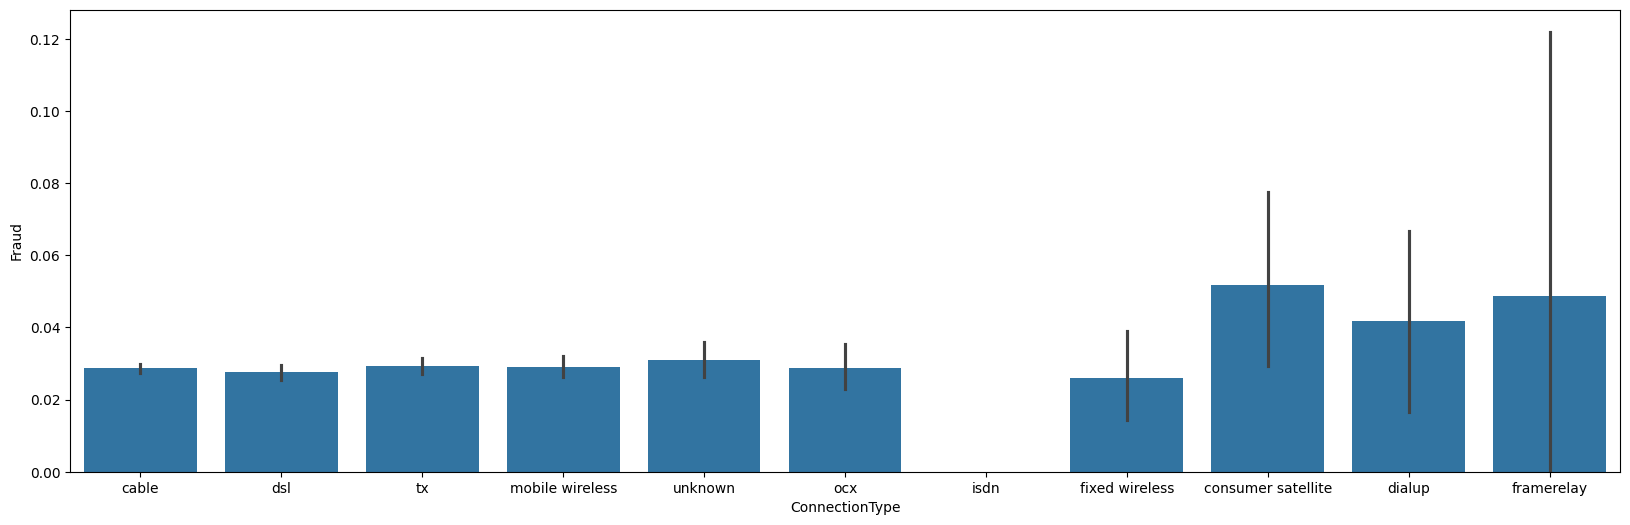

In [320]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize =(20,6))
sns.barplot(x = 'ConnectionType', y = 'Fraud', data=df)

In [321]:
df['ConnectionType'] = df['ConnectionType'].apply(lambda x: 'Not_Identify_Connection' if x in ['unknown'] else 'Identify_Connection')


# Observarion
* The types of connections such as cable, TX, DSL, mobile wireless, OCX, fixed wireless, and ISDN do not have any transaction fraud. However, consumer satellite, dial-up, and frame relay show a value above the cutoff of 0.5, indicating a possibility of fraud transactions occurring in these cases.

**ConnectionSpeed**

In [322]:
df['ConnectionSpeed'].unique()

array(['high', 'medium', 'low', 'unknown'], dtype=object)

In [323]:
df['ConnectionSpeed'].value_counts()

ConnectionSpeed
medium     87370
high       24601
low        14052
unknown     4709
Name: count, dtype: int64

<Axes: xlabel='ConnectionSpeed', ylabel='Fraud'>

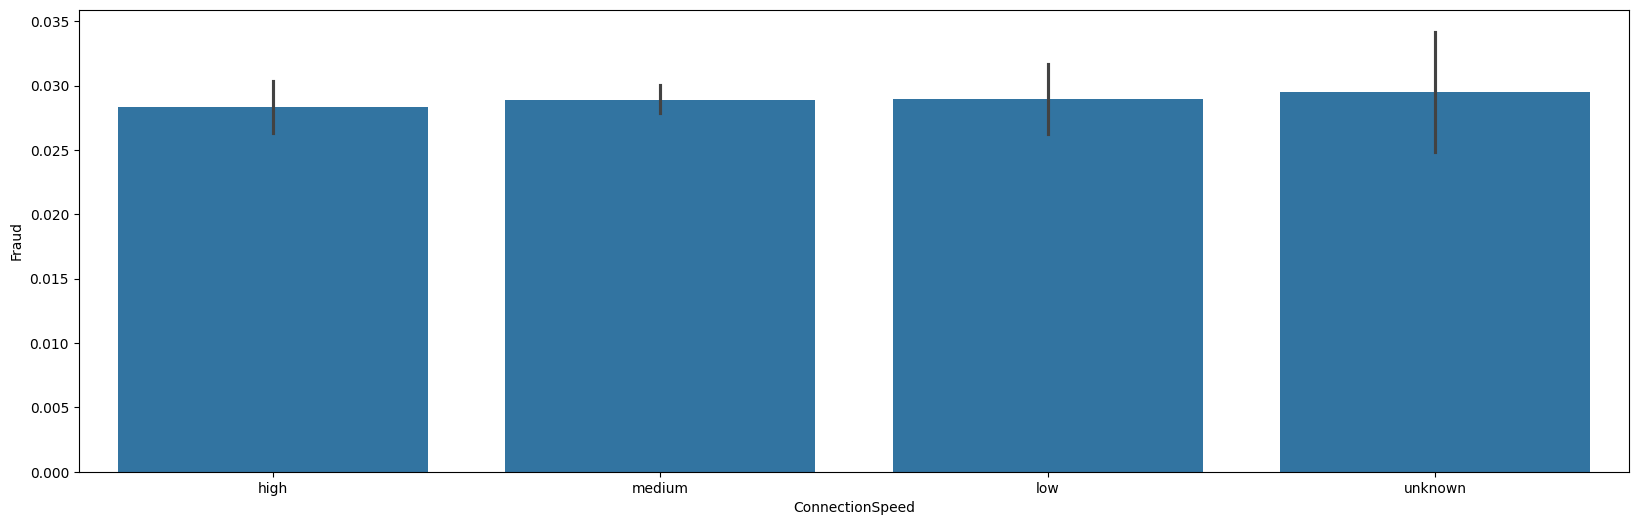

In [324]:

plt.figure(figsize =(20,6))
sns.barplot(x = 'ConnectionSpeed', y = 'Fraud', data=df)

In [325]:
df['ConnectionSpeed'] = df['ConnectionSpeed'].apply(lambda x: 'Not_Identify_Connectionspeed' if x in ['unknown'] else 'Identify_Connectionspeed')

# Observarion
* Since all connection speeds show fraudulent connections below the cutoff of 0.5, we consider that there are no problems with the connections during the transaction. .


**Channel**

In [326]:
df['channel'].unique()

array(['KOL', 'SOA', 'K45', 'WMS'], dtype=object)

In [327]:
df['channel'].value_counts()

channel
SOA    67780
KOL    38282
K45    24490
WMS      180
Name: count, dtype: int64

<Axes: xlabel='channel', ylabel='Fraud'>

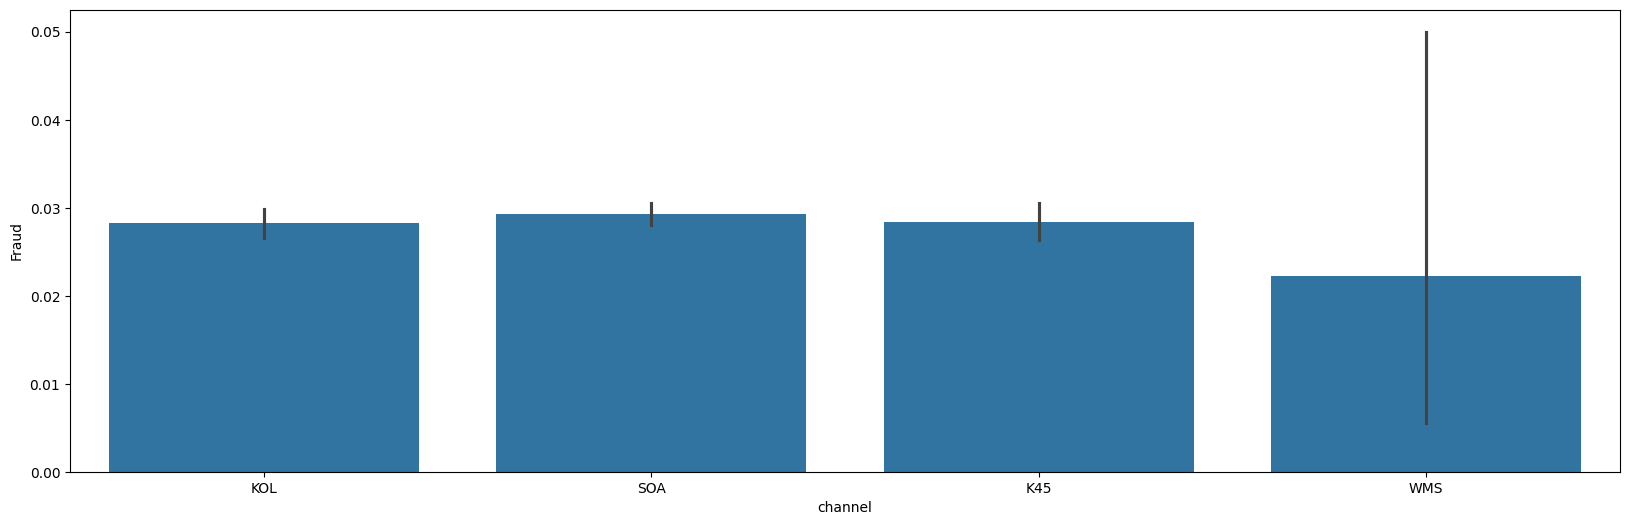

In [328]:
plt.figure(figsize =(20,6))
sns.barplot(x = 'channel', y = 'Fraud', data = df)

# Observation
* The channel of SOA, KOL, K45 are not occured fraud transaction.
* We show WMS channel data indicating a possibility of fraud transactions occurring in these cases.

**3. webSessOS**

In [329]:
df['webSessOS'].unique()

array(['Windows 7', 'Windows 10', 'Mac OS X', 'iOS', 'Windows Vista',
       'Android', 'Windows 8.1', 'Chrome OS', 'BlackBerry OS', 'Ubuntu',
       'Linux', 'Windows XP', 'Fedora', 'Windows 8', 'Windows Phone',
       'Windows RT 8.1', 'BREW', 'Windows RT', 'FreeBSD',
       'Windows NT 4.0'], dtype=object)

In [330]:
df['webSessOS'].value_counts()

webSessOS
Windows 10        33941
Windows 7         32948
Mac OS X          26976
iOS               16552
Android           11499
Windows 8.1        5210
Chrome OS           952
Windows Vista       682
Windows XP          521
Windows 8           482
Linux               394
Windows Phone       246
Ubuntu              168
Windows RT 8.1       78
BlackBerry OS        55
Fedora               12
Windows RT            8
Windows NT 4.0        4
FreeBSD               3
BREW                  1
Name: count, dtype: int64

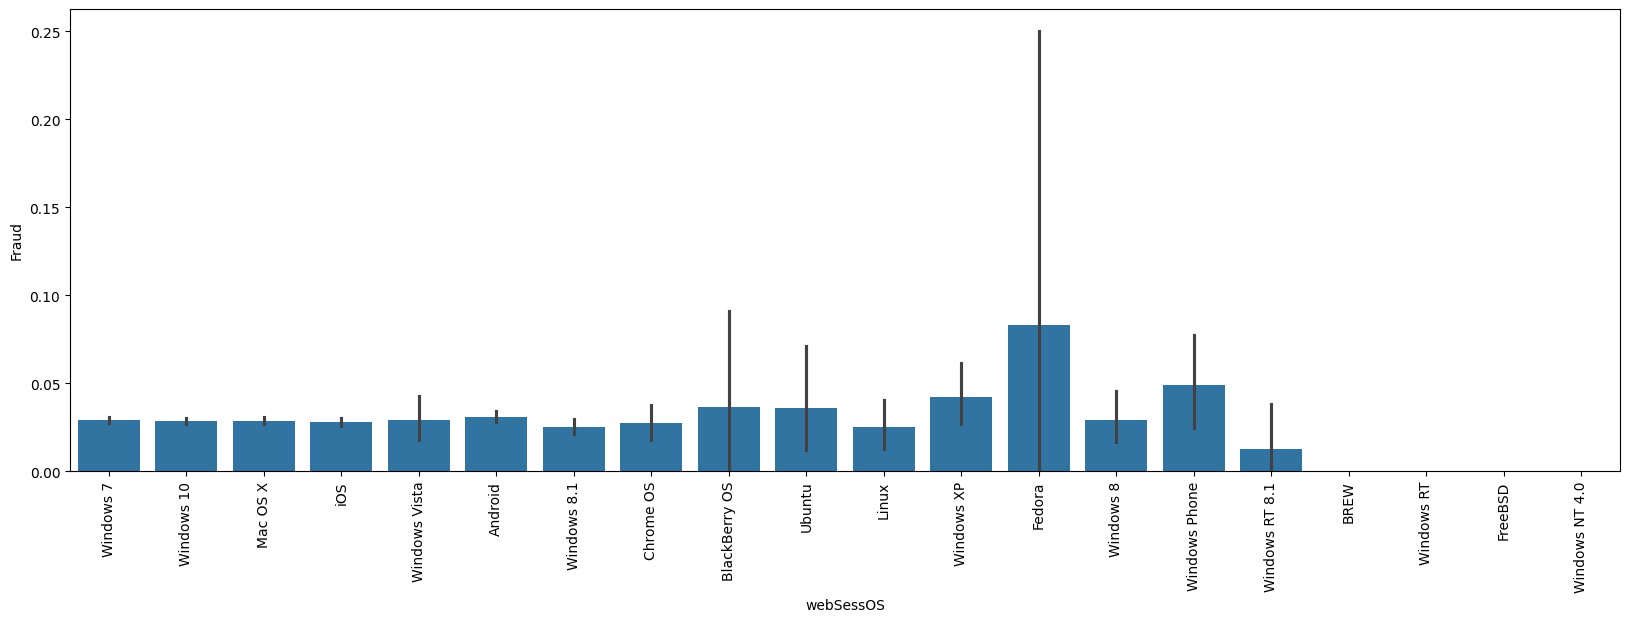

In [331]:
plt.figure(figsize =(20,6))
sns.barplot(x = 'webSessOS', y = 'Fraud', data = df)
plt.xticks(rotation = 90)
plt.show()

In [332]:
# Define the mapping for categories to numerical values
category_mapping = {
   'Windows 10': 'Windows',
   'Windows 7': 'Windows',
   'Windows 8.1': 'Windows',
   'Windows Vista': 'Windows',
   'Windows XP': 'Windows',
   'Windows 8': 'Windows',
   'Windows RT 8.1': 'Windows',
   'Windows RT': 'Windows',
   'Windows NT 4.0': 'Windows',
   'Mac OS X': 'Apple',
   'iOS': 'Apple',
   'Android': 'Mobile',
   'Windows Phone': 'Mobile',
   'BlackBerry OS': 'Mobile',
   'Ubuntu': 'Linux',
   'Fedora': 'Linux',
   'Linux': 'Linux',
   'FreeBSD': 'Linux',
   'Chrome OS': 'Others',
   'BREW': 'Others'
}

# Create a new column 'children_numeric' by mapping the values in 'children' column
df['webSessOS'] = df['webSessOS'].map(category_mapping)


# Observation
* We observed that all webSessOs do not indicate fraudulent transactions.









**4. webSessWebBrowser**

In [333]:
df['webSessWebBrowser'].unique()

array(['Edge', 'Mobile Safari', 'Chrome', 'Firefox', 'Safari', 'IE',
       'Chrome Mobile', 'IE Mobile', 'Amazon Silk', 'Chrome Mobile iOS',
       'Firefox Mobile', 'Vivaldi', 'Opera', 'BlackBerry WebKit',
       'Android', 'QQ Browser', 'Sogou Explorer', 'UC Browser',
       'Yandex Browser', 'Chromium', 'Opera Mini', 'Opera Mobile',
       'Puffin'], dtype=object)

In [334]:
df['webSessWebBrowser'].value_counts()

webSessWebBrowser
Chrome               60820
Mobile Safari        15938
IE                   13386
Safari               12367
Chrome Mobile        10854
Firefox              10303
Edge                  5503
Chrome Mobile iOS      555
Opera                  239
Android                222
Amazon Silk            183
IE Mobile              143
BlackBerry WebKit       64
Firefox Mobile          42
Sogou Explorer          31
Chromium                26
Vivaldi                 26
Yandex Browser          16
UC Browser               5
QQ Browser               4
Opera Mini               3
Opera Mobile             1
Puffin                   1
Name: count, dtype: int64

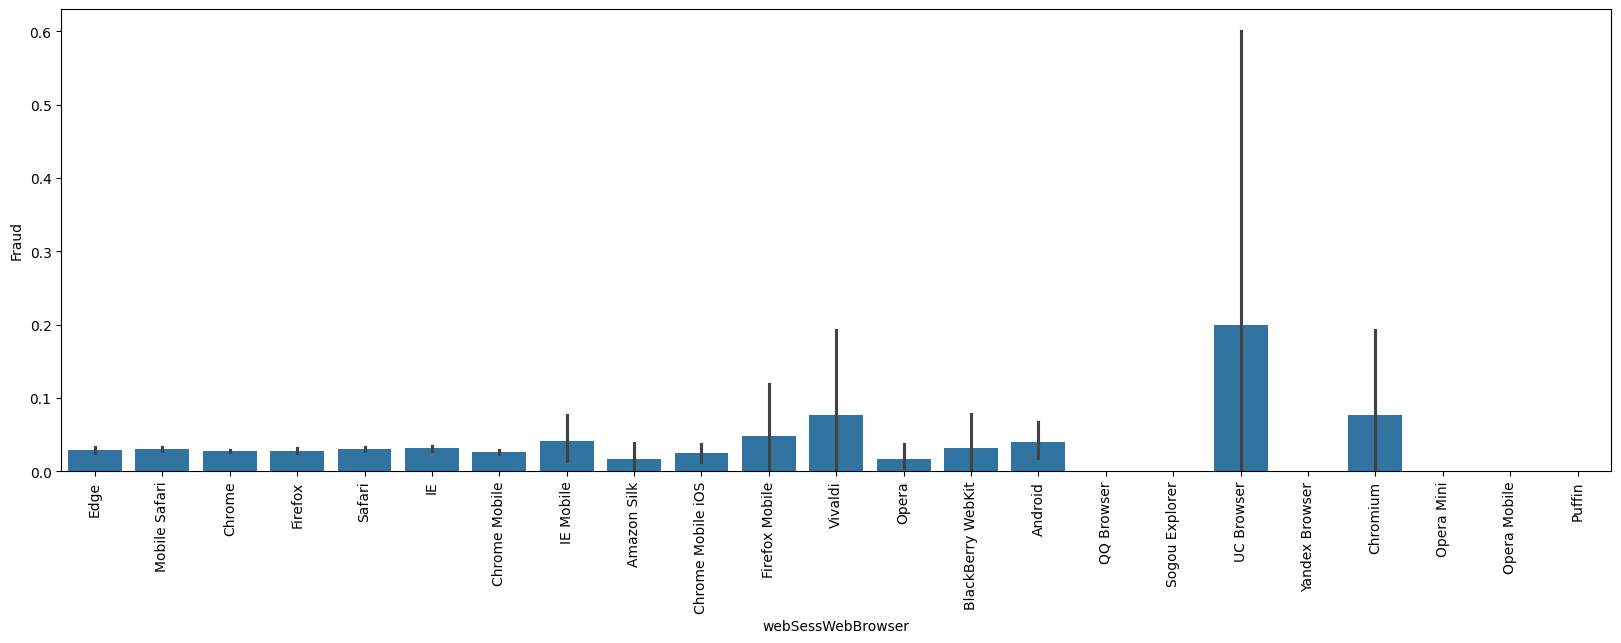

In [335]:
plt.figure(figsize =(20,6))
sns.barplot(x = 'webSessWebBrowser', y = 'Fraud', data = df)
plt.xticks(rotation = 90)
plt.show()

In [336]:
# Define the mapping for browsers to subcategories
browser_categories = {
    'Edge': 'Desktop',
    'Mobile Safari': 'Mobile',
    'Chrome': 'Desktop',
    'Firefox': 'Desktop',
    'Safari': 'Desktop',
    'IE': 'Desktop',
    'Chrome Mobile': 'Mobile',
    'IE Mobile': 'Mobile',
    'Amazon Silk': 'Mobile',
    'Chrome Mobile iOS': 'Mobile',
    'Firefox Mobile': 'Mobile',
    'Vivaldi': 'Desktop',
    'Opera': 'Desktop',
    'BlackBerry WebKit': 'Mobile',
    'Android': 'Mobile',
    'QQ Browser': 'Desktop',
    'Sogou Explorer': 'Desktop',
    'UC Browser': 'Desktop',
    'Yandex Browser': 'Desktop',
    'Chromium': 'Desktop',
    'Opera Mini': 'Mobile',
    'Opera Mobile': 'Mobile',
    'Puffin': 'Mobile'
}

# Create a new column 'browser_subcategory' by mapping the values in 'browser' column
df['webSessWebBrowser'] = df['webSessWebBrowser'].map(browser_categories)


# Observation
* The webSessWebBrowser indicated some fraudulent transactions because we observed that the US browser showed a value above the cutoff of 0.5. Therefore, we considered the possibility of fraud transactions. However, the without UC browser below the cutoff of 0.5, so we concluded that fraud transactions were not occurring in its case.

**5. TransactionDateTime**


In [337]:
subcategoriescount = df['TransactionDateTime'].unique()
print(subcategoriescount)

['27/05/2013 10:56:53:000' '31/05/2013 14:04:35:000'
 '01/06/2013 21:07:58:000' ... '26/05/2013 10:02:15:000'
 '26/05/2013 06:42:50:000' '25/05/2013 20:30:56:000']


In [338]:
subcategoriescount = df['TransactionDateTime'].value_counts()
print(subcategoriescount)

TransactionDateTime
30/05/2013 13:40:59:000    9
22/05/2013 19:03:11:000    9
31/05/2013 12:21:33:000    9
27/05/2013 16:52:21:000    9
31/05/2013 16:07:22:000    8
                          ..
01/06/2013 12:21:10:000    1
24/05/2013 13:30:30:000    1
31/05/2013 07:14:20:000    1
31/05/2013 16:53:22:000    1
25/05/2013 20:30:56:000    1
Name: count, Length: 79761, dtype: int64


In [339]:
df1 = pd.DataFrame(df['TransactionDateTime'])

# Convert timestamp column to datetime type
df['TransactionDateTime'] = pd.to_datetime(df['TransactionDateTime'], format='%d/%m/%Y %H:%M:%S:%f')

# Extract year, month, day, hour, minute, second, and millisecond into separate columns
df['TransactionDateTime_year'] = df['TransactionDateTime'].dt.year.astype(int)
df['TransactionDateTime_month'] = df['TransactionDateTime'].dt.month.astype(int)
df['TransactionDateTime_day'] = df['TransactionDateTime'].dt.day.astype(int)
df['TransactionDateTime_hour'] = df['TransactionDateTime'].dt.hour.astype(int)
df['TransactionDateTime_minute'] = df['TransactionDateTime'].dt.minute.astype(int)
df['TransactionDateTime_second'] = df['TransactionDateTime'].dt.second.astype(int)
df['millisecond'] = df['TransactionDateTime'].dt.microsecond // 1000  # Convert microseconds to milliseconds and convert to int


df.drop(['TransactionDateTime_second'],axis =1,inplace =True)
df.drop(['millisecond'],axis =1,inplace =True)
df.drop(['TransactionDateTime'],axis =1,inplace =True)
# Print the resulting DataFrame
print(df)


                   ConnectionRegion  V1CF  V2CF  V3CF  V4CF   V5CF  AreaCode  \
1             northeast@new york@us    99    94    61   602  16980     512.0   
3         south central@arkansas@us    99    23    50     0  35620     202.0   
4        mid atlantic@new jersey@us    99    74    80   602  19100     313.0   
5       southeast@north carolina@us    99    88    80   504  16980     619.0   
6           great lakes@illinois@us    99    23    75   618  11460     713.0   
...                             ...   ...   ...   ...   ...    ...       ...   
138747      southwest@california@us    86    85    80   602      0     630.0   
138748         southeast@georgia@us    99    97    90   527  41860     630.0   
138749          great lakes@ohio@us    99    88    90   618  12420     212.0   
138750      great lakes@illinois@us    99    23    23   819  16980     704.0   
138751         southeast@georgia@us    99    63    50   501  19100     305.0   

                     ConnectionOrg     

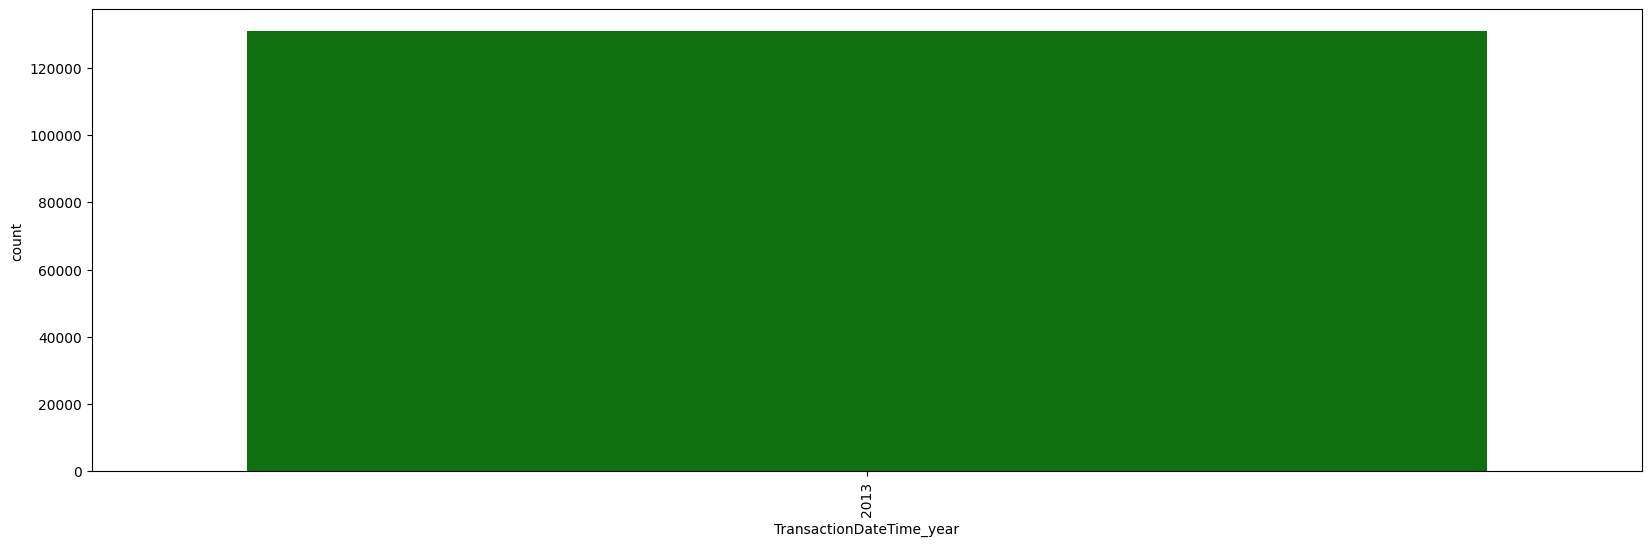

In [340]:
plt.figure(figsize= (20,6))
sns.countplot(x='TransactionDateTime_year', data=df,color = 'g')
plt.xticks( rotation = 90)
plt.show()

# Observation
* All transaction done in 2013 of TransactionDateTime

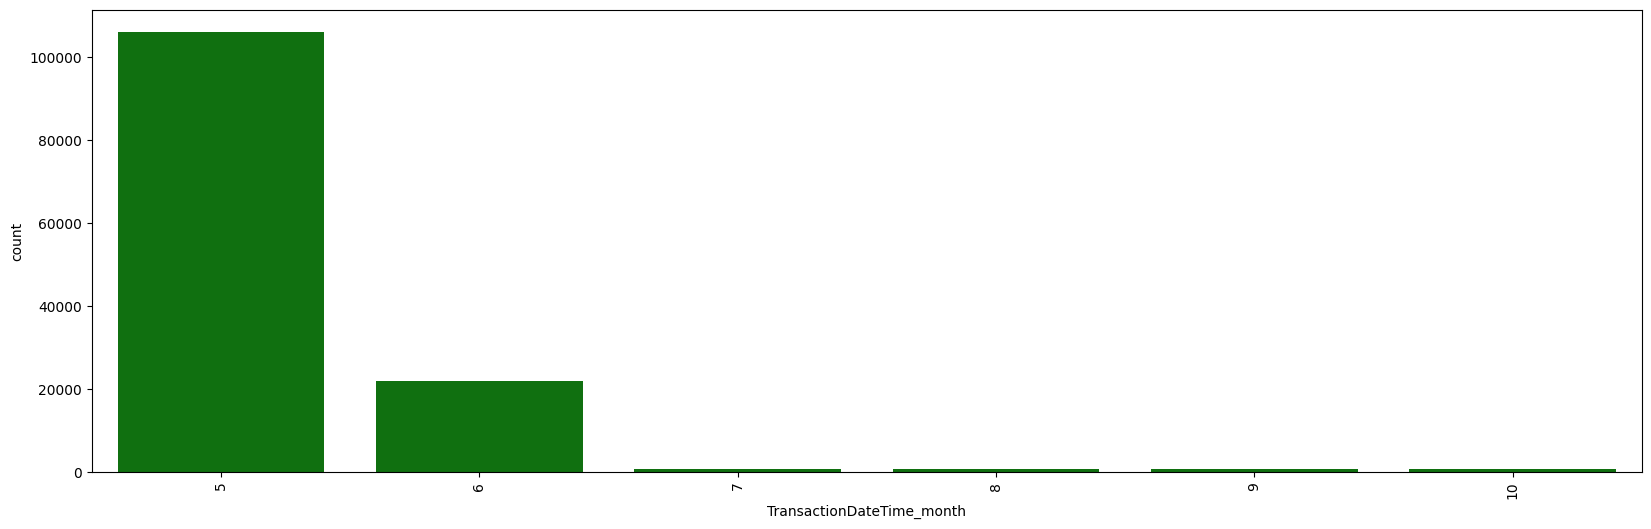

In [341]:
plt.figure(figsize= (20,6))
sns.countplot(x='TransactionDateTime_month', data=df,color = 'g')
plt.xticks( rotation = 90)
plt.show()

In [342]:
df['TransactionDateTime_month'] = df['TransactionDateTime_month'].apply(lambda x: 'first_six_month' if x in[1,2,3,4,5,6] else 'last_six_month')
df['TransactionDateTime_month'] = df['TransactionDateTime_month'].astype('object')

# Observation
* A transaction done a month of may to october.
* and most transaction done in may.

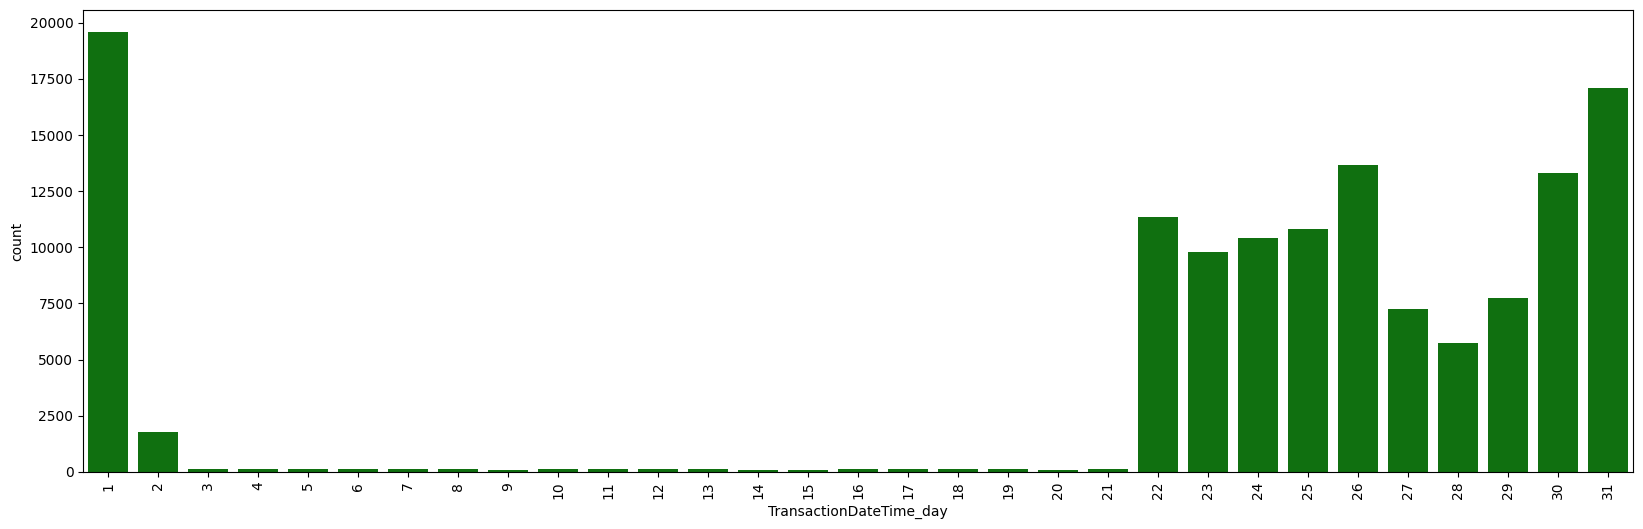

In [343]:
plt.figure(figsize= (20,6))
sns.countplot(x='TransactionDateTime_day', data=df, color = 'g')
plt.xticks( rotation = 90)
plt.show()

In [344]:
df['TransactionDateTime_day'] = df['TransactionDateTime_day'].apply(lambda x: 'first_fifteen_days' if x in[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15] else 'last_fifteen_days')
df['TransactionDateTime_day'] = df['TransactionDateTime_day'].astype('object')

# Observation
* A most time transaction done in day of 1, 22, 23, 24, 25 to 31.

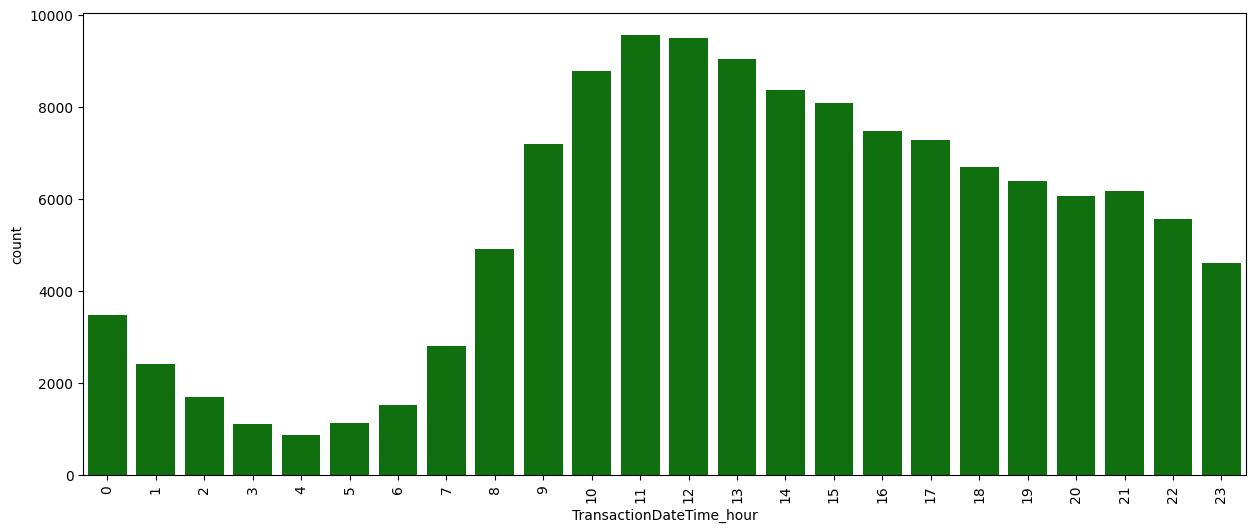

In [345]:
plt.figure(figsize= (15,6))
sns.countplot(x='TransactionDateTime_hour', data=df, color ='g')
plt.xticks( rotation = 90)
plt.show()

In [346]:
df['TransactionDateTime_hour'] = df['TransactionDateTime_hour'].apply(lambda x: 'first_twelve_hour' if x in[0,1,2,3,4,5,6,7,8,9,10,11] else 'last_twelve_hour')
df['TransactionDateTime_hour'] = df['TransactionDateTime_hour'].astype('object')


# Observation
* People usually choose between 10 am and 9 pm to make the transaction.

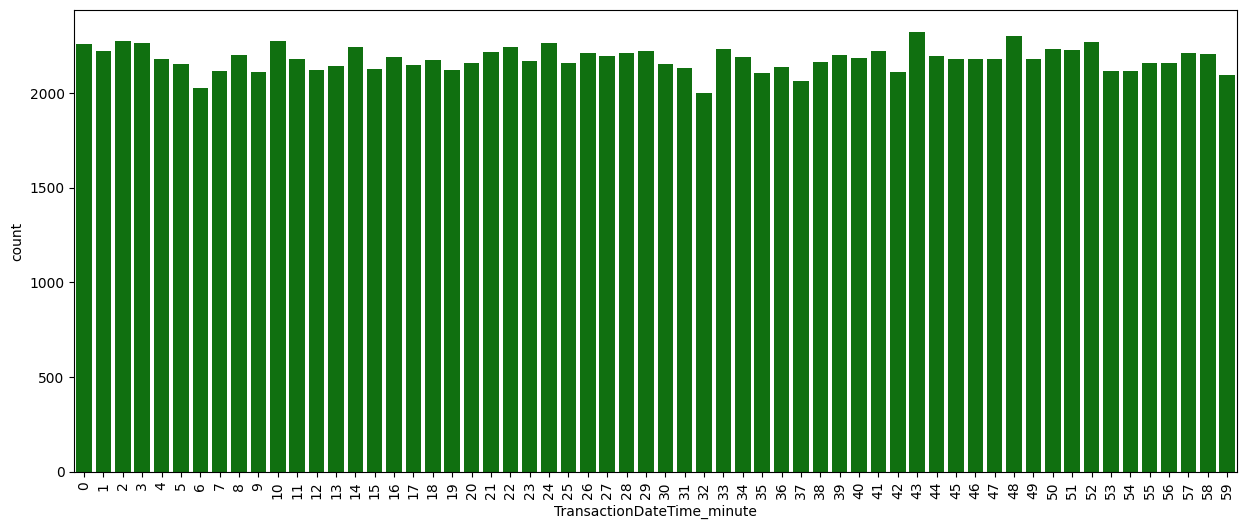

In [347]:
plt.figure(figsize= (15,6))
sns.countplot(x='TransactionDateTime_minute', data=df, color ='g')
plt.xticks( rotation = 90)
plt.show()

In [348]:
df['TransactionDateTime_minute'] = df['TransactionDateTime_minute'].apply(lambda x: 'first_thirty_minute' if x in[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29] else 'last_thirty_minute')
df['TransactionDateTime_minute'] = df['TransactionDateTime_minute'].astype('object')


# Observation
* Average minute

**AddressUpdatedate column**

In [349]:
subcategoriescount = df['AddressUpdateDate'].unique()
print(subcategoriescount)

['24/08/2010 13:23:30:000' '07/06/2009 14:49:06:000'
 '09/05/2012 13:52:37:000' ... '06/02/2013 17:16:01:000'
 '12/04/2013 11:33:19:000' '23/02/2013 00:41:44:000']


In [350]:
subcategoriescount = df[ 'AddressUpdateDate'].value_counts()
print(subcategoriescount)

AddressUpdateDate
20/01/2004 03:26:16:000    9257
31/10/2000 11:59:59:000     188
05/09/2002 05:34:40:000      98
18/08/2002 01:39:07:000      30
04/01/2013 17:48:51:000      26
                           ... 
30/09/2009 13:31:27:000       1
30/08/2012 22:18:22:000       1
22/08/2008 01:02:53:000       1
19/05/2013 15:28:27:000       1
23/02/2013 00:41:44:000       1
Name: count, Length: 64827, dtype: int64


In [351]:
df2 = pd.DataFrame(df['AddressUpdateDate'])

# Convert AddressUpdateDate column to datetime type
df['AddressUpdateDate'] = pd.to_datetime(df['AddressUpdateDate'], format='%d/%m/%Y %H:%M:%S:%f')

# Extract year, month, day, hour, minute, second, and millisecond into separate columns
df['AddressUpdateDate_year'] = df['AddressUpdateDate'].dt.year.astype(int)
df['AddressUpdateDate_month'] = df['AddressUpdateDate'].dt.month.astype(int)
df['AddressUpdateDate_day'] = df['AddressUpdateDate'].dt.day.astype(int)
df['AddressUpdateDate_hour'] = df['AddressUpdateDate'].dt.hour.astype(int)
df['AddressUpdateDate_minute'] = df['AddressUpdateDate'].dt.minute.astype(int)
df['seconds'] = df['AddressUpdateDate'].dt.second.astype(int)
df['milliseconds'] = df['AddressUpdateDate'].dt.microsecond // 1000  # Convert microseconds to milliseconds and convert to int


df.drop(['seconds'],axis =1,inplace =True)
df.drop(['milliseconds'],axis =1,inplace =True)
df.drop(['AddressUpdateDate'],axis =1,inplace =True)
# Print the resulting DataFrame
print(df)

                   ConnectionRegion  V1CF  V2CF  V3CF  V4CF   V5CF  AreaCode  \
1             northeast@new york@us    99    94    61   602  16980     512.0   
3         south central@arkansas@us    99    23    50     0  35620     202.0   
4        mid atlantic@new jersey@us    99    74    80   602  19100     313.0   
5       southeast@north carolina@us    99    88    80   504  16980     619.0   
6           great lakes@illinois@us    99    23    75   618  11460     713.0   
...                             ...   ...   ...   ...   ...    ...       ...   
138747      southwest@california@us    86    85    80   602      0     630.0   
138748         southeast@georgia@us    99    97    90   527  41860     630.0   
138749          great lakes@ohio@us    99    88    90   618  12420     212.0   
138750      great lakes@illinois@us    99    23    23   819  16980     704.0   
138751         southeast@georgia@us    99    63    50   501  19100     305.0   

                     ConnectionOrg     

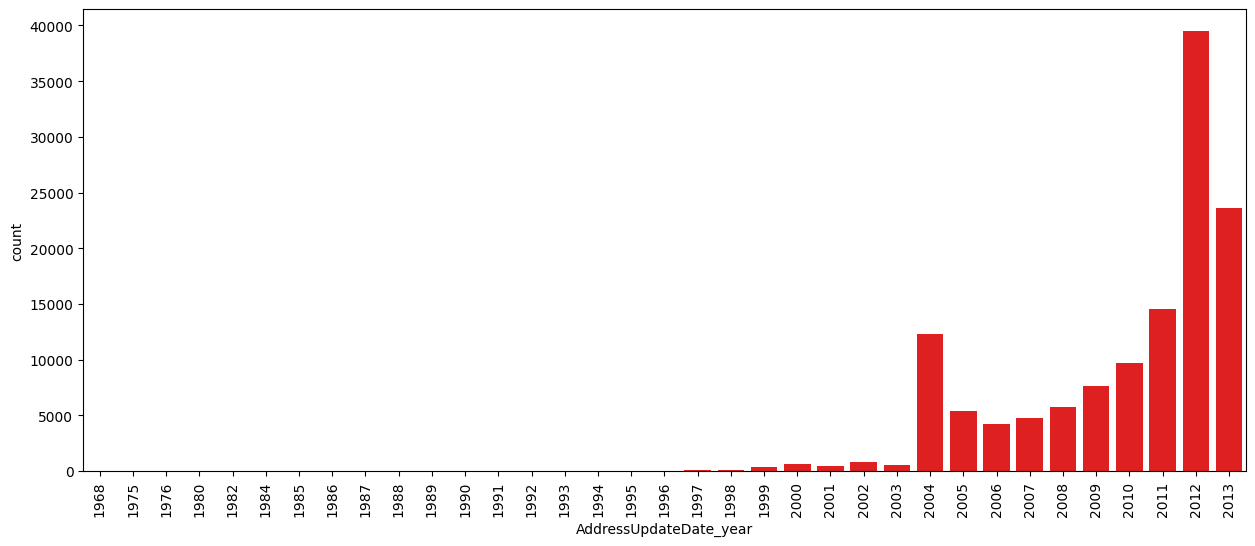

In [352]:
plt.figure(figsize= (15,6))
sns.countplot(x='AddressUpdateDate_year', data=df, color ='r')
plt.xticks( rotation = 90)
plt.show()

In [353]:
df['AddressUpdateDate_year'] = df['AddressUpdateDate_year'].apply(lambda x: 'after_2010' if x in[2011,2012,2013] else 'before_2010')
df['AddressUpdateDate_year'] = df['AddressUpdateDate_year'].astype('object')


# Observation
* People started updating addresses in 1968 and ended in 2013, but most of them updated their addresses in 2012 and 2013.

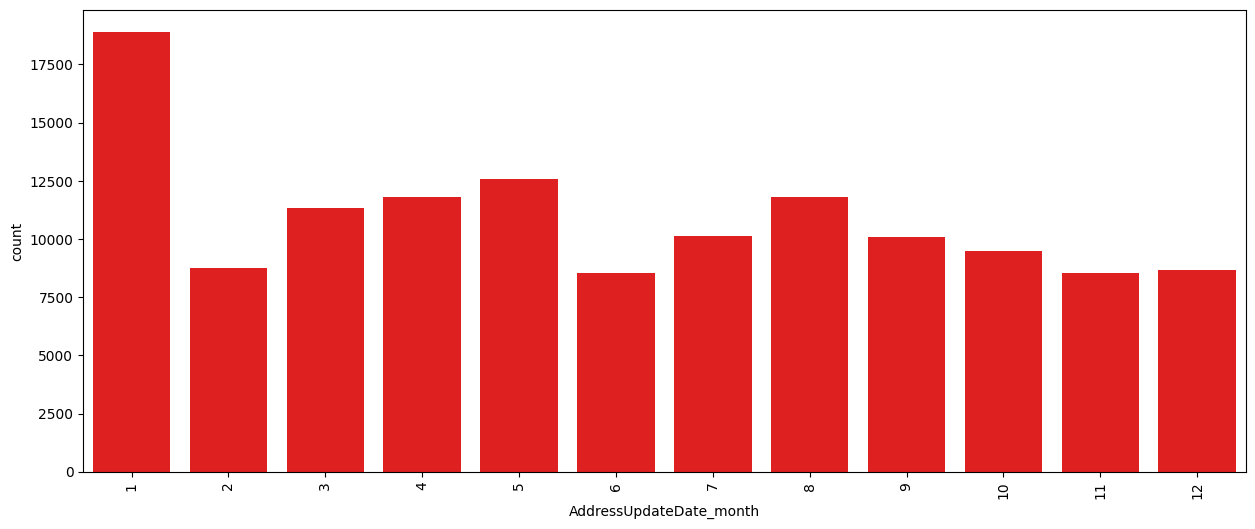

In [354]:
plt.figure(figsize= (15,6))
sns.countplot(x='AddressUpdateDate_month', data=df, color ='r')
plt.xticks( rotation = 90)
plt.show()

In [355]:
df['AddressUpdateDate_month'] = df['AddressUpdateDate_month'].apply(lambda x: 'first_six_month' if x in[1,2,3,4,5,6] else 'last_six_month')
df['AddressUpdateDate_month'] = df['AddressUpdateDate_month'].astype('object')

# Observation
* Most addresses updated in January, while the average updated in another month.


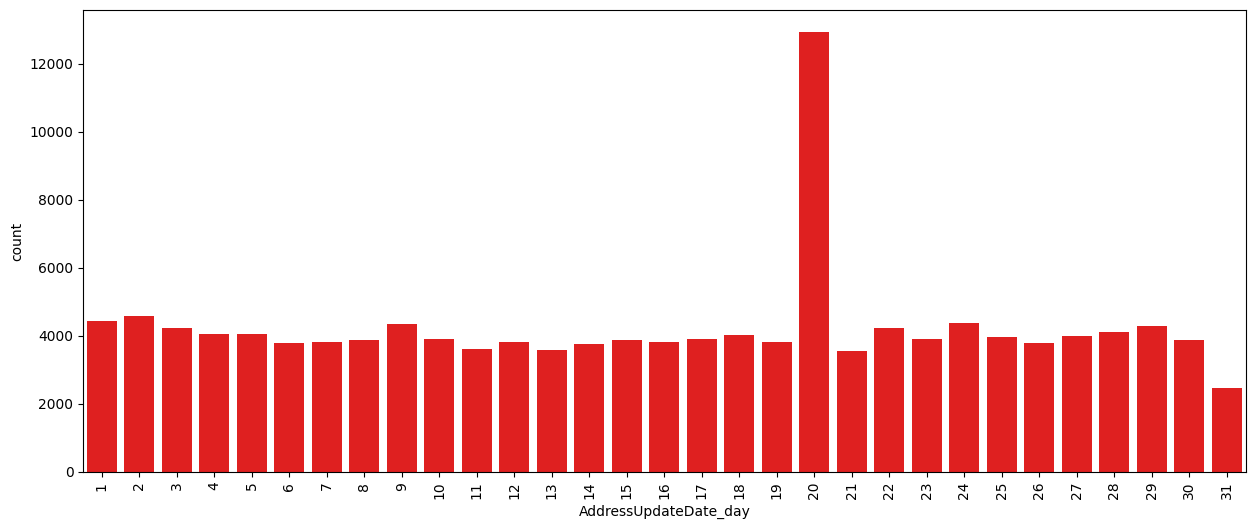

In [356]:
plt.figure(figsize= (15,6))
sns.countplot(x='AddressUpdateDate_day', data=df, color ='r')
plt.xticks( rotation = 90)
plt.show()

In [357]:
df['AddressUpdateDate_day'] = df['AddressUpdateDate_day'].apply(lambda x: 'first_fifteen_days' if x in[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15] else 'last_fifteen_days')
df['AddressUpdateDate_day'] = df['AddressUpdateDate_day'].astype('object')

# Observation
* The most addresses were updated on day 20 and the average was updated on the other day.

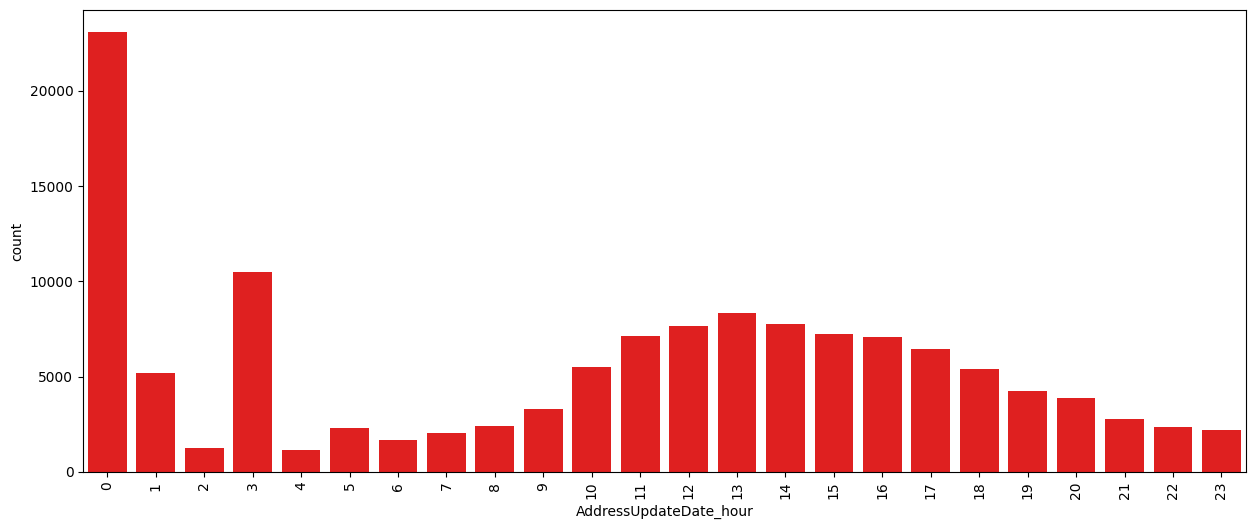

In [358]:
plt.figure(figsize= (15,6))
sns.countplot(x='AddressUpdateDate_hour', data=df, color ='r')
plt.xticks( rotation = 90)
plt.show()

In [359]:
df['AddressUpdateDate_hour'] = df['AddressUpdateDate_hour'].apply(lambda x: 'first_twelve_hour' if x in[0,1,2,3,4,5,6,7,8,9,10,11] else 'last_twelve_hour')
df['AddressUpdateDate_hour'] = df['AddressUpdateDate_hour'].astype('object')


# Observation
Most addresses were update at 12 am.

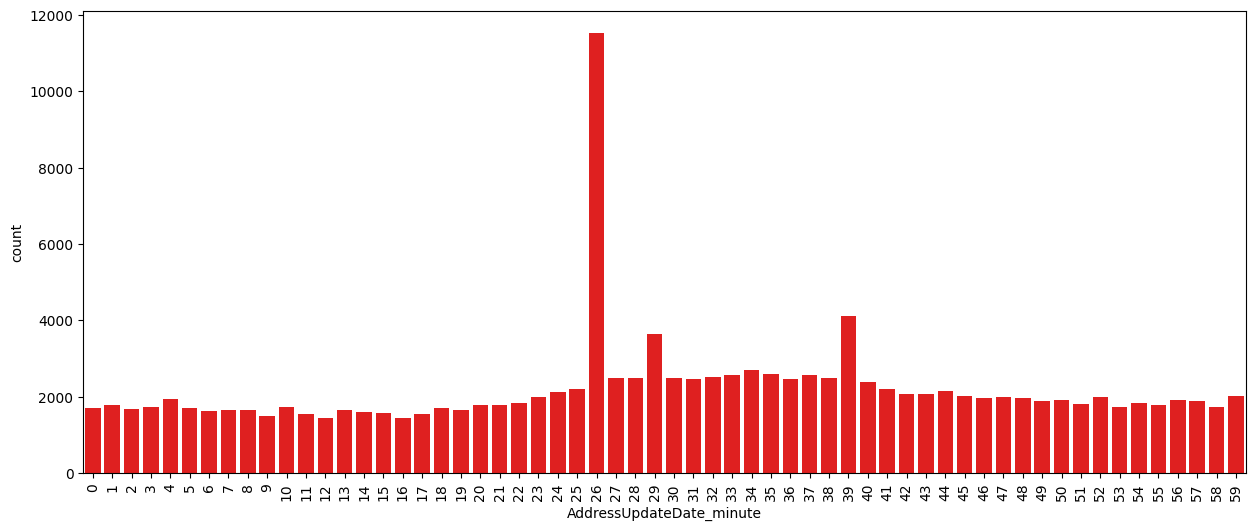

In [360]:
plt.figure(figsize= (15,6))
sns.countplot(x='AddressUpdateDate_minute', data=df, color ='r')
plt.xticks( rotation = 90)
plt.show()

In [361]:

df['AddressUpdateDate_minute'] = df['AddressUpdateDate_minute'].apply(lambda x: 'first_thirty_minute' if x in[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29] else 'last_thirty_minute')
df['AddressUpdateDate_minute'] = df['AddressUpdateDate_minute'].astype('object')

# Observation
* Most Addresses updated at time of 26 minute.

**EmailUpdateDate Column**

In [362]:
subcategoriescount = df['EmailUpdateDate'].unique()
print(subcategoriescount)

['06/09/2007 19:24:07:000' '13/12/2010 14:08:42:000'
 '20/04/2009 14:22:57:000' ... '05/11/2010 09:10:01:000'
 '28/02/2003 23:26:16:000' '05/11/2012 13:43:10:000']


In [363]:
subcategoriescount = df['EmailUpdateDate'].value_counts()
print(subcategoriescount)

EmailUpdateDate
20/01/2004 02:45:44:000    5925
04/01/2004 02:45:44:000    3394
07/10/2005 09:21:06:000     146
08/07/2005 09:52:23:000     120
16/05/2011 03:49:35:000     111
                           ... 
26/02/2012 18:05:52:000       1
09/03/2010 13:35:30:000       1
29/07/2011 17:33:49:000       1
09/01/2013 10:25:58:000       1
05/11/2012 13:43:10:000       1
Name: count, Length: 64993, dtype: int64


In [364]:
mode_value = df['EmailUpdateDate'].mode()[0]  # Extract the first value from the mode Series

# Replace '0' with the mode value
df['EmailUpdateDate'].replace('0', mode_value, inplace=True)


In [365]:
df3 = pd.DataFrame(df['EmailUpdateDate'])

# Convert EmailUpdateDate column to datetime type
df['EmailUpdateDate'] = pd.to_datetime(df['EmailUpdateDate'], format='%d/%m/%Y %H:%M:%S:%f')
# Extract year, month, day, hour, minute, second, and millisecond into separate columns
df['EmailUpdateDate_year'] = df['EmailUpdateDate'].dt.year.astype(int)
df['EmailUpdateDate_month'] = df['EmailUpdateDate'].dt.month.astype(int)
df['EmailUpdateDate_day'] = df['EmailUpdateDate'].dt.day.astype(int)
df['EmailUpdateDate_hour'] = df['EmailUpdateDate'].dt.hour.astype(int)
df['EmailUpdateDate_minute'] = df['EmailUpdateDate'].dt.minute.astype(int)
df['secondss'] = df['EmailUpdateDate'].dt.second.astype(int)
df['millisecondss'] = df['EmailUpdateDate'].dt.microsecond // 1000  # Convert microseconds to milliseconds and convert to int


df.drop(['secondss'],axis =1,inplace =True)
df.drop(['millisecondss'],axis =1,inplace =True)
df.drop(['EmailUpdateDate'],axis =1,inplace =True)
# Print the resulting DataFrame
print(df)

                   ConnectionRegion  V1CF  V2CF  V3CF  V4CF   V5CF  AreaCode  \
1             northeast@new york@us    99    94    61   602  16980     512.0   
3         south central@arkansas@us    99    23    50     0  35620     202.0   
4        mid atlantic@new jersey@us    99    74    80   602  19100     313.0   
5       southeast@north carolina@us    99    88    80   504  16980     619.0   
6           great lakes@illinois@us    99    23    75   618  11460     713.0   
...                             ...   ...   ...   ...   ...    ...       ...   
138747      southwest@california@us    86    85    80   602      0     630.0   
138748         southeast@georgia@us    99    97    90   527  41860     630.0   
138749          great lakes@ohio@us    99    88    90   618  12420     212.0   
138750      great lakes@illinois@us    99    23    23   819  16980     704.0   
138751         southeast@georgia@us    99    63    50   501  19100     305.0   

                     ConnectionOrg     

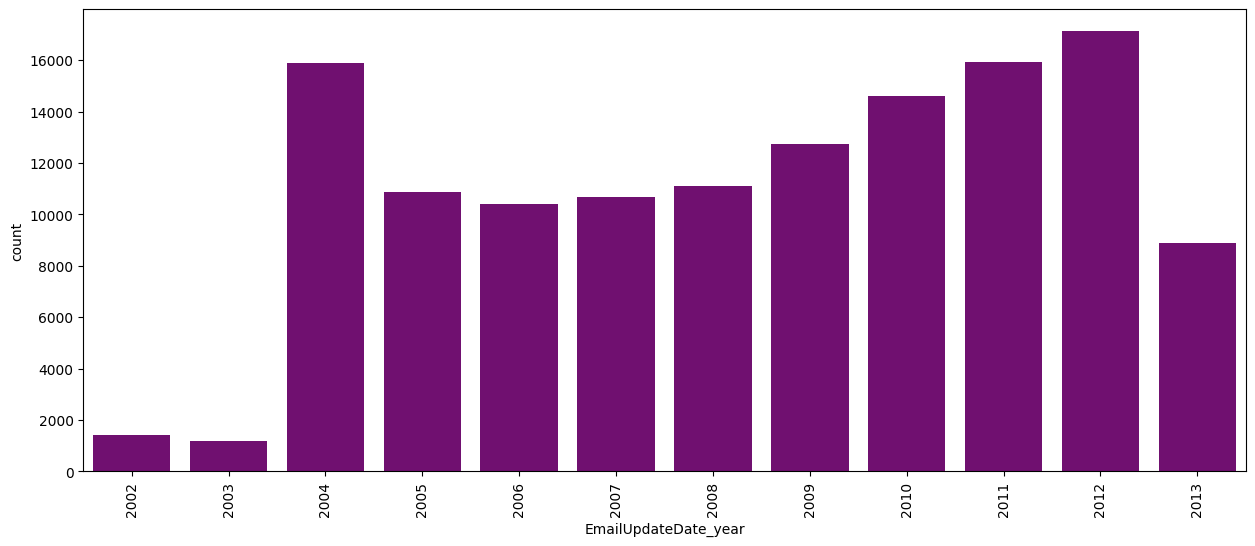

In [366]:
plt.figure(figsize= (15,6))
sns.countplot(x='EmailUpdateDate_year', data=df, color ='purple')
plt.xticks( rotation = 90)
plt.show()

In [367]:
df['EmailUpdateDate_year'] = df['EmailUpdateDate_year'].apply(lambda x: 'after_2010' if x in[2011,2012,2013] else 'before_2010')
df['EmailUpdateDate_year'] = df['EmailUpdateDate_year'].astype('object')

# Observation
* Most emails updated between 2004 and 2013.

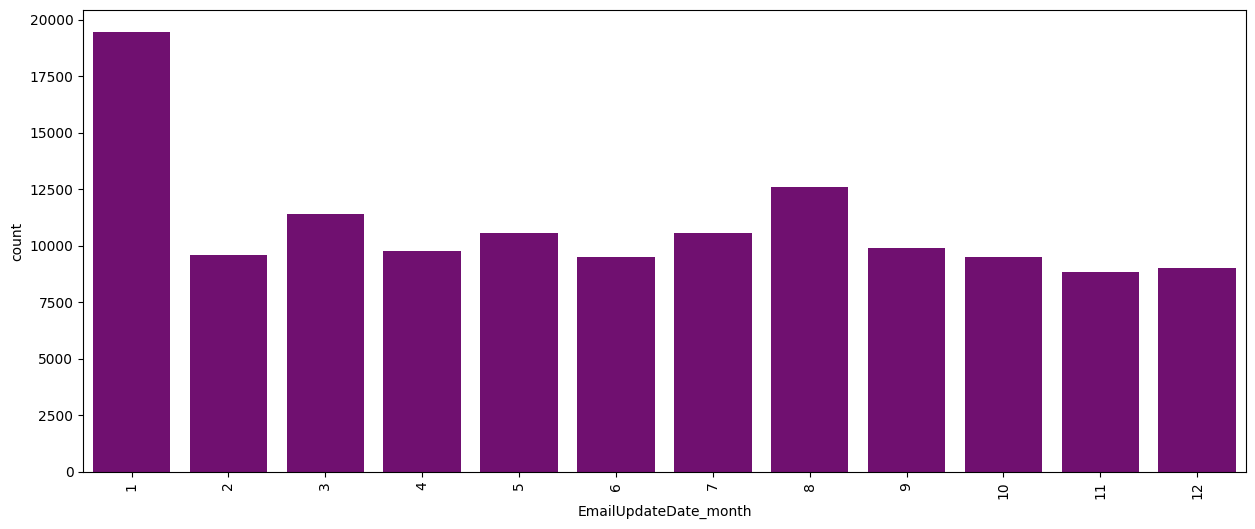

In [368]:
plt.figure(figsize= (15,6))
sns.countplot(x='EmailUpdateDate_month', data=df, color ='purple')
plt.xticks( rotation = 90)
plt.show()

In [369]:
df['EmailUpdateDate_month'] = df['EmailUpdateDate_month'].apply(lambda x: 'first_six_month' if x in[1,2,3,4,5,6] else 'last_six_month')
df['EmailUpdateDate_month'] = df['EmailUpdateDate_month'].astype('object')

# Observation
* Most emails updated in january and Average updated in another month.

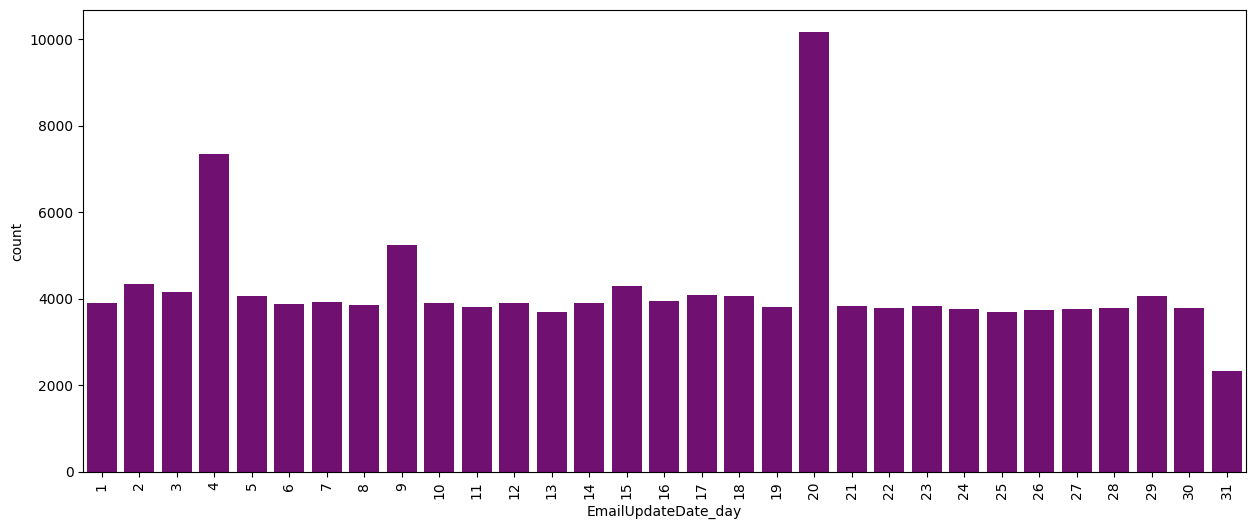

In [370]:
plt.figure(figsize= (15,6))
sns.countplot(x='EmailUpdateDate_day', data=df, color ='purple')
plt.xticks( rotation = 90)
plt.show()

In [371]:
df['EmailUpdateDate_day'] = df['EmailUpdateDate_day'].apply(lambda x: 'first_fifteen_days' if x in[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15] else 'last_fifteen_days')
df['EmailUpdateDate_day'] = df['EmailUpdateDate_day'].astype('object')

# Observation
* Most emails updated in day of 20th and average updated in another day

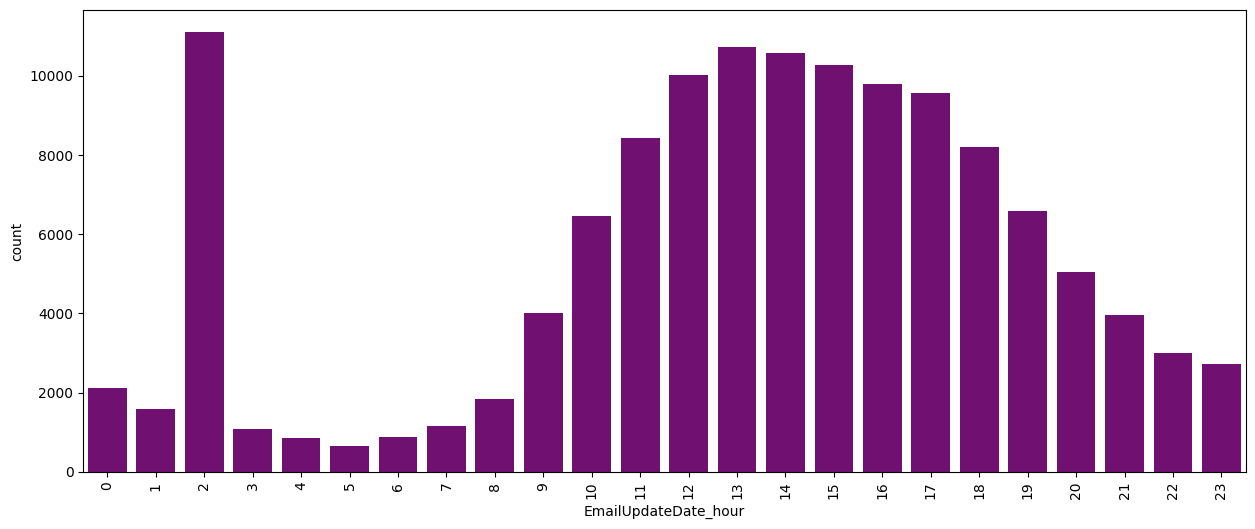

In [372]:
plt.figure(figsize= (15,6))
sns.countplot(x='EmailUpdateDate_hour', data=df, color ='purple')
plt.xticks( rotation = 90)
plt.show()

In [373]:

df['EmailUpdateDate_hour'] = df['EmailUpdateDate_hour'].apply(lambda x: 'first_twelve_hour' if x in[0,1,2,3,4,5,6,7,8,9,10,11] else 'last_twelve_hour')
df['EmailUpdateDate_hour'] = df['EmailUpdateDate_hour'].astype('object')


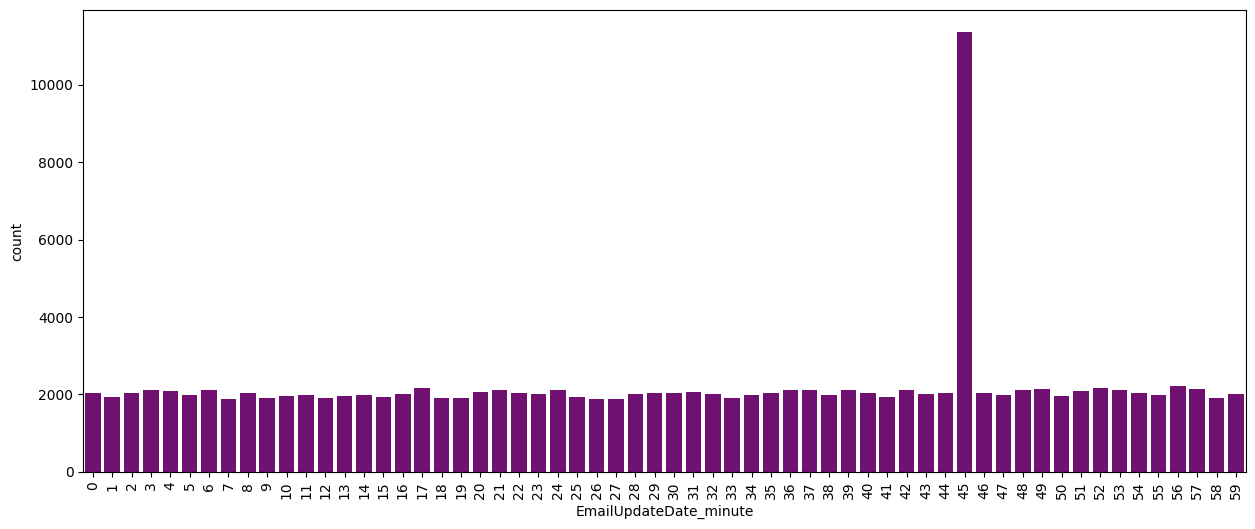

In [374]:
plt.figure(figsize= (15,6))
sns.countplot(x='EmailUpdateDate_minute', data=df, color ='purple')
plt.xticks( rotation = 90)
plt.show()

In [375]:
df['EmailUpdateDate_minute'] = df['EmailUpdateDate_minute'].apply(lambda x: 'first_thirty_minute' if x in[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29] else 'last_thirty_minute')
df['EmailUpdateDate_minute'] = df['EmailUpdateDate_minute'].astype('object')


**ConnectionRegion column**

In [376]:
subcategoriescount1 = df['ConnectionRegion'].unique()
subcategoriescount1

array(['northeast@new york@us', 'south central@arkansas@us',
       'mid atlantic@new jersey@us', 'southeast@north carolina@us',
       'great lakes@illinois@us', 'southwest@california@us',
       'south central@louisiana@us', 'southeast@florida@us',
       'great lakes@ohio@us', 'south central@texas@us',
       'northeast@massachusetts@us', 'mountain@new mexico@us',
       'southeast@georgia@us', 'unknown@distrito capital@ve',
       'london@greater london@gb', 'southwest@arizona@us',
       'mid atlantic@virginia@us', 'unknown@michoacan de ocampo@mx',
       'great lakes@michigan@us', 'mid atlantic@district of columbia@us',
       'unknown@guatemala@gt', 'cagayan valley@isabela@ph',
       'southeast@mississippi@us', 'mountain@utah@us',
       'south central@missouri@us', 'unknown@distrito nacional@do',
       'mountain@colorado@us', 'great lakes@wisconsin@us',
       'unknown@baden-wuerttemberg@de', 'pacific northwest@washington@us',
       'mid atlantic@pennsylvania@us', 'midwest@k

In [377]:
pd.set_option('display.max_rows', 10000)  # Set to None to display all rows
V5CF = df['ConnectionRegion'].value_counts()
print(V5CF)

ConnectionRegion
southwest@california@us                               24594
northeast@new york@us                                 20179
great lakes@illinois@us                               19873
south central@texas@us                                12566
southeast@florida@us                                   7724
mid atlantic@new jersey@us                             4389
southeast@georgia@us                                   4388
southwest@arizona@us                                   3908
great lakes@ohio@us                                    3797
great lakes@michigan@us                                3329
pacific northwest@washington@us                        2736
midwest@indiana@us                                     2507
mountain@colorado@us                                   2058
south central@louisiana@us                             1429
pacific northwest@oregon@us                            1115
mid atlantic@virginia@us                                880
southwest@nevada@us    

In [378]:


# Apply the conversion based on your conditions
df['ConnectionRegion'] = df['ConnectionRegion'].apply(lambda x: 'Unknown_ConnectionRegion' if x in["unknown@distrito capital@ve","unknown@michoacan de ocampo@mx","unknown@guatemala@gt","unknown@distrito nacional@do","unknown@region metropolitana@cl",
    "unknown@jilin@cn","unknown@guangdong@cn","unknown@distrito federal@mx","unknown@quebec@ca","unknown@none@hk","unknown@baja california@mx","unknown@zuerich@ch",
    "unknown@dolnoslaskie@pl","unknown@hamerkaz@il","unknown@none@sg","unknown@uusimaa@fi","unknown@unknown@ng","unknown@none@pr","unknown@masqat@om","unknown@ouest@ht",
    "unknown@al kuwayt@kw", "unknown@port-of-spain@tt", "unknown@tirane@al","unknown@gujarat@in","unknown@uttar pradesh@in","unknown@saitama@jp","unknown@sakarya@tr",
    "unknown@jiangxi@cn","unknown@hadarom@il","unknown@sumadijski@rs","unknown@unknown@sn","unknown@brasov@ro","unknown@new taipei@tw","unknown@south eastern@mt",
    "unknown@western cape@za","unknown@baghdad@iq","unknown@none@pr","unknown@al jizah@eg","unknown@uttar pradesh@in","unknown@saitama@jp","unknown@sumadijski@rs",
    "unknown@unknown@sn","unknown@sakarya@tr","unknown@perak@my","unknown@guanajuato@mx","unknown@hadarom@il","unknown@none@tc","unknown@panama@pa","unknown@sinaloa@mx",
    "unknown@aguascalientes@mx","unknown@shanghai shi@cn","unknown@dhaka@bd","unknown@tamaulipas@mx","unknown@as sulaymaniyah@iq","unknown@islamabad@pk","unknown@oslo@no",
    "unknown@madhya pradesh@in","unknown@mukdahan@th","unknown@unknown@vn","unknown@unknown@gq","unknown@beyrouth@lb","unknown@unknown@in","unknown@none@aw","unknown@overijssel@nl",
    "unknown@chisinau@md","unknown@luxembourg@lu","unknown@dakar@sn", "unknown@none@cw","unknown@valle del cauca@co","unknown@unknown@il","unknown@fukushima@jp",
    "unknown@tamil nadu@in","unknown@unknown@vn","unknown@unknown@tt","unknown@unknown@gq","unknown@unknown@ru","unknown@rabat-sale-kenitra@ma","unknown@unknown@in",
    "unknown@none@vi","unknown@stann creek@bz","unknown@baja california sur@mx","unknown@bio-bio@cl","unknown@unknown@pa","unknown@tianjin shi@cn","unknown@unknown@tm",
    "unknown@unknown@et","unknown@unknown@gh","unknown@unknown@mx","unknown@unknown@gn","unknown@unknown@is","unknown@unknown@cr","unknown@none@je",
    "unknown@unknown@mf","unknown@unknown@af"] else 'Country_ConnectionRegion')


In [379]:
df['ConnectionRegion'].value_counts()

ConnectionRegion
Country_ConnectionRegion    128839
Unknown_ConnectionRegion      1893
Name: count, dtype: int64

<Axes: xlabel='ConnectionRegion', ylabel='Fraud'>

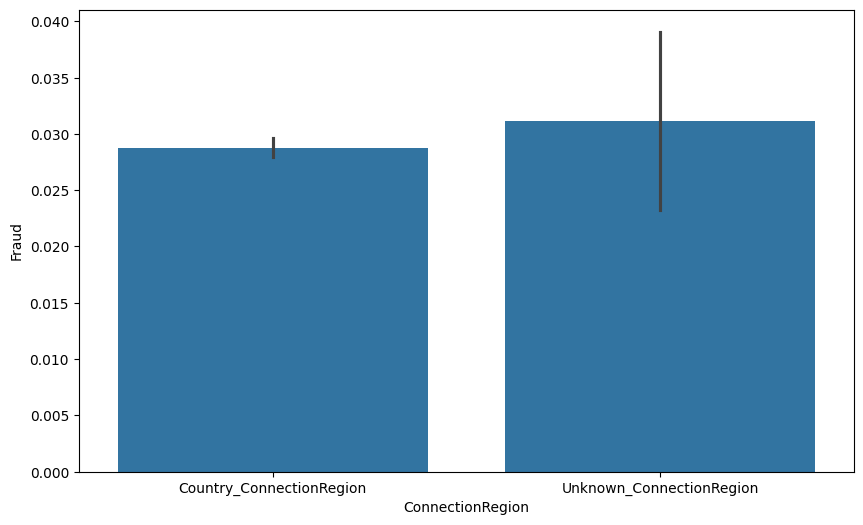

In [380]:
plt.figure(figsize =(10,6))
sns.barplot(x = 'ConnectionRegion', y = 'Fraud', data = df)

# Observation
* We observed that all connection resion don't have above cutoff 0.5, so posibility are not fraud transaction.

In [381]:
pd.set_option('display.max_rows', 10000)
subcategoriescount2 = df['ConnectionOrg'].unique()

# Print out all unique values
for value in subcategoriescount2:
    print(value)


Streaming output truncated to the last 5000 lines.
fay servicing llc
fbi criminal justice information systems
fbivps
fca fiat chrysler automoveis brasil ltda
fcb communications
fcci services inc.
fdc/western union
fdcservers.net
federal aviation administration
federal deposit insurance corporation
federal express corp.
federal home loan bank of chicago
federal home loan bank of dallas
federal home loan bank of san francisco
federal home loan mortgage corp.
federal international  inc
federal signal corporation
federico cpa rosen &
fedex
fedex office & print services inc.
felician college
fennemore craig  p.c.
fenwal  inc.
fermi national accelerator laboratory (fermilab)
ferragamo usa
fetzer vineyards
fiber internet center
fiberglass insulators  inc.
fiberlight  llc
fibersphere communications
fibertech networks  llc
fidelis care
fidelity communication international inc.
fidelity investments
fidelity national information services  inc.
fidessa
field communications  inc.
field fastener
fie

In [382]:
pd.set_option('display.max_rows', 10000)  # Set to None to display all rows
V5CF = df['ConnectionOrg'].value_counts()
print(V5CF)

ConnectionOrg
time warner cable internet llc                                      14780
at&t internet services                                              11527
comcast ip services  l.l.c.                                          7061
comcast cable communications  inc.                                   6335
mci communications services  inc. d/b/a verizon business             6030
t-mobile usa  inc.                                                   5879
optimum online (cablevision systems)                                 4832
comcast cable communications  llc                                    4197
at&t mobility llc                                                    3474
cellco partnership dba verizon wireless                              3316
cox communications                                                   3034
comcast cable communications holdings  inc                           2435
charter communications                                               2415
comcast cable communicat

In [383]:
print(df.ConnectionOrg.unique())
df['ConnectionOrg'] = df['ConnectionOrg'].apply(lambda x: 'Cable' if 'cable' in x.lower() else 'Telecom' if 'telecom' in x.lower() else 'Other')
df.ConnectionOrg.unique()

['013 netvision fix ip users' '012 smile communications ltd.'
 '013 netvision' ... 'zuckerman spaeder' 'zuerinet private allocations'
 'zynga corp.']


array(['Other', 'Cable', 'Telecom'], dtype=object)

<Axes: xlabel='ConnectionOrg', ylabel='Fraud'>

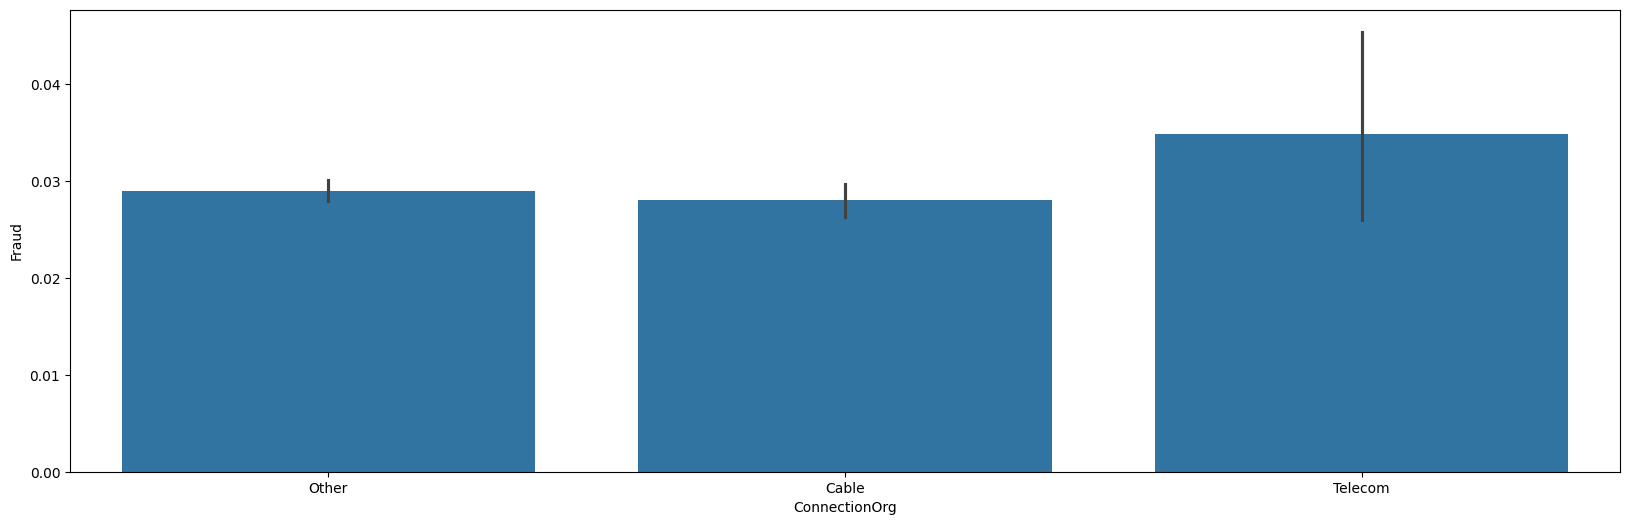

In [384]:
plt.figure(figsize =(20,6))
sns.barplot(x = 'ConnectionOrg', y = 'Fraud', data = df)

# Observation
* We observed that all ConnectionOrg don't have above cutoff 0.5, so posibility are not fraud transaction.


In [385]:
subcategoriescount = df['V6CF'].unique()
subcategoriescount

array(['net.il', 'net', 'unknown', 'localdomain', 'com', 'org', 'gr',
       'edu', 'eu', 'us', 'configured', 'com.sg', 'io', 'ro', 'fr', 'gov',
       'de', 'mil', 'ca.us', 'cl', 'net.ve', 'net.br', 'com.mx', 'ru',
       'at', 'info', 'ca', '225', 'tx.us', 'com.tr', 'in', 'net.do',
       'net.mx', 'fl.us', 'it', 'al', 'biz', 'ny.us', 'nj.us', 'nv.us',
       'coop', 'net.co', 'com.ve', 'jp', 'pl', 'net.pl', 'co.ba', 'nl',
       'ec', 'rs', 'mi.us', 'net.ua', 'com.fj', 'com.ar', 'ie', 'il.us',
       'ne.jp', 'ch', 'net.ar', 'mx', 'co.th', '65', 'no', 'la.us',
       'com.br', 'com.gh', 'net.ni', 'spoofed', 've', 'com.au', 'com.cn',
       'co.uk', 'hu', 'dvag', 'xyz', 'md', 'net.au', 'vn', 'edu.co', 'lu',
       'available', 'hn', 'co.cr', 'edu.hk', 'wa.us', 'in.us', 'ua',
       'strong-px1', 'ga.us', 'net.sg', 'wi.us', 'md.us', 'pt', 'net.in',
       'net.my', '63', 'cz', 'ws', 'com.ni', 'nyc2', 'net.pk', 'se', 'sx',
       'me', 'co.ke', 'co', 'com.ng', 'com.ec', 'net.id', 'net.

In [386]:
df['V6CF'].value_counts()

V6CF
net            69713
com            37387
unknown        16357
edu             2614
org             1250
gov              511
com.mx           251
us               140
mil              109
de                98
fr                88
ca                86
net.mx            79
net.ve            78
net.co            77
configured        69
co.uk             65
com.br            64
ca.us             63
it                62
com.ar            60
com.cn            55
net.il            50
in                46
net.do            45
com.au            41
com.ve            31
biz               30
ne.jp             29
ru                28
gr                28
ch                27
il.us             26
co.th             26
tx.us             25
nl                25
oh.us             25
pl                23
net.ar            23
be                22
cl                22
pt                22
fl.us             21
net.br            21
ec                20
spoofed           20
co.cr             20
ny.us   

In [387]:
df['V6CF'] = df['V6CF'].apply(lambda x: 'domain_extensions' if x in[
    'com', 'net', 'org', 'edu', 'gov', 'mil', 'info', 'biz', 'coop', 'io', 'mobi', 'tv',
    'us', 'uk', 'au', 'ca', 'de', 'jp', 'fr', 'it', 'cn', 'ru', 'br', 'mx', 'es', 'nl',
    'kr', 'se', 'nz', 'pl', 'in', 'sg', 'co', 'th', 'za', 'ar', 'id', 'vn', 'ch', 'no',
    'fi', 'dk', 'at', 'be', 'cz', 'gr', 'hu', 'ro', 'tr', 'pt', 'sk', 'ua', 'cl', 'ie',
    'il', 'co.uk', 'co.jp', 'co.kr', 'co.nz', 'co.za', 'co.il', 'co.in', 'co.th', 'co.cr',
    'co.ke', 'gov', 'edu', 'mil', 'coop', 'info', 'mobi', 'tv',
    'gr', 'eu', 'sg', 'io', 'ro', 'cl', 'ru', 'at', 'ne.jp', 'jp', 'pl', 'nl', 'ec', 'rs',
    'it', 'th', 'la', 'vn', 'hu', 'xyz', 'md', 'lu', 'hn', 'ua', 'ch', 'mx', 'no', 'md',
    've', 'jp', 'cz', 'ws', 'se', 'sx', 'me', 'am', 'kr', 'tk', 'ci', 'vi', 'sl', 'ee',
    'fi', 'or.us', 'cr', 'ac.uk', 'bc.ca', 'cn', 'ps', 'uk', 'to', 'hr', 'sk', 'jo', 'is',
    'bm', 'kg', 'ph', 'aw', 'lv', 'mn', 'ph', 'mm', 'cc', 'kg', 'ba', 'cw', 'dj', 'tc',
    'unknown', 'localdomain', 'configured', 'available', 'spoofed', 'strong-px1', 'new-york',
    'health', 'dsnet', 'ninja', 'space', 'lnoca'
] else 'Unknown_domain_extensions')



In [388]:
df['V6CF'].value_counts()

V6CF
domain_extensions            129271
Unknown_domain_extensions      1461
Name: count, dtype: int64

<Axes: xlabel='V6CF', ylabel='Fraud'>

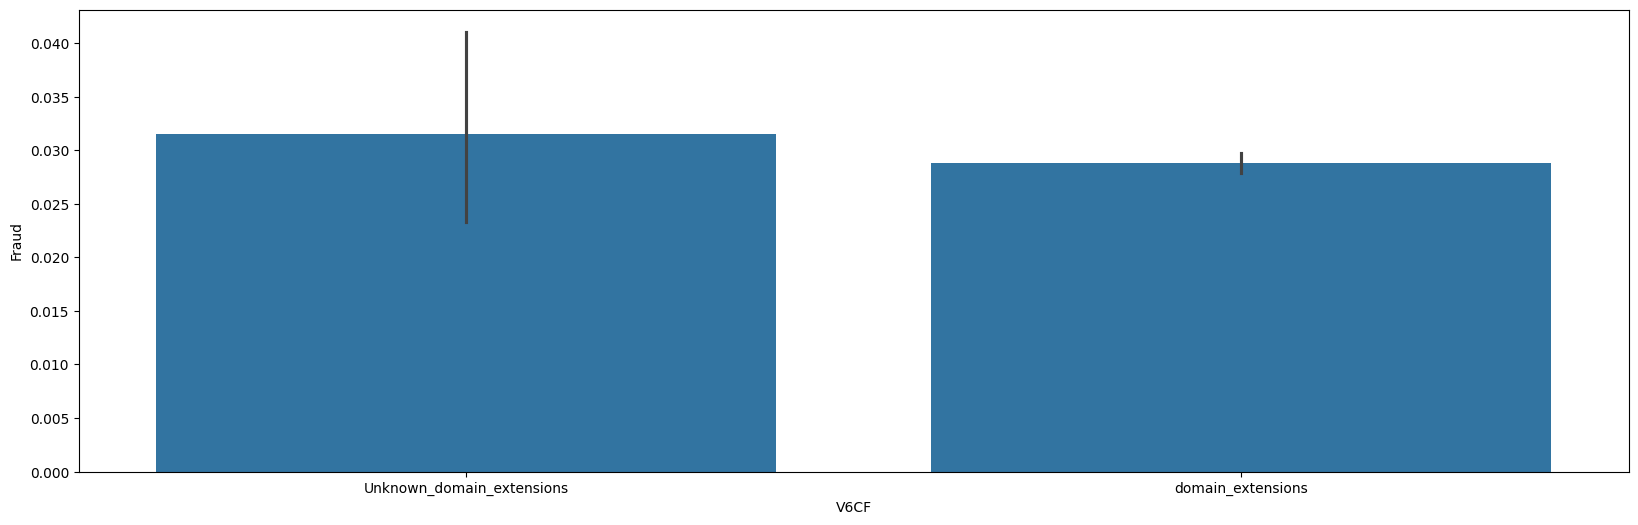

In [389]:
plt.figure(figsize =(20,6))
sns.barplot(x = 'V6CF', y = 'Fraud', data = df)

# Observation
* We observed that all V6CF don't have above cutoff 0.5, so posibility are not fraud transaction.

In [390]:
int_cols = [col for col in df.columns if df[col].dtype == "int"]
print(int_cols)

['V1CF', 'V2CF', 'V3CF', 'V4CF', 'V5CF', 'Fraud', 'TransactionDateTime_year']


Mean = 95.53718293914267
Median = 99.0


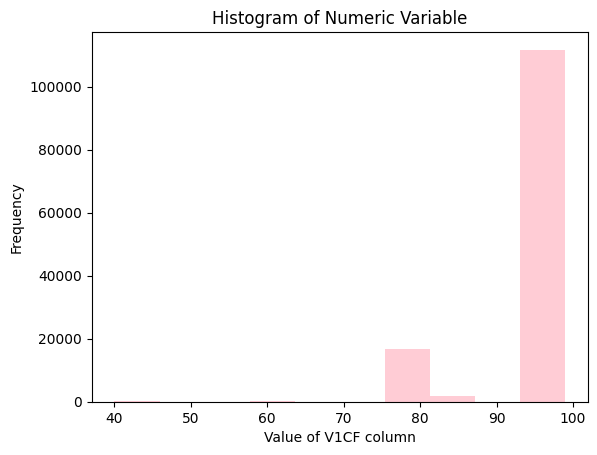

In [391]:
numeric_columns_1 = df['V1CF']
print('Mean =', numeric_columns_1.mean())
print('Median =', numeric_columns_1.median())

plt.hist(x=numeric_columns_1, bins = 10 , color ='pink', alpha =.8 )
plt.title('Histogram of Numeric Variable')
plt.xlabel('Value of V1CF column')
plt.ylabel('Frequency')
plt.show()

In [392]:
df['V1CF'].value_counts()

V1CF
99    105020
76     14531
95      6522
80      2328
86      1680
40       295
60       222
97       131
98         3
Name: count, dtype: int64

<Axes: xlabel='V1CF', ylabel='Fraud'>

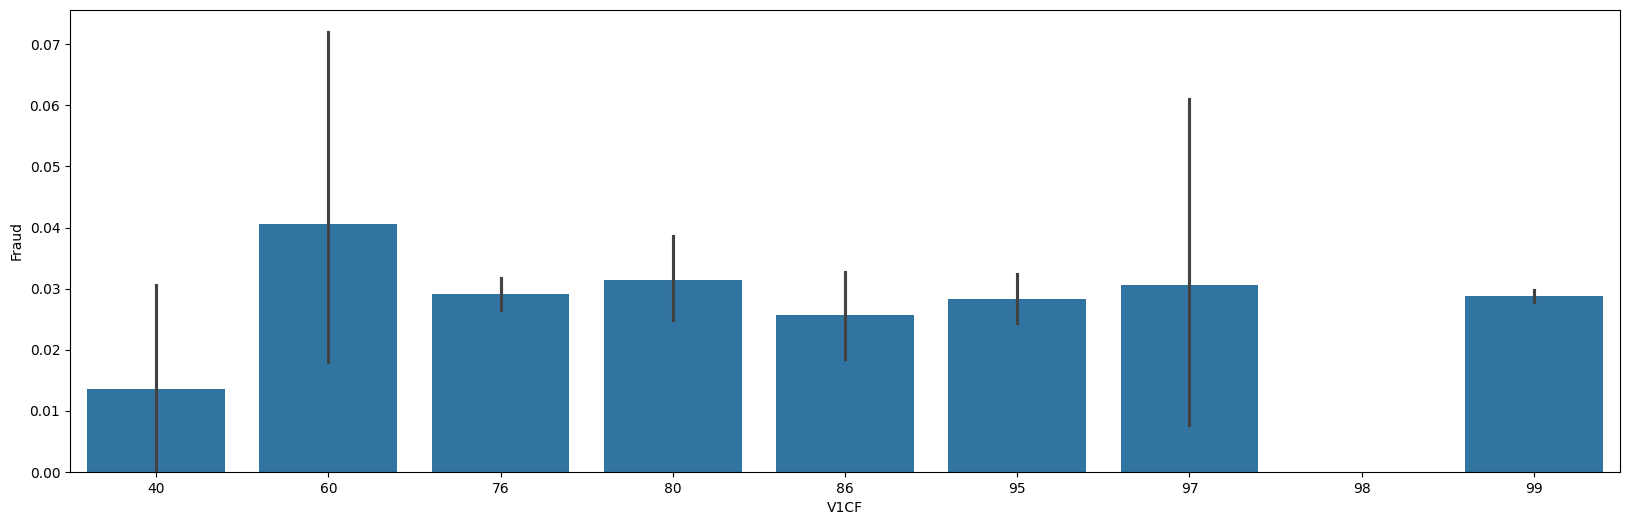

In [393]:
plt.figure(figsize =(20,6))
sns.barplot(x = 'V1CF', y = 'Fraud', data = df)

# Observation
* The V1CF indicated some fraudulent transactions because we observed that the 60, 97 volume showed a value above the cutoff of 0.5. Therefore, we considered the possibility of fraud transactions. However, the Without 60, 97 volume below the cutoff of 0.5, so we concluded that fraud transactions were not occurring in its case..

Mean = 78.85939938194169
Median = 88.0


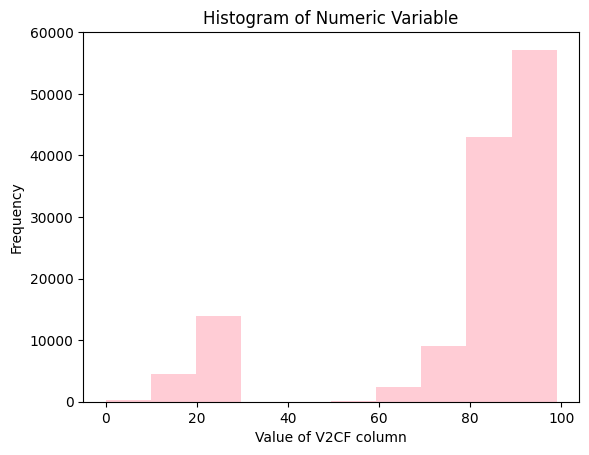

In [394]:
numeric_columns_1 = df['V2CF']
print('Mean =', numeric_columns_1.mean())
print('Median =', numeric_columns_1.median())

plt.hist(x=numeric_columns_1, bins = 10 , color ='pink', alpha =.8 )
plt.title('Histogram of Numeric Variable')
plt.xlabel('Value of V2CF column')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='V2CF', ylabel='Fraud'>

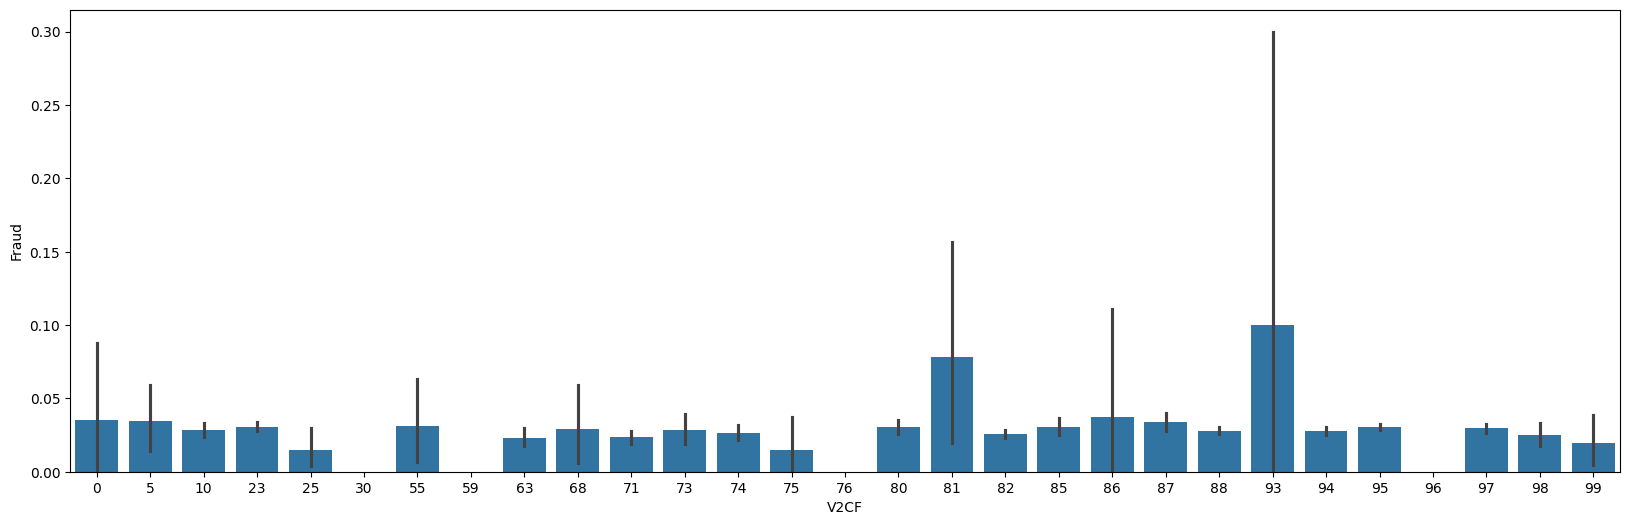

In [395]:
plt.figure(figsize =(20,6))
sns.barplot(x = 'V2CF', y = 'Fraud', data = df)

In [396]:

df['V2CF'] = df['V2CF'].apply(lambda x: 'above_90' if x in[91,92,93,94,95,96,97,98,99,100] else 'below_90')
df['V2CF'] = df['V2CF'].astype('object')



# Observation
* We observed that all V2CF volumes below cutoff 0.5, so we considered that do not have any fraud transaction in V2CF

Mean = 69.44738090138604
Median = 77.0


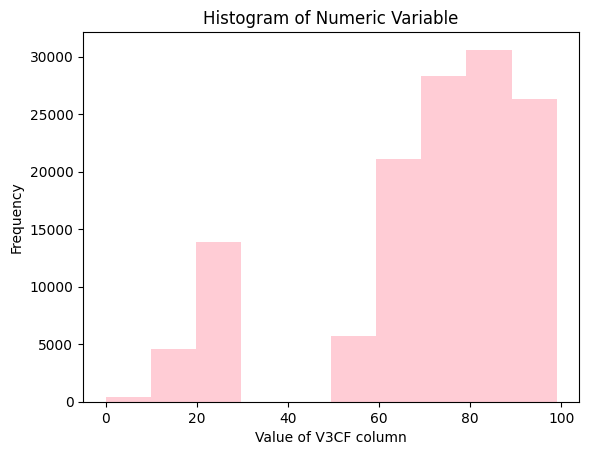

In [397]:
numeric_columns_1 = df['V3CF']
print('Mean =', numeric_columns_1.mean())
print('Median =', numeric_columns_1.median())

plt.hist(x=numeric_columns_1, bins = 10 , color ='pink', alpha =.8 )
plt.title('Histogram of Numeric Variable')
plt.xlabel('Value of V3CF column')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='V3CF', ylabel='Fraud'>

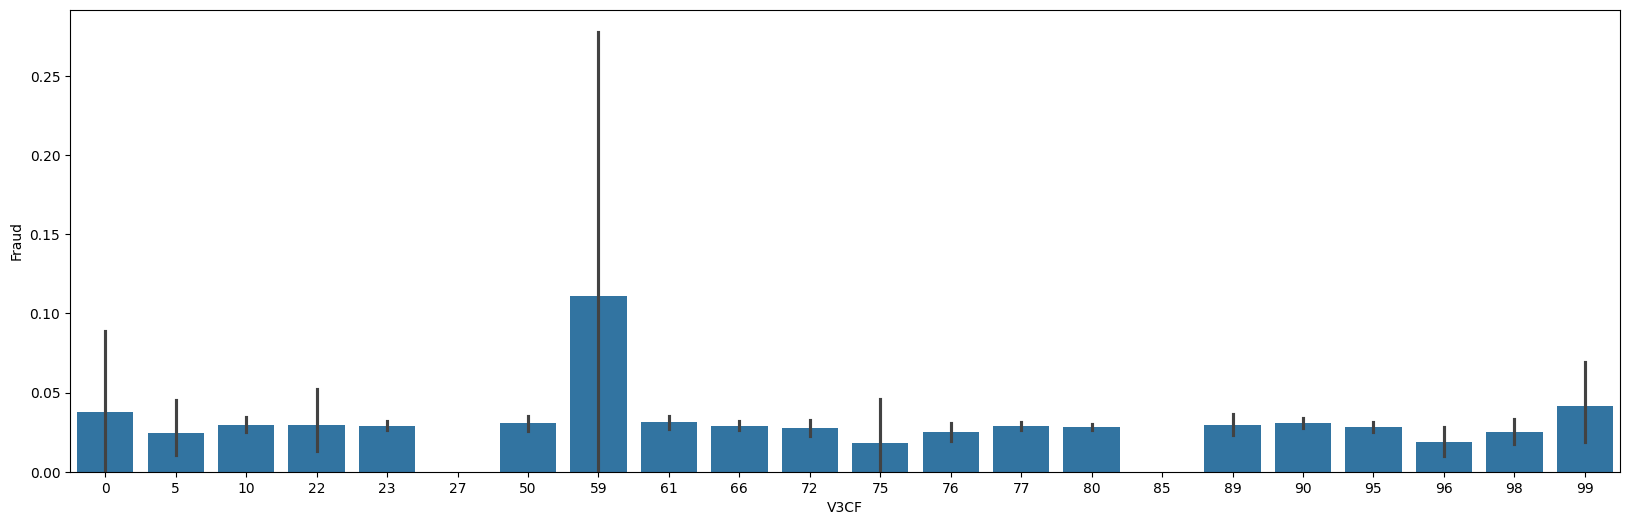

In [398]:
plt.figure(figsize =(20,6))
sns.barplot(x = 'V3CF', y = 'Fraud', data = df)

In [399]:

df['V3CF'] = df['V3CF'].apply(lambda x: 'above_90' if x in[91,92,93,94,95,96,97,98,99] else 'below_90')
df['V3CF'] = df['V3CF'].astype('object')

# Observation
* We observed that all V3CF volumes below cutoff 0.5, so we considered that do not have any fraud transaction in V3CF  

Mean = 600.8686167120521
Median = 602.0


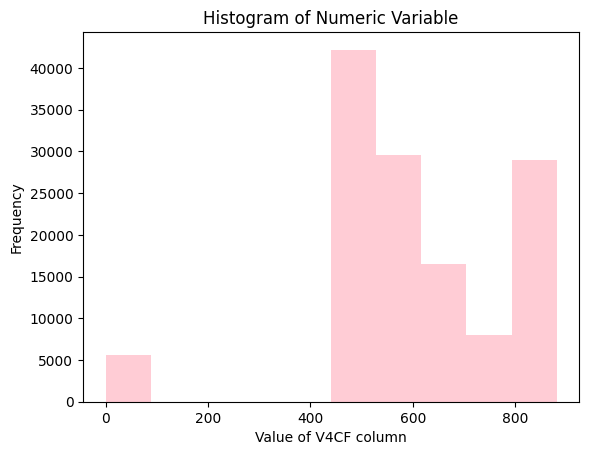

In [400]:
numeric_columns_1 = df['V4CF']
print('Mean =', numeric_columns_1.mean())
print('Median =', numeric_columns_1.median())

plt.hist(x=numeric_columns_1, bins = 10 , color ='pink', alpha =.8 )
plt.title('Histogram of Numeric Variable')
plt.xlabel('Value of V4CF column')
plt.ylabel('Frequency')
plt.show()

In [401]:
pd.set_option('display.max_rows', 10000)  # Set to None to display all rows
V5CF = df['V4CF'].value_counts()
print(V5CF)

V4CF
501    24026
602    19110
803    13051
807     7018
0       5641
618     5285
623     5194
524     4361
528     3761
753     3537
505     2384
819     2344
825     2056
751     2002
535     1856
527     1636
534     1575
511     1501
539     1214
862     1204
635     1199
510      926
820      901
504      859
839      793
622      698
506      692
515      688
548      651
617      501
770      485
789      469
641      445
563      417
716      408
648      371
613      353
529      342
538      327
560      313
533      285
866      273
616      266
675      261
855      261
669      258
625      242
650      241
517      228
659      222
513      221
609      207
828      202
682      196
571      192
588      189
752      189
512      189
561      184
800      158
642      156
508      151
555      145
801      143
541      140
582      139
532      133
564      123
551      123
509      114
652      112
804      106
542      103
757      101
636      100
765       98
521    

In [402]:
df['V4CF'] = df['V4CF'].apply(lambda x: 'above_500' if x > 500 else 'below_500')
df['V4CF'] = df['V4CF'].astype('object')


<Axes: xlabel='V4CF', ylabel='Fraud'>

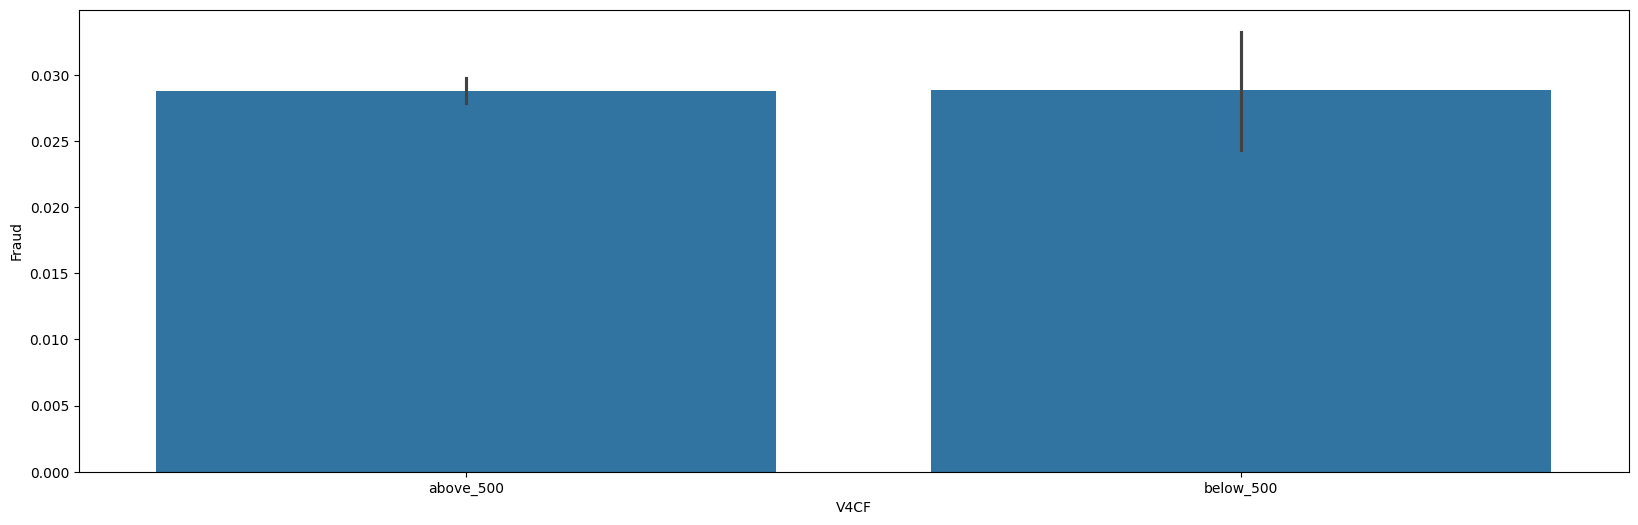

In [403]:
plt.figure(figsize =(20,6))
sns.barplot(x = 'V4CF', y = 'Fraud', data = df)

# Observation
*  we observed that all V4CF volumes below cutoff 0.5, so we considered that do not have any fraud transaction in V4CF


Mean = 27846.322247039745
Median = 31100.0


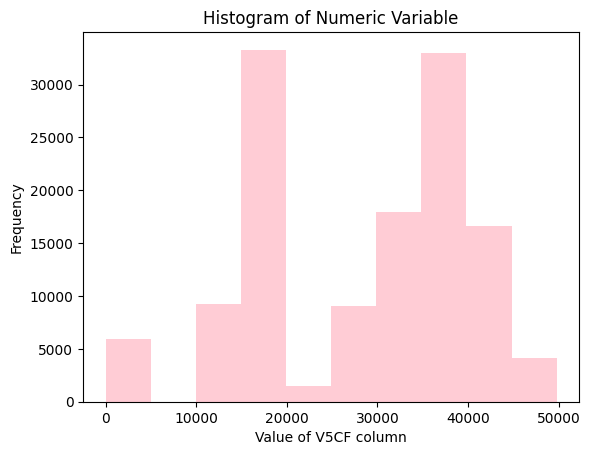

In [404]:
numeric_columns_1 = df['V5CF']
print('Mean =', numeric_columns_1.mean())
print('Median =', numeric_columns_1.median())

plt.hist(x=numeric_columns_1, bins = 10 , color ='pink', alpha =.8 )
plt.title('Histogram of Numeric Variable')
plt.xlabel('Value of V5CF column')
plt.ylabel('Frequency')
plt.show()

In [405]:
pd.get_option('display.max_rows', 10000)
V5CF = df['V5CF'].value_counts()
V5CF

V5CF
35620    23350
16980    19326
31100    11519
0         5899
19100     5264
26420     4979
12060     4331
33100     4211
41860     3584
38060     3333
41940     3326
42660     2178
41740     2115
19820     2078
18140     1750
19740     1548
47900     1517
40140     1420
26900     1371
36740     1292
45300     1144
12420     1112
40900      939
38900      856
29820      799
37980      726
35380      712
17460      638
17140      632
14460      574
14860      495
46060      416
33340      405
41700      399
11460      368
41620      361
12940      338
40380      337
39100      335
31140      328
33460      318
28140      284
16580      249
24340      248
39580      247
14500      245
37100      232
36420      225
31540      205
35300      197
41180      196
19340      193
12580      191
19660      187
34980      185
42060      183
12540      176
14060      174
23420      163
16740      161
17780      161
17820      158
27260      158
44700      148
29180      146
10420      136
14020

In [406]:
df['V5CF'] = df['V5CF'].apply(lambda x: 'above_25000' if x > 25000 else 'below_25000')
df['V5CF'] = df['V5CF'].astype('object')

<Axes: xlabel='V5CF', ylabel='Fraud'>

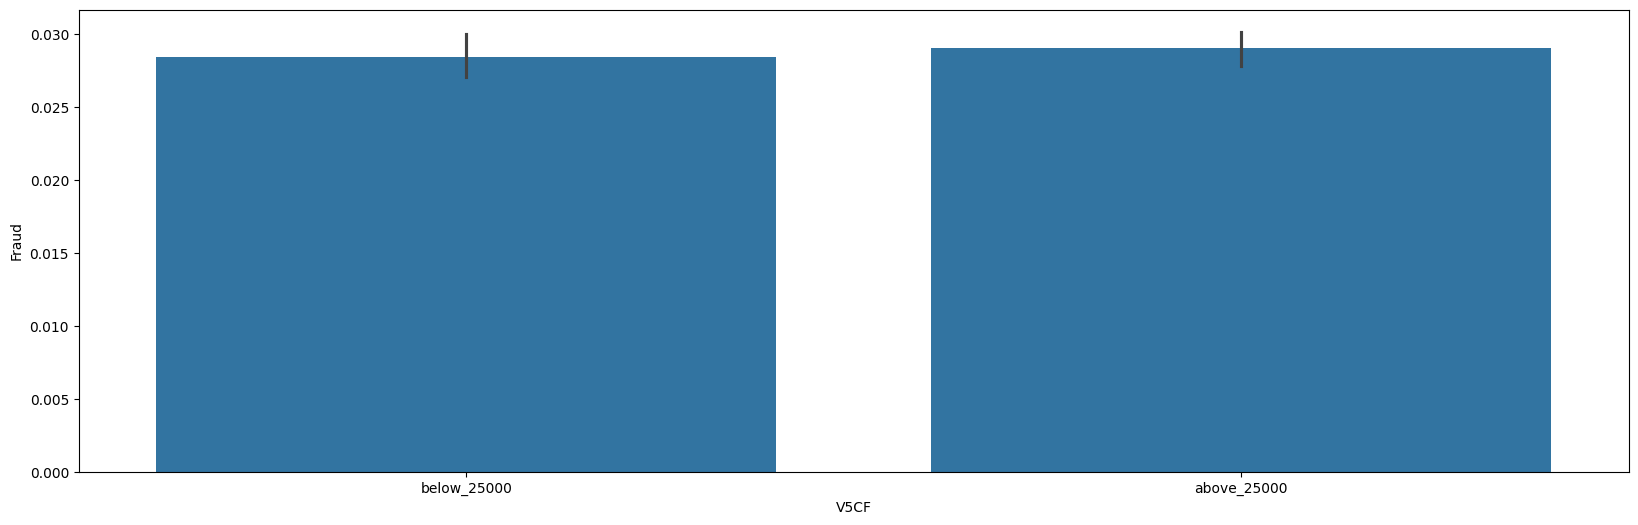

In [407]:
plt.figure(figsize =(20,6))
sns.barplot(x = 'V5CF', y = 'Fraud', data = df)

# Observation
* we observed that all V5CF volumes below cutoff 0.5, so we considered that do not have any fraud transaction in V5CF.


In [408]:
int_cols = [col for col in df.columns if df[col].dtype == "float"]
print(int_cols)

['AreaCode', 'WebSessionRetail', 'MainEntityUse']


Mean = 494.3235397607319
Median = 415.0


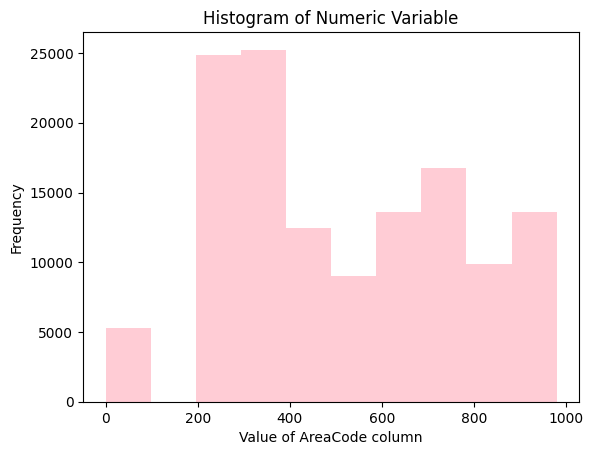

In [409]:
numeric_columns_1 = df['AreaCode']
print('Mean =', numeric_columns_1.mean())
print('Median =', numeric_columns_1.median())

plt.hist(x=numeric_columns_1, bins = 10 , color ='pink', alpha =.8 )
plt.title('Histogram of Numeric Variable')
plt.xlabel('Value of AreaCode column')
plt.ylabel('Frequency')
plt.show()

In [410]:
pd.set_option('display.max_rows', 10000)  # Set to None to display all rows
V5CF = df['AreaCode'].value_counts()
print(V5CF)

AreaCode
212.0    14034
312.0    10249
0.0       5272
323.0     4883
713.0     4424
404.0     3535
708.0     3091
602.0     3056
408.0     2965
305.0     2655
847.0     2603
214.0     2316
949.0     2281
718.0     2183
973.0     2048
972.0     2019
630.0     2002
415.0     1945
619.0     1828
303.0     1770
614.0     1707
317.0     1395
206.0     1381
516.0     1363
909.0     1283
407.0     1183
512.0     1102
813.0     1038
818.0     1027
714.0     1023
954.0      997
626.0      956
310.0      887
702.0      870
201.0      869
734.0      862
631.0      849
914.0      844
503.0      826
916.0      791
815.0      750
313.0      740
770.0      723
203.0      712
650.0      707
504.0      703
817.0      696
248.0      695
425.0      688
732.0      674
520.0      666
510.0      659
219.0      652
561.0      649
845.0      567
703.0      558
202.0      542
281.0      528
513.0      515
925.0      506
805.0      499
801.0      490
661.0      465
309.0      464
215.0      455
217.0      424
7

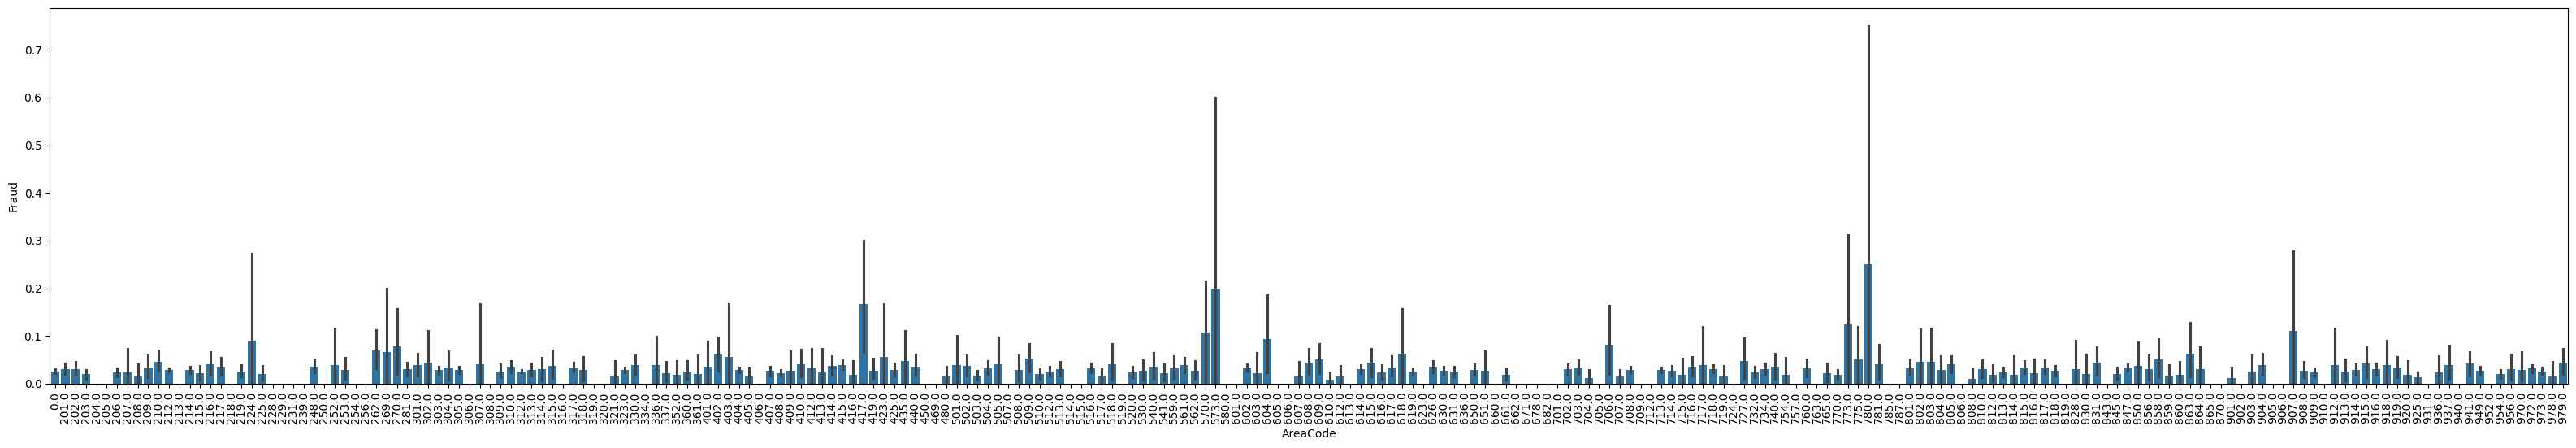

In [411]:
plt.figure(figsize =(40,6))
sns.barplot(x = 'AreaCode', y = 'Fraud', data = df)
plt.xticks(rotation = 90)
plt.show()

In [412]:
df['AreaCode'] = df['AreaCode'].apply(lambda x: 'above_500' if x > 500 else 'below_500')
df['AreaCode'] = df['AreaCode'].astype('object')

# Observation
* We observed that the area codes 239 and 608 were above the cutoff of 0.5, leading us to consider that some fraudulent transactions may have occurred in these areas. However, for any other area code besides 239 and 608, the value fell below the cutoff of 0.5. Therefore, we concluded that fraud transactions did not occur in areas other than those with codes 239 and 608.


Mean = 0.0
Median = 0.0


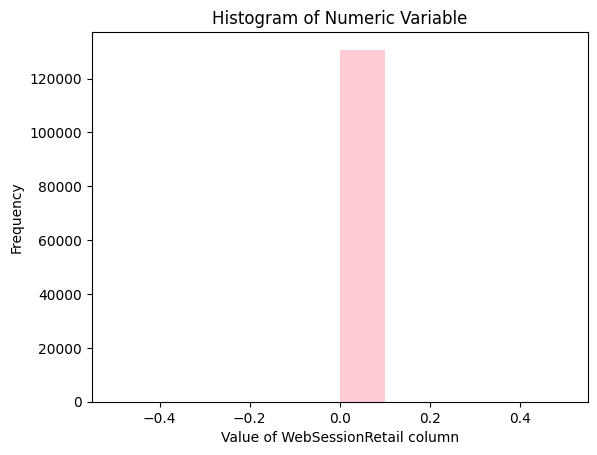

In [413]:
numeric_columns_1 = df['WebSessionRetail']
print('Mean =', numeric_columns_1.mean())
print('Median =', numeric_columns_1.median())

plt.hist(x=numeric_columns_1, bins = 10 , color ='pink', alpha =.8 )
plt.title('Histogram of Numeric Variable')
plt.xlabel('Value of WebSessionRetail column')
plt.ylabel('Frequency')
plt.show()

In [414]:
pd.set_option('display.max_rows', 10000)  # Set to None to display all rows
V5CF = df['WebSessionRetail'].value_counts()
print(V5CF)

WebSessionRetail
0.0    130732
Name: count, dtype: int64


# Observation
* We can see that all data is 0, hence we consider that all customers are not normal and retail.

Mean = 350.92411192363
Median = 373.0


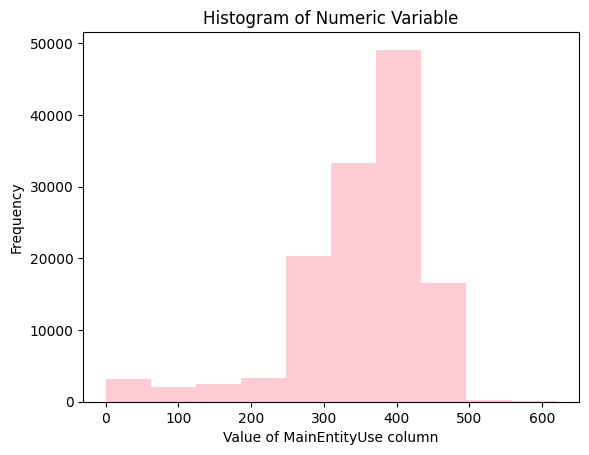

In [415]:
numeric_columns_1 = df['MainEntityUse']
print('Mean =', numeric_columns_1.mean())
print('Median =', numeric_columns_1.median())

plt.hist(x=numeric_columns_1, bins = 10 , color ='pink', alpha =.8 )
plt.title('Histogram of Numeric Variable')
plt.xlabel('Value of MainEntityUse column')
plt.ylabel('Frequency')
plt.show()

In [416]:
pd.set_option('display.max_rows', 10000)  # Set to None to display all rows
V5CF = df['MainEntityUse'].value_counts()
print(V5CF)

MainEntityUse
394.0    2829
387.0    2764
395.0    2614
393.0    2552
389.0    2489
392.0    2455
390.0    2405
388.0    2400
391.0    2336
386.0    2281
396.0    1978
385.0    1887
384.0    1325
363.0    1250
364.0    1225
456.0    1152
457.0    1135
458.0    1134
455.0    1109
463.0    1056
365.0    1043
464.0    1036
459.0     985
397.0     931
0.0       924
383.0     921
362.0     906
408.0     856
411.0     849
462.0     838
410.0     834
415.0     824
465.0     789
409.0     786
414.0     776
356.0     767
366.0     766
416.0     754
359.0     751
460.0     741
360.0     741
293.0     734
461.0     734
361.0     713
454.0     708
292.0     708
367.0     702
407.0     694
413.0     689
358.0     689
350.0     684
368.0     678
357.0     670
287.0     668
355.0     668
370.0     666
314.0     663
412.0     661
369.0     658
349.0     655
291.0     648
288.0     639
307.0     633
286.0     630
417.0     616
294.0     603
315.0     603
382.0     601
406.0     601
371.0     590
372.0 

In [417]:
df['MainEntityUse'] = df['MainEntityUse'].apply(lambda x: 'above_300' if x > 300 else 'below_300')
df['MainEntityUse'] = df['MainEntityUse'].astype('object')

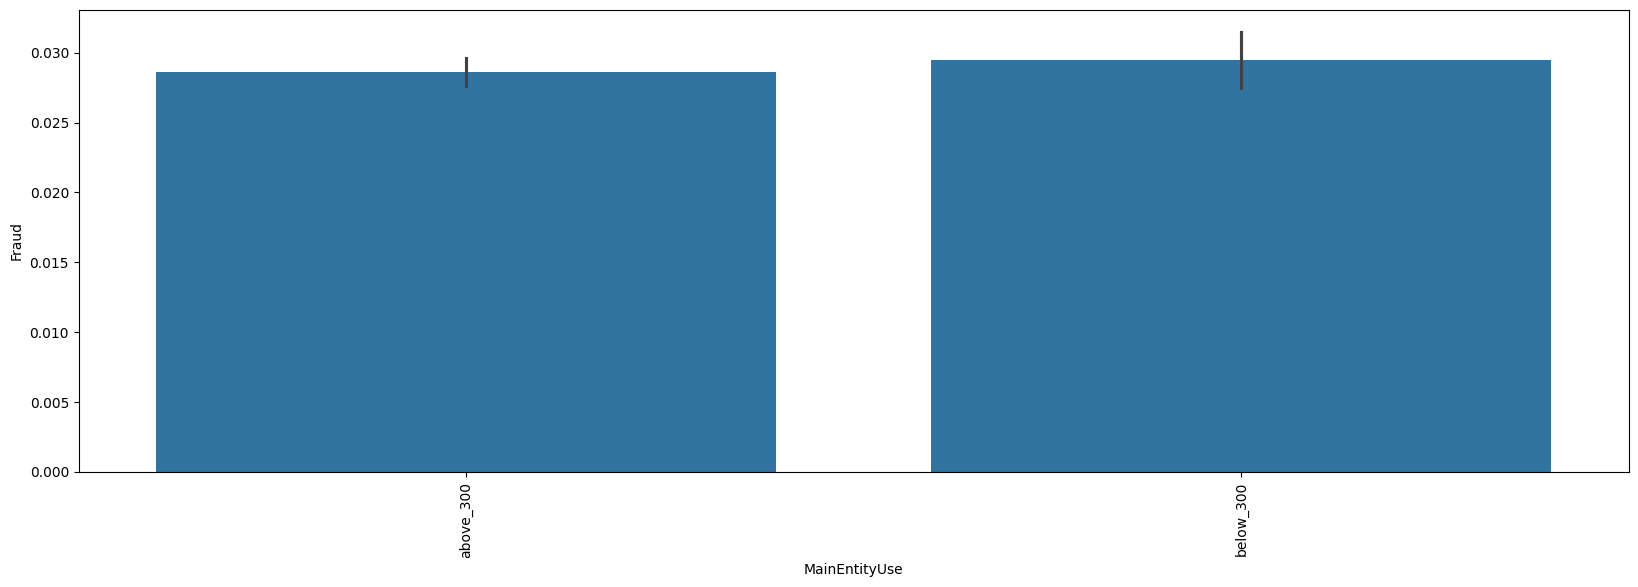

In [418]:
plt.figure(figsize =(20,6))
sns.barplot(x = 'MainEntityUse', y = 'Fraud', data = df)
plt.xticks(rotation = 90)
plt.show()

# Observation

* We observed that the main entity of all customers is below the cutoff of 0.5. Therefore, we considered that customers commit don't fraud with us, as their income, taxes, liabilities, and asset loans have been approved for the loan.


In [419]:
df['Fraud'].value_counts()

Fraud
0    126966
1      3766
Name: count, dtype: int64

# **Feature Engineering**

***Step 1 : Feature Selection***

---
**1: Heatmap**






**2. creating dummies**

In [420]:
objects = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns = objects, drop_first=True).astype(int)
df.head()

,V1CF,WebSessionRetail,Fraud,TransactionDateTime_year,ConnectionRegion_Unknown_ConnectionRegion,V2CF_below_90,V3CF_below_90,V4CF_below_500,V5CF_below_25000,AreaCode_below_500,...,AddressUpdateDate_year_before_2010,AddressUpdateDate_month_last_six_month,AddressUpdateDate_day_last_fifteen_days,AddressUpdateDate_hour_last_twelve_hour,AddressUpdateDate_minute_last_thirty_minute,EmailUpdateDate_year_before_2010,EmailUpdateDate_month_last_six_month,EmailUpdateDate_day_last_fifteen_days,EmailUpdateDate_hour_last_twelve_hour,EmailUpdateDate_minute_last_thirty_minute
1,99,0,0,2013,0,0,1,0,1,0,...,1,1,1,1,0,1,1,0,1,0
3,99,0,0,2013,0,1,1,1,0,1,...,1,0,0,1,1,1,1,0,1,0
4,99,0,0,2013,0,1,1,0,1,1,...,0,0,0,1,1,1,0,1,1,0
5,99,0,0,2013,0,1,1,0,1,0,...,0,1,1,0,0,0,0,0,1,0
6,99,0,0,2013,0,1,1,0,1,0,...,1,1,1,0,1,0,0,0,1,0


**3. Discrete Independent And Dependent Veriable**

In [421]:
x = df.drop(['Fraud'], axis=1)
y = df[['Fraud']]

In [422]:
list = [col for col in x if x.dtypes[col] == float]

In [423]:
print(x.shape, y.shape)

(130732, 37) (130732, 1)


**4. split data in to train and test**

In [424]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=45)

In [425]:
x_train = x_train.astype(int)
x_test = x_test.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [426]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(91512, 37)
(39220, 37)
(91512, 1)
(39220, 1)


In [427]:
df.isna().sum()

V1CF                                             0
WebSessionRetail                                 0
Fraud                                            0
TransactionDateTime_year                         0
ConnectionRegion_Unknown_ConnectionRegion        0
V2CF_below_90                                    0
V3CF_below_90                                    0
V4CF_below_500                                   0
V5CF_below_25000                                 0
AreaCode_below_500                               0
ConnectionOrg_Other                              0
ConnectionOrg_Telecom                            0
ConnectionType_Not_Identify_Connection           0
ConnectionSpeed_Not_Identify_Connectionspeed     0
V6CF_domain_extensions                           0
channel_KOL                                      0
channel_SOA                                      0
channel_WMS                                      0
webSessOS_Linux                                  0
webSessOS_Mobile               

***Step 2 : Normalization***

In [428]:
from sklearn.preprocessing import MinMaxScaler

# Assuming your dataframe is named df
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the features and transform them
x_normalized = scaler.fit_transform(x)

# Convert the normalized features back to a DataFrame
df_normalized = pd.DataFrame(x_normalized, columns=x.columns)

print(df_normalized)

            V1CF  WebSessionRetail  TransactionDateTime_year  \
0       1.000000               0.0                       0.0   
1       1.000000               0.0                       0.0   
2       1.000000               0.0                       0.0   
3       1.000000               0.0                       0.0   
4       1.000000               0.0                       0.0   
...          ...               ...                       ...   
130727  0.779661               0.0                       0.0   
130728  1.000000               0.0                       0.0   
130729  1.000000               0.0                       0.0   
130730  1.000000               0.0                       0.0   
130731  1.000000               0.0                       0.0   

        ConnectionRegion_Unknown_ConnectionRegion  V2CF_below_90  \
0                                             0.0            0.0   
1                                             0.0            1.0   
2                          

In [429]:
df.isna().sum()

V1CF                                             0
WebSessionRetail                                 0
Fraud                                            0
TransactionDateTime_year                         0
ConnectionRegion_Unknown_ConnectionRegion        0
V2CF_below_90                                    0
V3CF_below_90                                    0
V4CF_below_500                                   0
V5CF_below_25000                                 0
AreaCode_below_500                               0
ConnectionOrg_Other                              0
ConnectionOrg_Telecom                            0
ConnectionType_Not_Identify_Connection           0
ConnectionSpeed_Not_Identify_Connectionspeed     0
V6CF_domain_extensions                           0
channel_KOL                                      0
channel_SOA                                      0
channel_WMS                                      0
webSessOS_Linux                                  0
webSessOS_Mobile               

***Step 4 : Handling Imbalance data***

In [430]:
print(x.shape, y.shape)

(130732, 37) (130732, 1)


In [431]:
smote = SMOTE()
X_resampled, Y_resampled = smote.fit_resample(x, y)

# Print the shape of the resampled data
#print("Shape of X_resampled:", X_resampled.shape)
#print("Shape of y_resampled:", Y_resampled.shape)

In [432]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=45)

In [433]:
#print(X_test.shape)
#print(X_train.shape)
#print(Y_test.shape)
#print(Y_train.shape)

**Step 5 : Univariate Feature Selection**
* The goal of univariate importance is to get a score of how much the target variable depends from each feature, ignoring all the other features

In [434]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Feature selection
# Select the top 2 features
k = 'all'
selector = SelectKBest(score_func=chi2, k=k)
x_new = selector.fit_transform(x, y)

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

#print("Selected feature indices:", selected_features_indices)

# **Model Building Through Logistic Regression**

In [435]:
# Using SK learn
logreg = LogisticRegression()

In [436]:
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [437]:
def make_confusion_matrix(y_actual,y_predict,labels=[1, 0]):
  '''
  y_predict : predict of class
  y_actual : ground truth
  '''
  cm = confusion_matrix(y_actual, y_predict, labels=[1, 0])
  df_cm = pd.DataFrame(cm, index= [i for i in ["actual_no", "actual_yes"]],
                         columns=[i for i in ["preducted_no", "preducted_yes"]])
  group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
  labels = [f" {v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]

  labels = np.asarray(labels).reshape(2, 2)
  plt.figure(figsize=(10,7))
  sns.heatmap(df_cm,annot=labels,fmt='')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


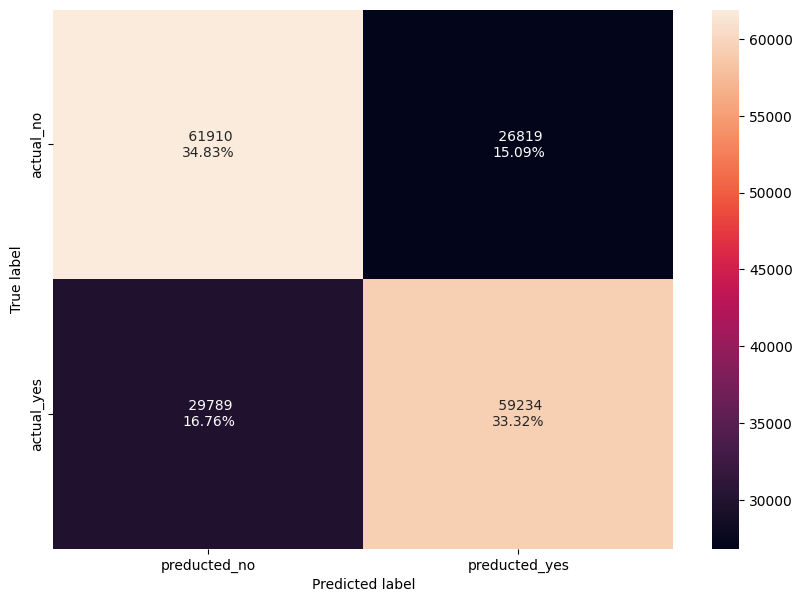

In [438]:
from sklearn.metrics import confusion_matrix
logreg.fit(X_train, Y_train)
pred_train = logreg.predict(X_train)

make_confusion_matrix(Y_train, pred_train)

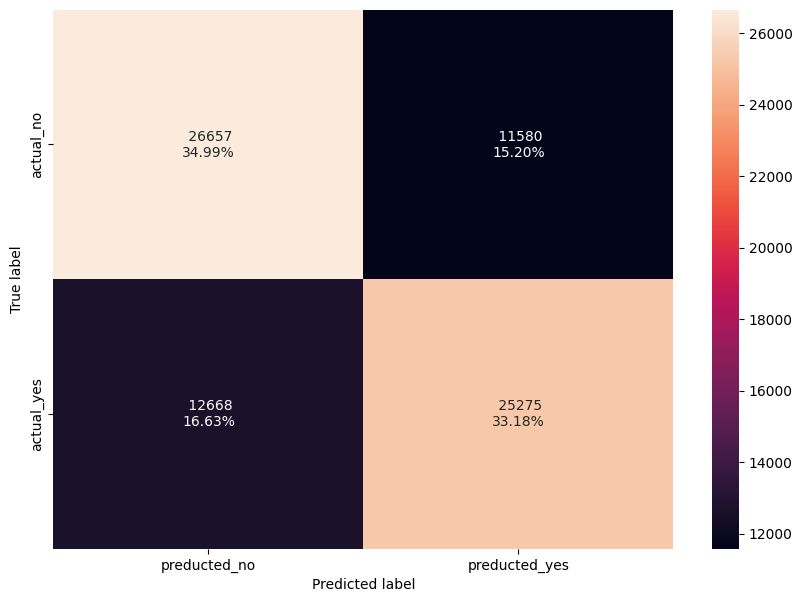

In [439]:
pred_test = logreg.predict(X_test)
make_confusion_matrix(Y_test,pred_test)

In [440]:
# Import the necessary modules
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Print the accuracy on train and test data
print ("Accuracy on train data:",accuracy_score(Y_train,pred_train))
print ("Accuracy on test data:",accuracy_score(Y_test,pred_test))

# Print the recall on train and test data
print ("\nRecall on train data:",recall_score(Y_train,pred_train))
print ("Recall on test data:",recall_score(Y_test,pred_test))

# Print the precision on train and test data
print ("\nPrecission on train data:",precision_score(Y_train,pred_train))
print ("Precission on test data:",precision_score(Y_test,pred_test))

# Print the F1 score on train and test data
print ("\nF1 score on train data:",f1_score(Y_train,pred_train))
print ("F1 score on test data:",f1_score(Y_test,pred_test))

Accuracy on train data: 0.6815338224042486
Accuracy on test data: 0.681701233919664

Recall on train data: 0.6977425644377825
Recall on test data: 0.6971519732196564

Precission on train data: 0.675143676594074
Precission on test data: 0.6778639542275906

F1 score on train data: 0.6862571219544639
F1 score on test data: 0.6873726824991621


# Observation

* We can see that model is good perform and we got train and test both the  recall and precision is good
   * recall (train, test) respectively 69.77, 69.71
   * precision (train , test) respectively 67.51,67.78

## **Plot ROC_AUC_Curve**

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


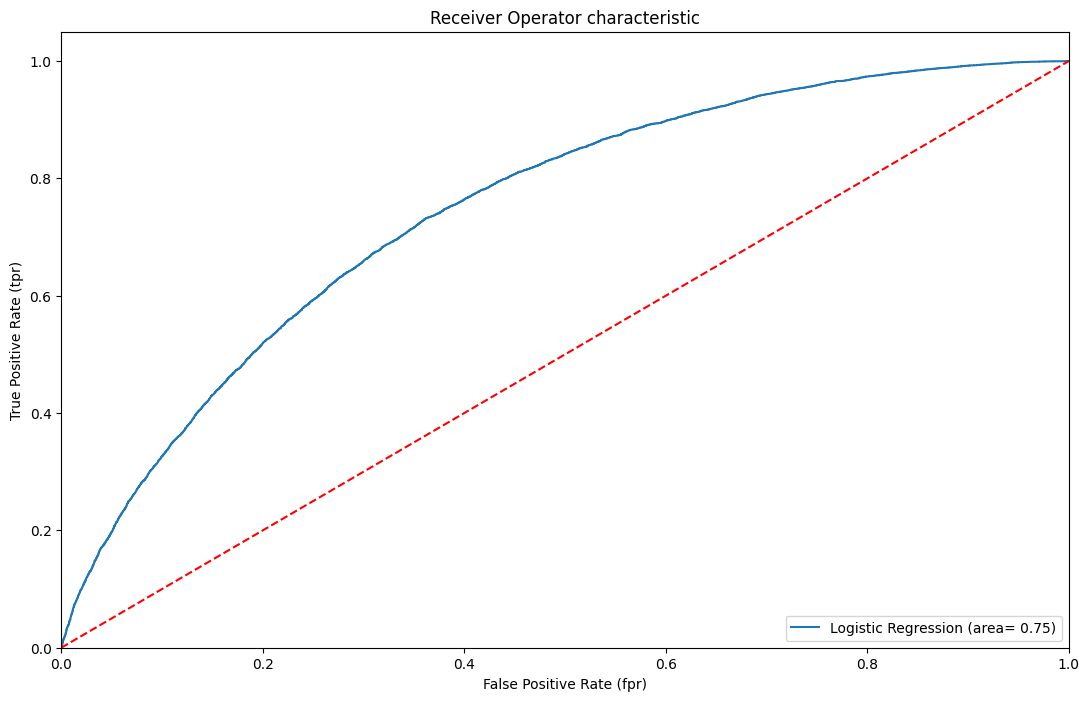

In [441]:
!pip install sklearn
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Plot ROC_AUC_Curve
logit_roc_auc = roc_auc_score(Y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area= %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title('Receiver Operator characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Observation
* we can see that ROC-AUC curve area is 0.75


## **CuttOff**

In [442]:
train_pred_prob = logreg.predict_proba(X_train)[:,1]

train_pred_prob

array([0.71828162, 0.32185558, 0.20869965, ..., 0.61196323, 0.29351372,
       0.75768913])

In [443]:
import pandas as pd

# ... (existing code)

for cutoff in Cutoff_Prob:
    Y_train["pred_y"] = (train_pred_prob > cutoff).astype("int64")
    TP = ((Y_train["pred_y"] == 1) & (Y_train["Fraud"] == 1)).sum()
    FN = ((Y_train["pred_y"] == 0) & (Y_train["Fraud"] == 1)).sum()
    TN = ((Y_train["pred_y"] == 0) & (Y_train["Fraud"] == 0)).sum()
    FP = ((Y_train["pred_y"] == 1) & (Y_train["Fraud"] == 0)).sum()
    P = TP + FN
    N = TN + FP

    temp_data = {
        "Cutoff_Prob": cutoff,
        "TP": TP,
        "FN": FN,
        "TN": TN,
        "FP": FP,
        "P": P,
        "N": N
    }

    # Use concat() instead of append()
    cutoff_data = pd.concat([cutoff_data, pd.DataFrame(temp_data, index=[0])], ignore_index=True)


# Dropping the pred_y column from y_train data
Y_train.drop("pred_y", axis=1,inplace=True)


In [445]:
# Calculate Sensitivity (Sn)
cutoff_data['Sn'] = cutoff_data["TP"] / cutoff_data["P"]

# Calculate Specificity (Sp)
cutoff_data['Sp'] = cutoff_data["TN"] / cutoff_data["N"]

# Calculate Distance (Dist)
cutoff_data['Dist'] = ((1 - cutoff_data["Sn"])**2 + (1 - cutoff_data["Sp"])**2)**0.5

# Calculate Kolmogorov-Smirnov (KS)
cutoff_data['KS'] = (cutoff_data["TP"] / cutoff_data["P"] - cutoff_data["FP"] / cutoff_data["N"]).abs()

# Calculate Recall (Re)
cutoff_data['Re'] = cutoff_data["TP"] / cutoff_data["P"]

# Calculate Precision (Pr)
cutoff_data['Pr'] = cutoff_data.apply(lambda row: row["TP"] / (row["TP"] + row["FP"]) if (row["TP"] + row["FP"]) > 0 else 0, axis=1)

# Calculate True Positive Rate (tpr)
cutoff_data['tpr'] = cutoff_data["Re"]

# Calculate False Positive Rate (fpr)
cutoff_data['fpr'] = 1 - cutoff_data["Sp"]

# Calculate F1 Score (f1)
cutoff_data['f1'] = cutoff_data.apply(lambda row: 2 * (row["Pr"] * row["Re"]) / (row["Pr"] + row["Re"]) if (row["Pr"] + row["Re"]) > 0 else 0, axis=1)

cutoff_data.head()


,Cutoff_Prob,TP,FN,TN,FP,P,N,Sn,Sp,Dist,KS,Re,Pr,tpr,fpr,f1
0,0.00,88729,0,0,89023,88729,89023,1.0,0.0,1.0,0.0,1.0,0.499173,1.0,1.0,0.665931
1,0.01,88726,3,73,88950,88729,89023,0.999966,0.00082,0.99918,0.000786,0.999966,0.499370,0.999966,0.99918,0.666099
2,0.02,88721,8,313,88710,88729,89023,0.99991,0.003516,0.996484,0.003426,0.99991,0.500031,0.99991,0.996484,0.666674
3,0.03,88709,20,695,88328,88729,89023,0.999775,0.007807,0.992193,0.007582,0.999775,0.501076,0.999775,0.992193,0.667572
4,0.04,88692,37,1250,87773,88729,89023,0.999583,0.014041,0.985959,0.013624,0.999583,0.502604,0.999583,0.985959,0.668884


In [446]:
dist_cutoff = cutoff_data.loc[np.argmin(cutoff_data["Dist"]),"Cutoff_Prob"]
ks_cutoff = cutoff_data.loc[np.argmax(cutoff_data["KS"]),"Cutoff_Prob"]
f1_cutoff = cutoff_data.loc[np.argmax(cutoff_data["f1"]),"Cutoff_Prob"]

In [447]:
print ("The dist cutoff determined is:", dist_cutoff)
print ("The KS cutoff determined is:", ks_cutoff)
print ("The f1 cutoff determined is:", f1_cutoff)

The dist cutoff determined is: 0.5
The KS cutoff determined is: 0.46
The f1 cutoff determined is: 0.34


In [448]:
cutoffs = [dist_cutoff,ks_cutoff,f1_cutoff]

for cutoff in cutoffs:
  Y_pred_train = (logreg.predict_proba(x_train)[:,1] > cutoff).astype(int)
  Y_pred_test = (logreg.predict_proba(x_test)[:,1] > cutoff).astype(int)

  print("Using the cutoff value as :",cutoff)
  print('Accuracy on train data :',accuracy_score(Y_train,pred_train))
  print('Accuracy on test data :',accuracy_score(Y_test,pred_test))
  print('Recall on train data :',recall_score(Y_train,pred_train))
  print('Recall on train data :',recall_score(Y_test,pred_test))
  print('Precission on train data :',precision_score(Y_train,pred_train))
  print('Precision on test data :',precision_score(Y_test,pred_test))
  print('f1 score on train data :',f1_score(Y_train,pred_train))
  print('f1 score on test data :',f1_score(Y_test,pred_test))
  print("\n")

Using the cutoff value as : 0.5
Accuracy on train data : 0.6815338224042486
Accuracy on test data : 0.681701233919664
Recall on train data : 0.6977425644377825
Recall on train data : 0.6971519732196564
Precission on train data : 0.675143676594074
Precision on test data : 0.6778639542275906
f1 score on train data : 0.6862571219544639
f1 score on test data : 0.6873726824991621


Using the cutoff value as : 0.46
Accuracy on train data : 0.6815338224042486
Accuracy on test data : 0.681701233919664
Recall on train data : 0.6977425644377825
Recall on train data : 0.6971519732196564
Precission on train data : 0.675143676594074
Precision on test data : 0.6778639542275906
f1 score on train data : 0.6862571219544639
f1 score on test data : 0.6873726824991621


Using the cutoff value as : 0.34
Accuracy on train data : 0.6815338224042486
Accuracy on test data : 0.681701233919664
Recall on train data : 0.6977425644377825
Recall on train data : 0.6971519732196564
Precission on train data : 0.6751436

# Observation
* we can see that all the cut-off recall and precision is good

# **Model Building Through Decision Tree**

In [449]:
X_train = X_train.astype(int)
X_test = X_test.astype(int)
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

In [450]:
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    Creates a confusion matrix to visualize the performance of a classification model.

    Args:
        model: The trained classifier model.
        y_actual: The ground truth labels.
        labels: The list of labels to use in the confusion matrix (optional).

    Returns:
        A pandas DataFrame representing the confusion matrix.
    """

    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])

    df_cm = pd.DataFrame(cm, index=["Actual - No", "Actual - Yes"], columns=["Predicted No", "Predicted Yes"])

    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')



In [451]:
# Function to cal recall score

def get_recall_score(model):
  '''
  model: classifier to predict values of X

  '''

  pred_train = model.predict(X_train)  # Predict on training set
  pred_test = model.predict(X_test)  # Predict on test set

  print("Recall on training set: ", metrics.recall_score(Y_train, pred_train))
  print("Recall on test set: ", metrics.recall_score(Y_test, pred_test))

In [452]:
from sklearn import metrics

def get_precision_score(model):
  '''
  model: classifier to predict values of X

  '''

  pred_train = model.predict(X_train)  # Predict on training set
  pred_test = model.predict(Y_test)  # Predict on test set

  print("Precision on training set: ", metrics.precision_score(Y_train, pred_train))
  print("Precision on test set: ", metrics.precision_score(Y_test,pred_test))

In [453]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import compute_class_weight
model=DecisionTreeClassifier(criterion='gini',class_weight={0:0.70,1:0.30},random_state=1)

In [454]:
print(model.class_weight)

{0: 0.7, 1: 0.3}


In [455]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.7, 1: 0.3}, random_state=1)

In [456]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import compute_class_weight
model=DecisionTreeClassifier(criterion='gini',class_weight={0:0.70,1:0.30},random_state=1)

In [457]:
print(model.class_weight)

{0: 0.7, 1: 0.3}


In [458]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.7, 1: 0.3}, random_state=1)

In [459]:
from sklearn import metrics
from sklearn import tree


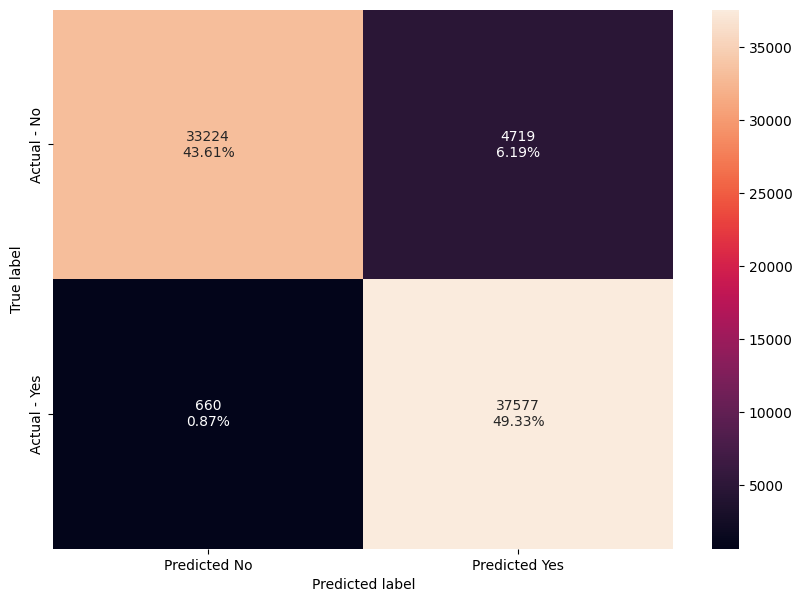

In [460]:
make_confusion_matrix(model,Y_test)

In [461]:
get_recall_score(model)

Recall on training set:  0.9974303778922337
Recall on test set:  0.9827392316342809


In [462]:
#features_names=x.columns
#plt.figure(figsize=(20,30))
#out=tree.plot_tree(model,feature_names=features_names,filled=True,fontsize=9,node_ids=False,class_names=None)
#for o in out:
  #arrow=o.arrow_patch
  #if arrow is not None:
    #arrow.set_edgecolor("black")
    #arrow.set_linewidth(1)
#plt.show()

In [463]:
features_names = x.columns
if isinstance(features_names, pd.Index):
    feature_names = features_names.tolist()
print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- webSessWebBrowser_Mobile <= 0.50
|   |--- V5CF_below_25000 <= 0.50
|   |   |--- MainEntityUse_below_300 <= 0.50
|   |   |   |--- AddressUpdateDate_day_last_fifteen_days <= 0.50
|   |   |   |   |--- V4CF_below_500 <= 0.50
|   |   |   |   |   |--- ConnectionSpeed_Not_Identify_Connectionspeed <= 0.50
|   |   |   |   |   |   |--- AddressUpdateDate_minute_last_thirty_minute <= 0.50
|   |   |   |   |   |   |   |--- EmailUpdateDate_minute_last_thirty_minute <= 0.50
|   |   |   |   |   |   |   |   |--- webSessOS_Mobile <= 0.50
|   |   |   |   |   |   |   |   |   |--- AddressUpdateDate_month_last_six_month <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- channel_SOA <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 19
|   |   |   |   |   |   |   |   |   |   |--- channel_SOA >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 19
|   |   |   |   |   |   |   |   |   |--- AddressUpdateDate_month_last_six_month >  0.50
|   |   

In [464]:
print(pd.DataFrame(model.feature_importances_,columns=["Imp"],
                   index=x_train.columns).sort_values(by="Imp",ascending=False))

                                                    Imp
V1CF                                           0.061521
TransactionDateTime_hour_last_twelve_hour      0.054465
ConnectionOrg_Other                            0.049780
webSessOS_Windows                              0.047065
EmailUpdateDate_month_last_six_month           0.045772
EmailUpdateDate_year_before_2010               0.045562
EmailUpdateDate_minute_last_thirty_minute      0.045542
EmailUpdateDate_hour_last_twelve_hour          0.045334
TransactionDateTime_minute_last_thirty_minute  0.045115
channel_SOA                                    0.043938
AddressUpdateDate_month_last_six_month         0.042555
AreaCode_below_500                             0.042044
TransactionDateTime_day_last_fifteen_days      0.041643
AddressUpdateDate_hour_last_twelve_hour        0.040324
AddressUpdateDate_minute_last_thirty_minute    0.039182
V2CF_below_90                                  0.037399
EmailUpdateDate_day_last_fifteen_days          0

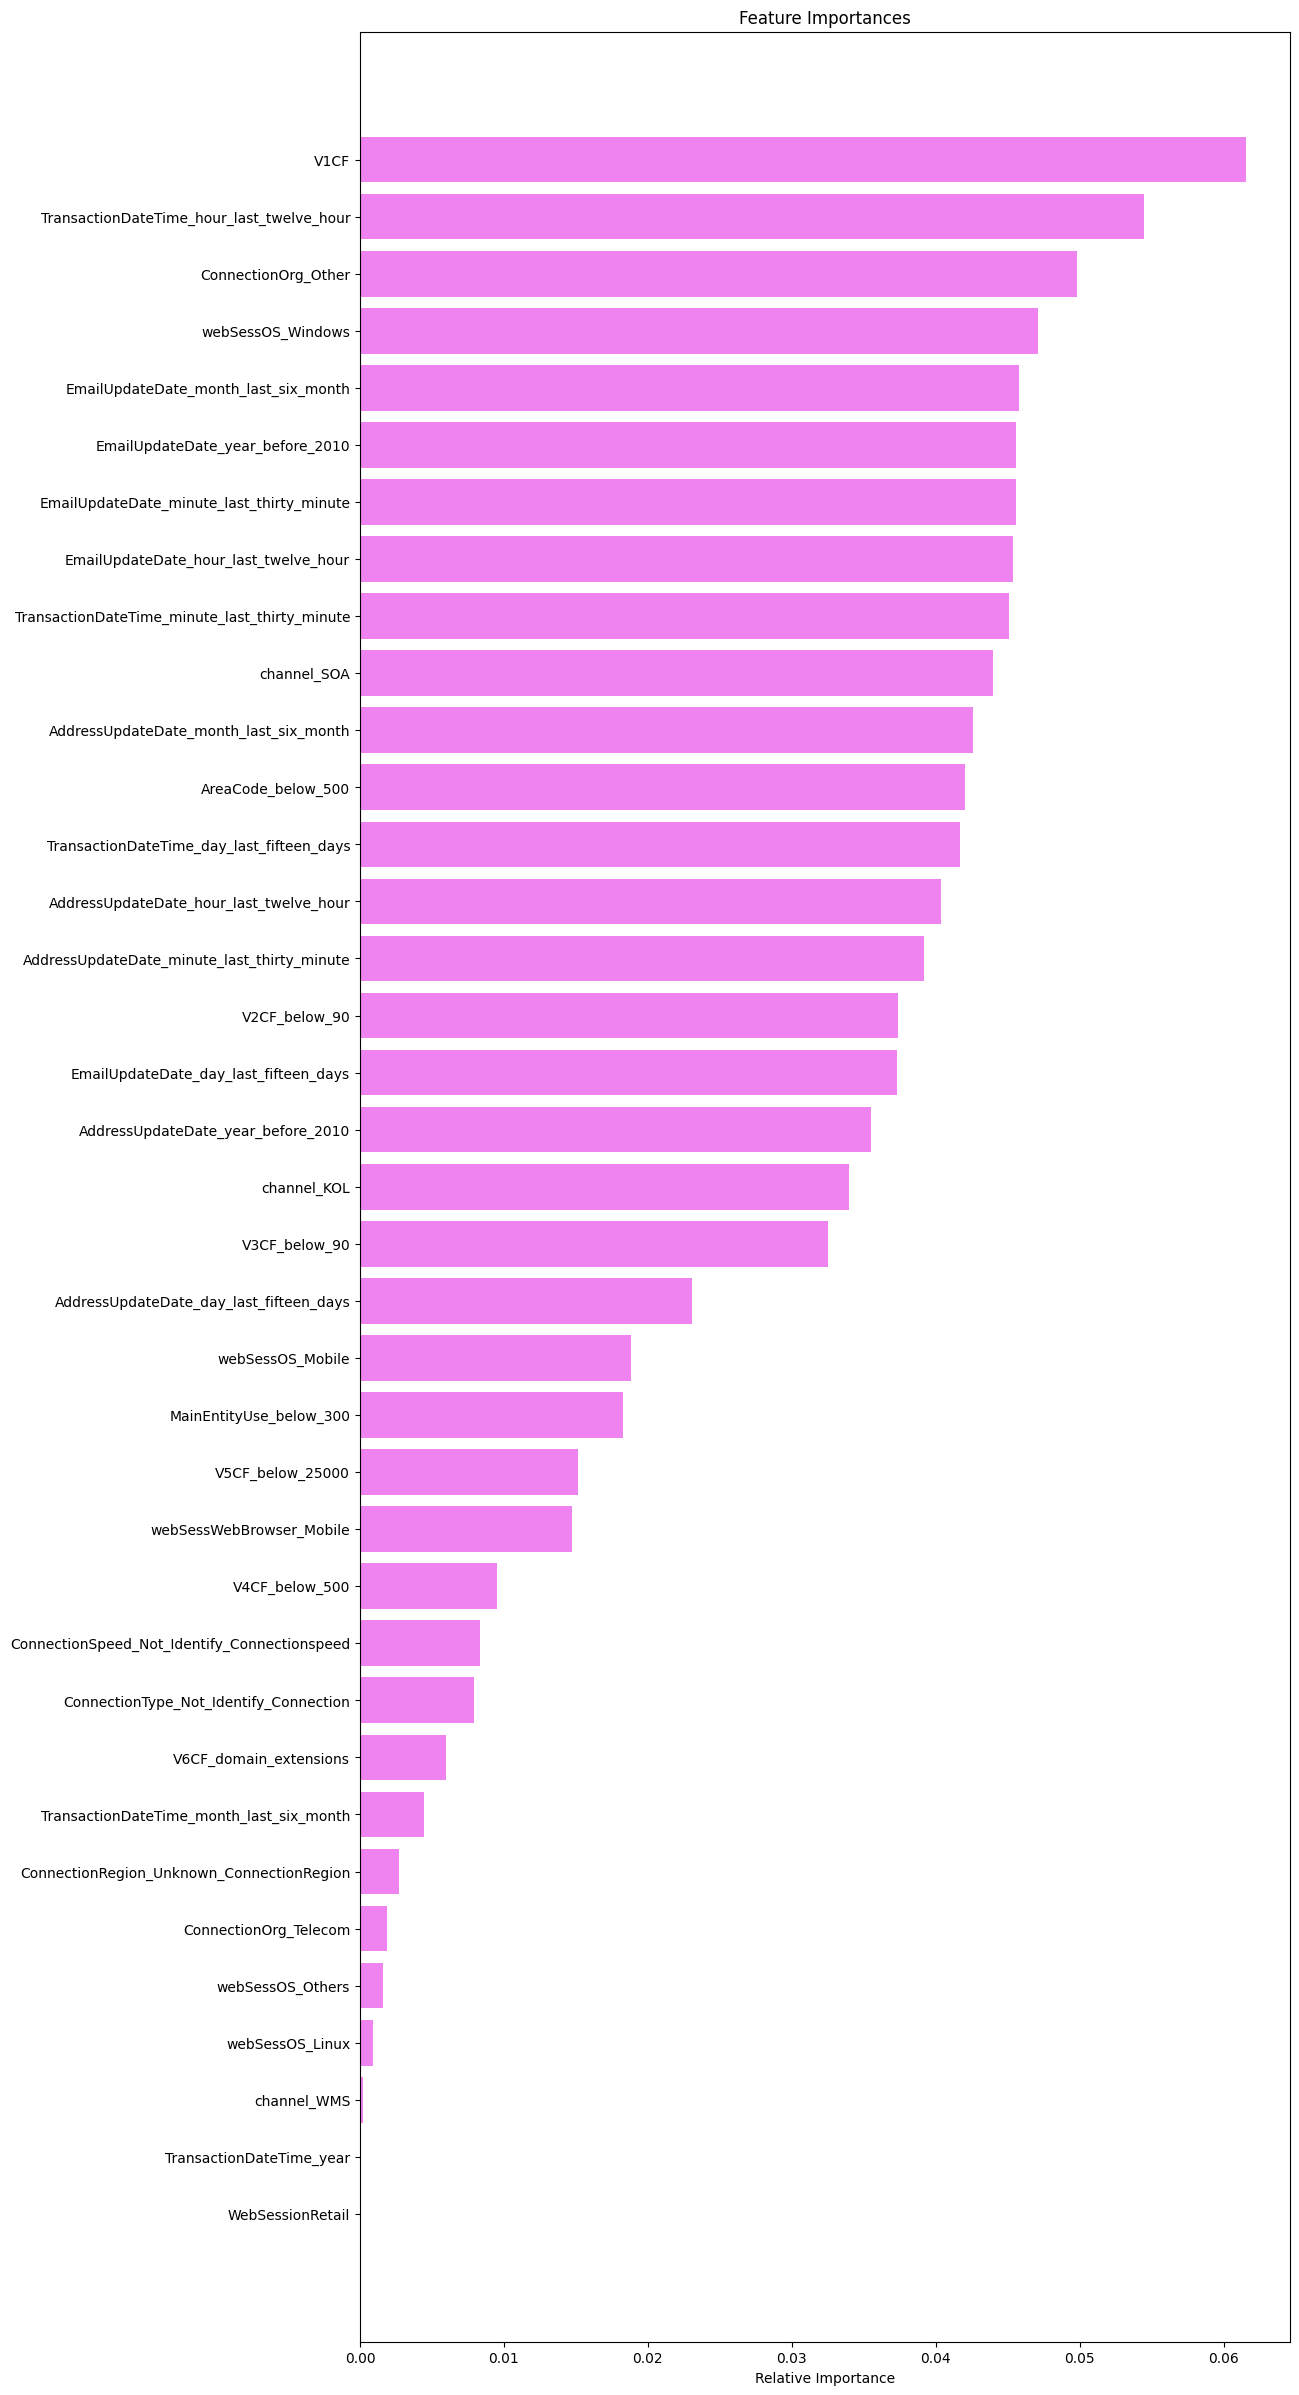

In [465]:
import numpy as np
importances=model.feature_importances_
indices=np.argsort(importances)
plt.figure(figsize=(12,30))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices],color='violet',align='center')
plt.yticks(range(len(indices)),[feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Observation
* After running the decision tree classifier algorithm, we obtained recall scores of 99.77% and 98.88% for the training and testing datasets, respectively.
* we can see that important feature is V1CF, AreaCode_below_500, wession_windows and so on........

# **Pre-Pruning**

In [489]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import numpy as np

estimator = DecisionTreeClassifier(random_state=1, class_weight={0: .22, 1: .78})
parameters = {
    "max_depth": [3, 4, 5],
    "criterion":["gini","entropy"],
    "splitter":["best","random"],
    "min_impurity_decrease":[0.00001,0.000001],
    "max_features":['log2','sqrt']
}
scorer = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

estimator = grid_obj.best_estimator_
estimator.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.22, 1: 0.78}, criterion='entropy',
                       max_depth=3, max_features='log2',
                       min_impurity_decrease=1e-05, random_state=1)

In [490]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
# Perform cross-validation
cv_scores = cross_val_score(estimator, x, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.97120129 0.97116304 0.97120018 0.97120018 0.97120018]
Mean CV accuracy: 0.971192975106519


In [491]:
get_recall_score(estimator)

Recall on training set:  1.0
Recall on test set:  1.0


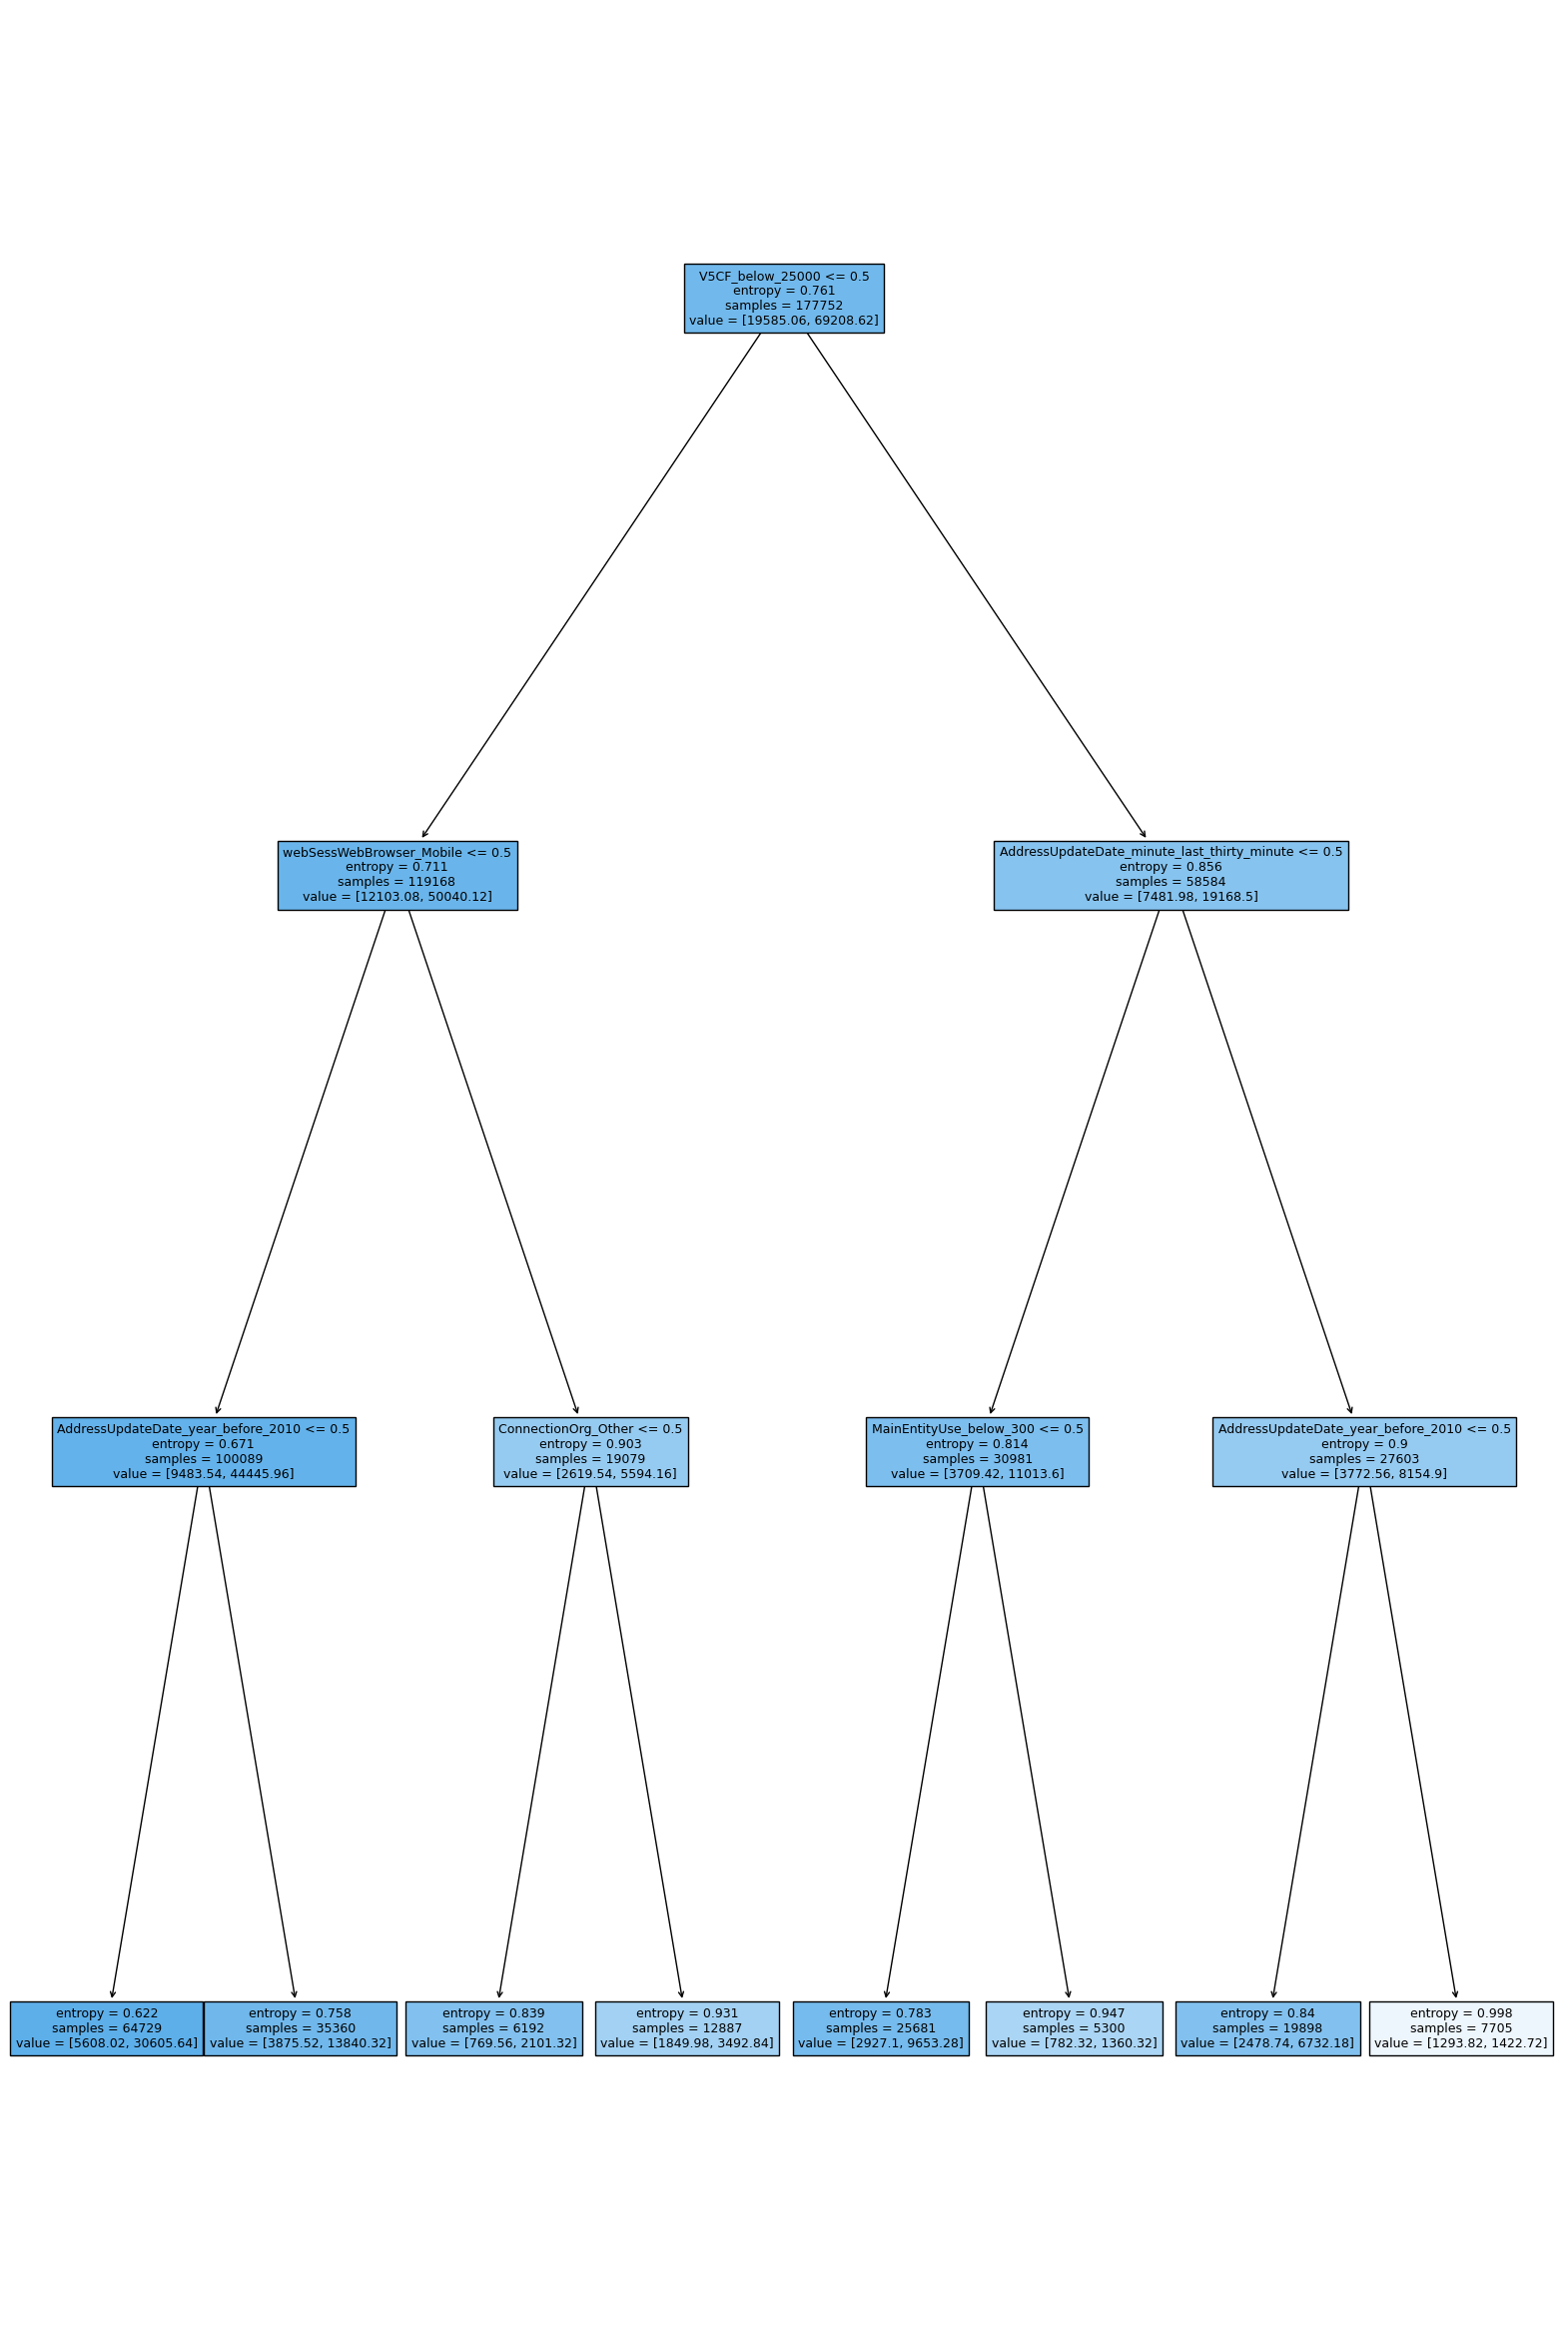

In [492]:
features_names=x.columns
plt.figure(figsize=(20,30))
out=tree.plot_tree(estimator,feature_names=features_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
  arrow=o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor("black")
    arrow.set_linewidth(1)
plt.show()

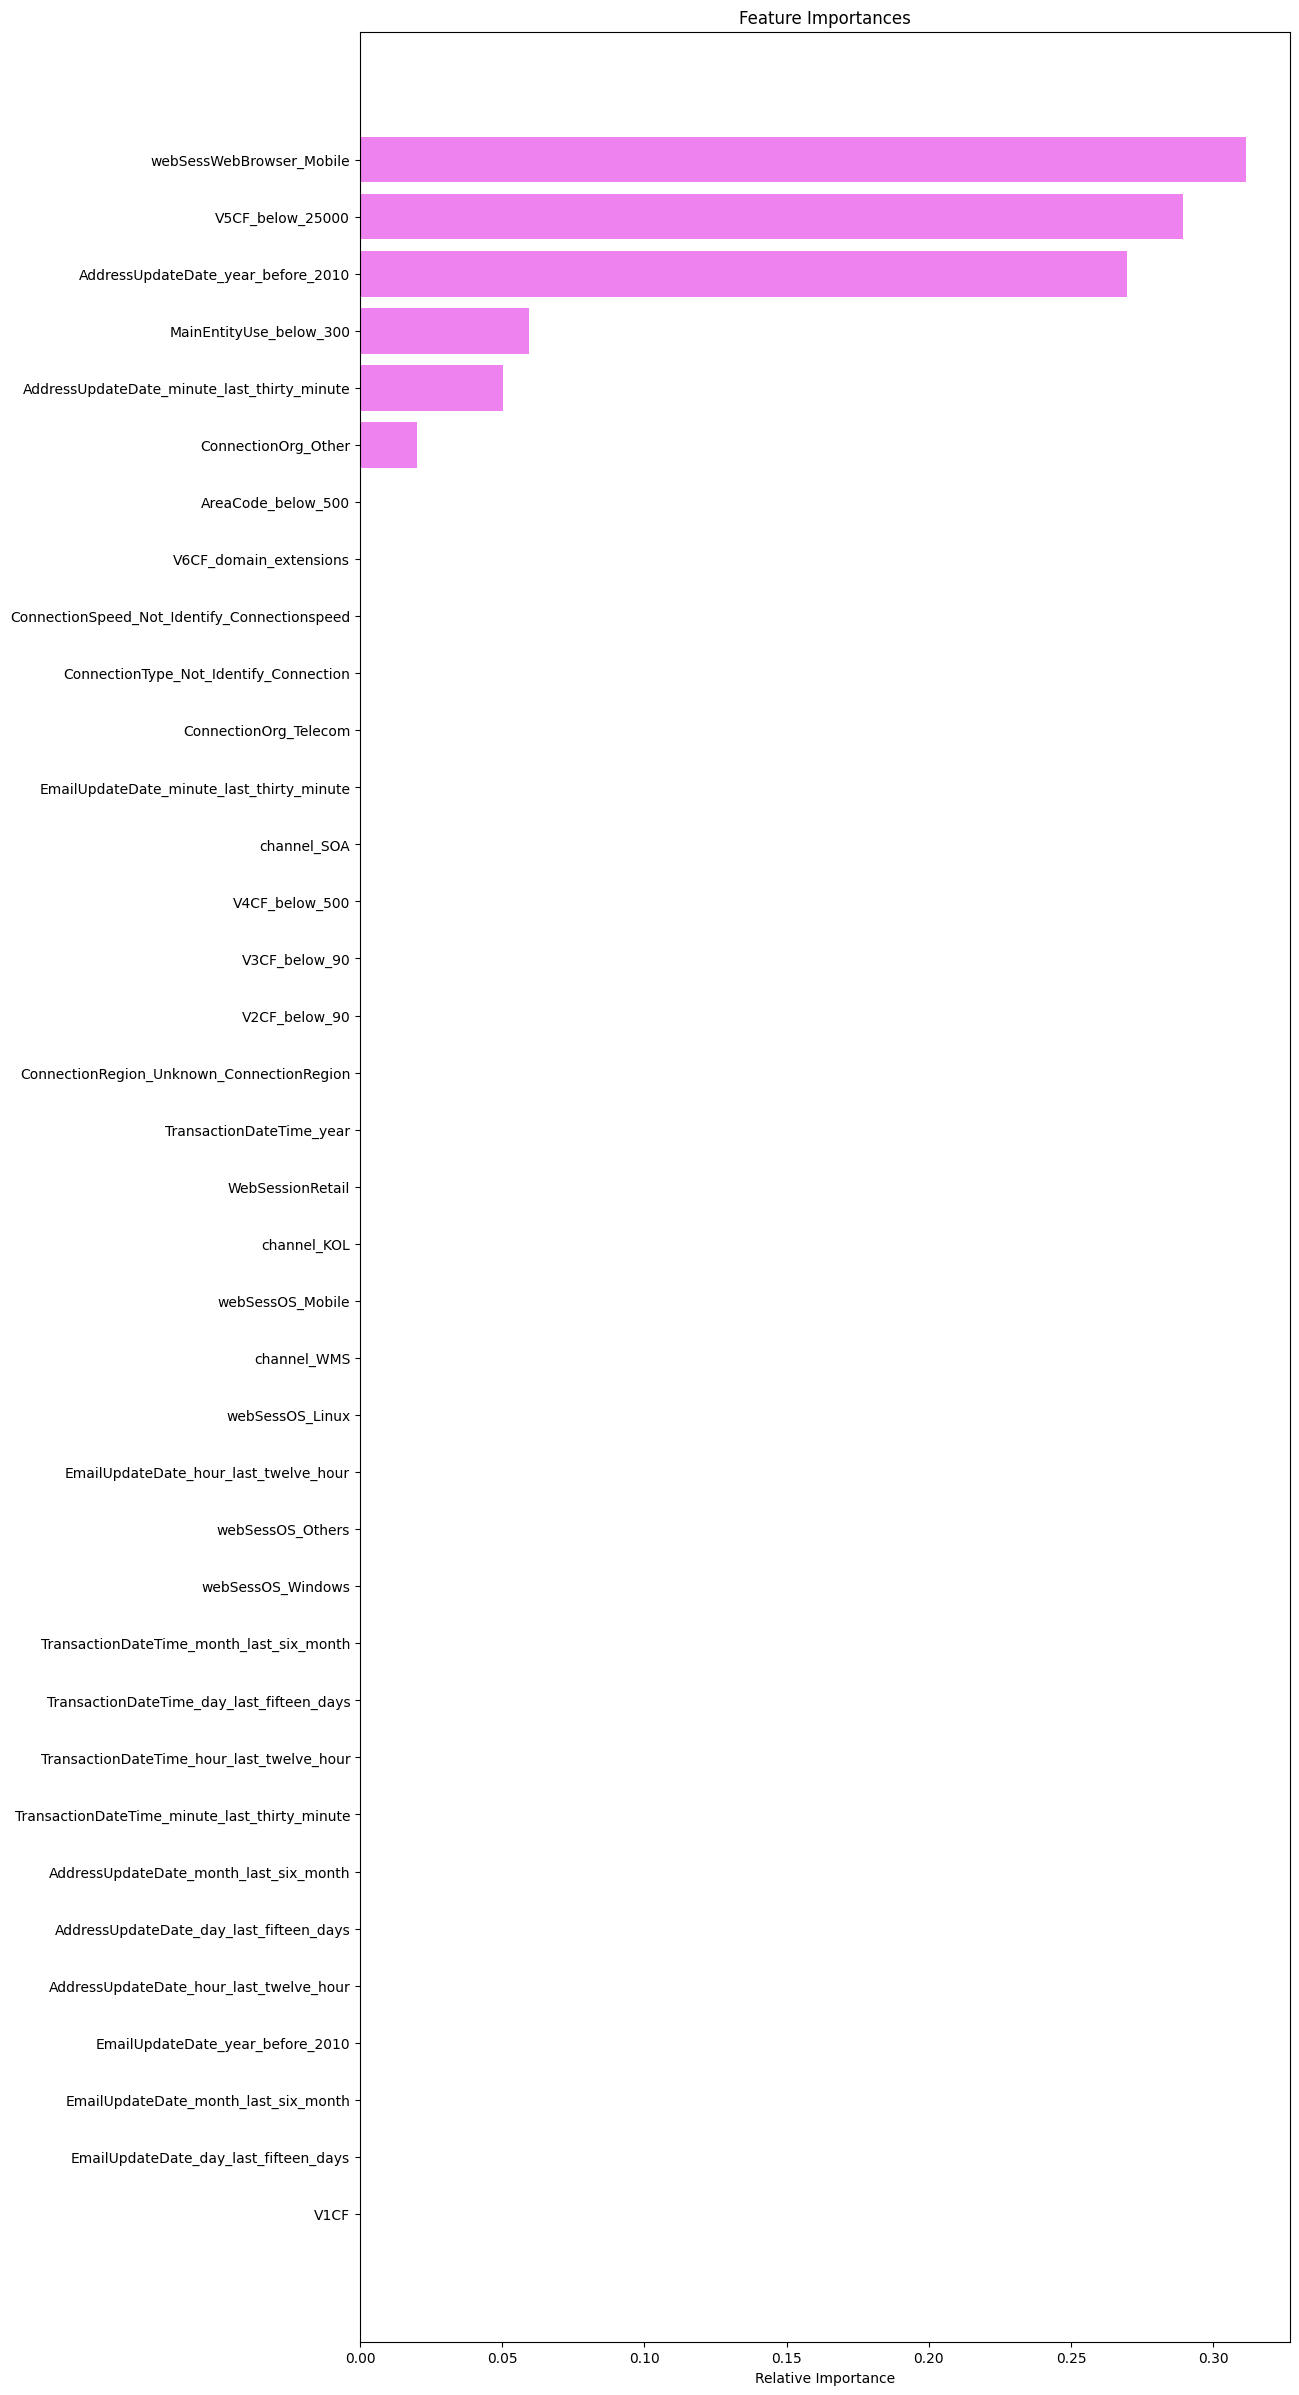

In [493]:
import numpy as np
importances=estimator.feature_importances_
indices=np.argsort(importances)
plt.figure(figsize=(12,30))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices],color='violet',align='center')
plt.yticks(range(len(indices)),[feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Observation
* After the Pre-pruning the model, we observe that recall score of 99.79% and 99.81% on traning and testing dataset.
* After the pre-pruning the model, we observe that transaction datetime_month_last_six_month is only important feature.
* and we got accuracy 97.87% after cross validation.

# **Post-Pruning**

In [494]:
# Standardize the features (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a logistic regression classifier with L2 regularization
clf = LogisticRegression(penalty='l2', solver='lbfgs', C=1.0, random_state=42)
clf.fit(X_train_scaled, Y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7023890784982935


In [495]:
clf = DecisionTreeClassifier(random_state=1,class_weight={0:0.17,1:0.83})
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas,path.impurities



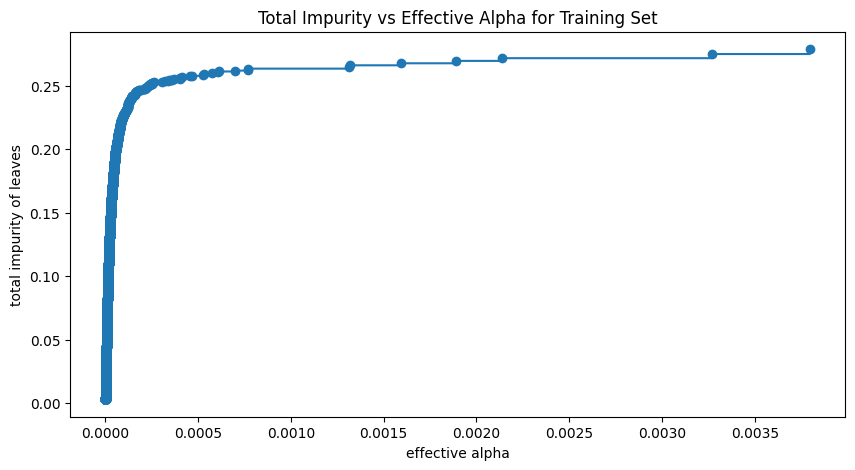

In [496]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle='steps-post')
ax.set_xlabel('effective alpha')
ax.set_ylabel('total impurity of leaves')
ax.set_title('Total Impurity vs Effective Alpha for Training Set')
plt.show()

# Observation
* We observe that the model's impurity decreases as the effective alpha increases.
* We also observe that the model's performance becomes more impure in the range between 0.00 to 0.0002.

In [497]:
clfs = []

clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.17, 1: 0.83}, ccp_alpha=0.01)
clf.fit(x_train, y_train)
clfs.append(clf)
print("Number of nodes in the last tree is {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is 1 with ccp_alpha: 0.0038981446563010613


In [476]:
print(x.shape, y.shape)

(130732, 37) (130732, 1)


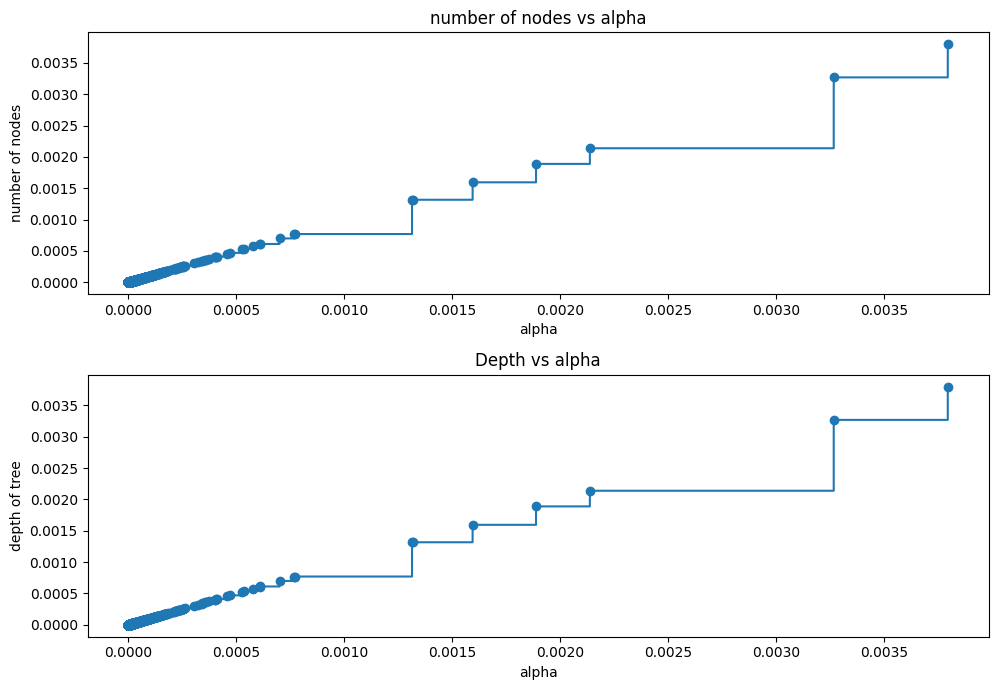

In [498]:
import matplotlib.pyplot as plt

# Remove the last classifier and its corresponding alpha
clf = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Calculate node counts and depth for each classifier
node_counts = ccp_alphas                 #[clf.tree_.node_count for clf in clf]
depth =  ccp_alphas                               #[clf.tree_.max_depth for clf in clf]

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle='steps-post')
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("number of nodes vs alpha")

ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")

fig.tight_layout()
plt.show()

# Observation
* We observe that both the Depth vs. alpha and Number of nodes vs. alpha plots exhibit similar trends, indicating that the impurity of the model remains consistent.
* The model's performance decreases as alpha increases, suggesting that higher alpha values lead to a less accurate model.
* The model exhibits increased impurity within the range of 0.0000 to 0.0006, indicating a decline in performance during this interval.

In [478]:
recall_train=[]
for clf in clfs:
  pred_train3=clf.predict(X_train)
  values_train=metrics.recall_score(Y_train,pred_train3)
  recall_train.append(values_train)

In [479]:
recall_test=[]
for clf in clfs:
  pred_test3=clf.predict(X_test)
  values_test=metrics.recall_score(Y_test,pred_test3)
  recall_test.append(values_test)

In [480]:
train_scores=[clf.score(X_train,Y_train) for clf in clfs]
test_score=[clf.score(X_test,Y_test)for clf in clfs]

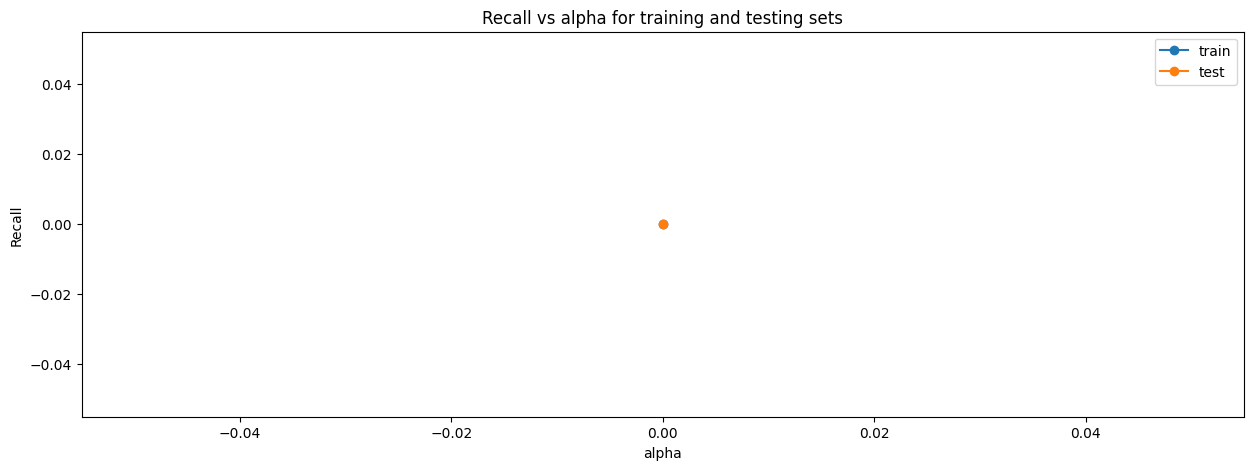

In [481]:

# Truncate or slice arrays to match the length of the shortest array
min_length = min(len(ccp_alphas), len(recall_train), len(recall_test))
ccp_alphas = ccp_alphas[:min_length]
recall_train = recall_train[:min_length]
recall_test = recall_test[:min_length]

# Plotting
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, recall_test, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [499]:
#creating the model where we get highesr train and test recall
index_best_model=np.argmax(recall_test)
best_model=clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 0.17, 1: 0.83},
                       random_state=1)


In [500]:
best_model.fit(X_train ,Y_train)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 0.17, 1: 0.83},
                       random_state=1)

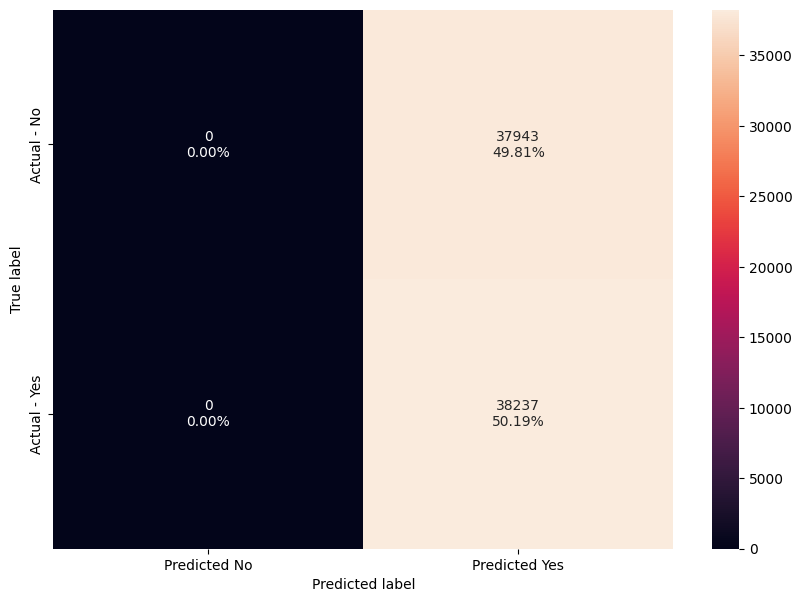

In [502]:
from sklearn.metrics import confusion_matrix
make_confusion_matrix(best_model,Y_test)

In [503]:
get_recall_score(best_model)

Recall on training set:  1.0
Recall on test set:  1.0


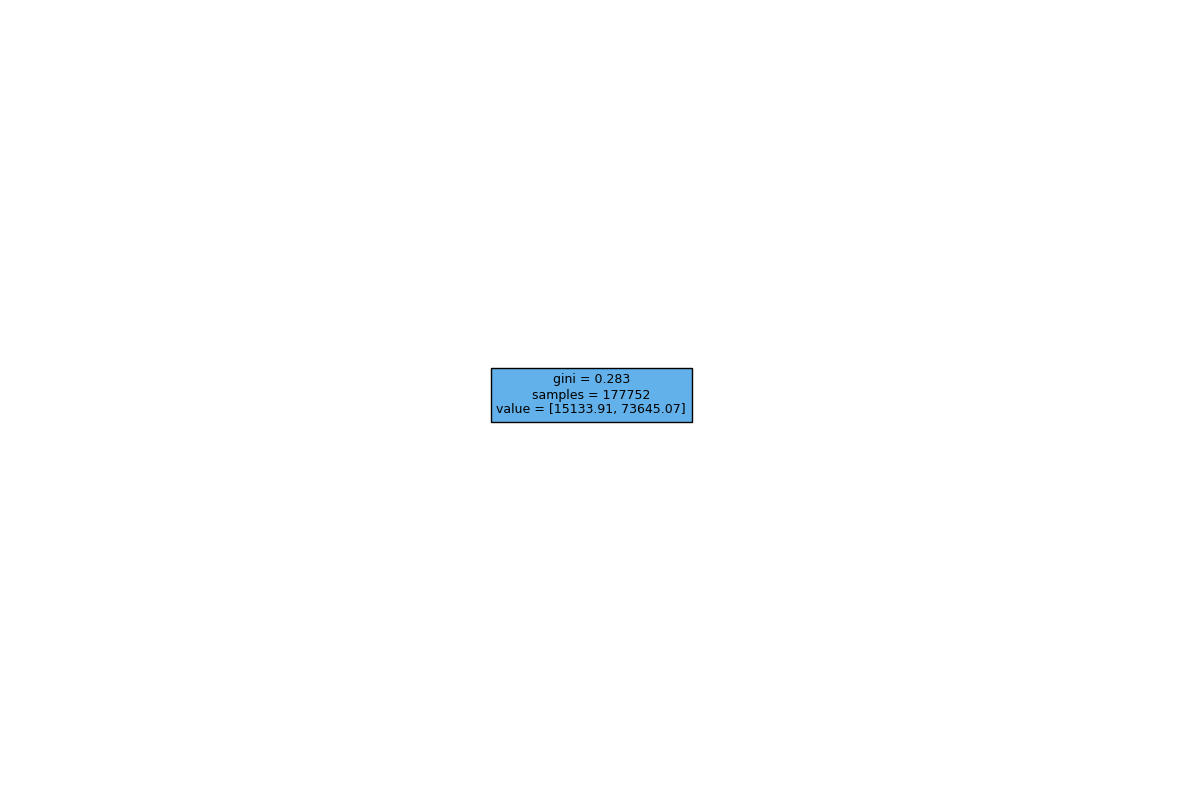

In [504]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(best_model,feature_names=features_names, filled=True, fontsize=9, node_ids=False, class_names=None,)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
    plt.show()

In [505]:
best_model2=DecisionTreeClassifier(ccp_alpha=0.008,class_weight={0:0.17,1:0.83},random_state=1)
best_model2.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.008, class_weight={0: 0.17, 1: 0.83},
                       random_state=1)

In [506]:
#make_confusion_matrix(best_model2,Y_test)

In [507]:
get_recall_score(best_model2)

Recall on training set:  1.0
Recall on test set:  1.0


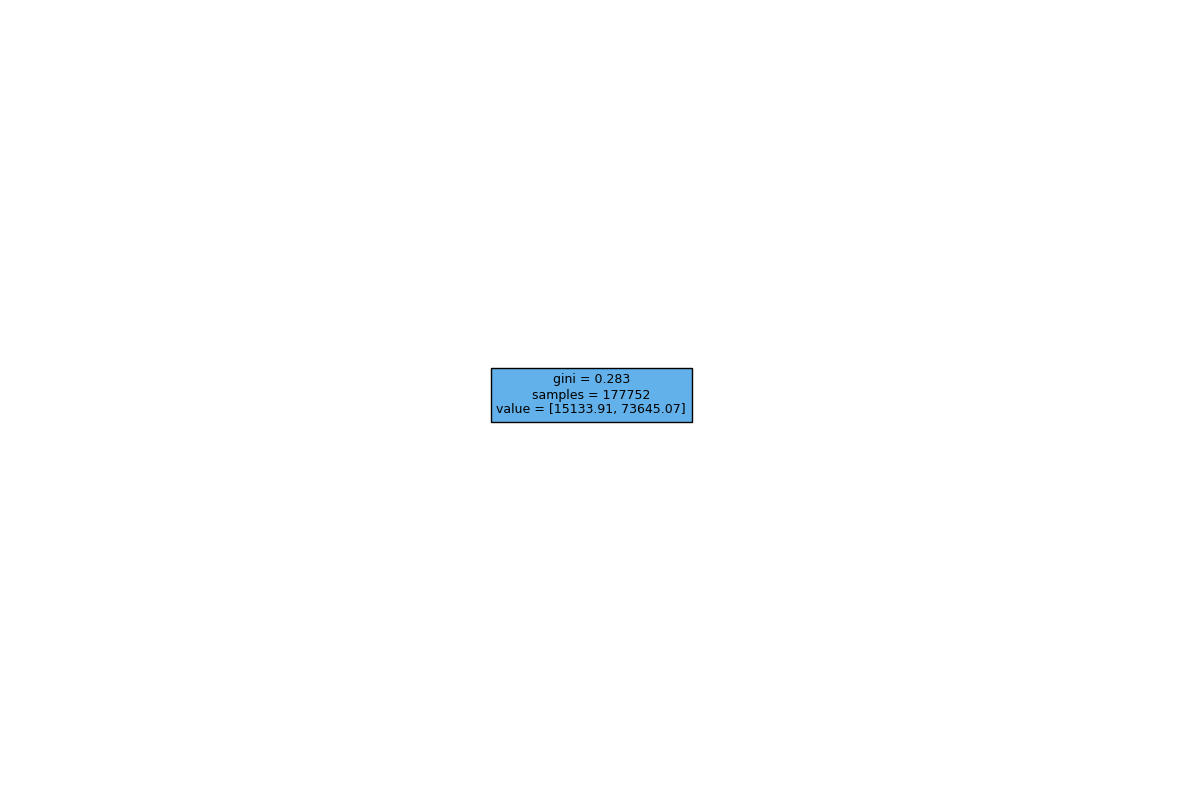

In [508]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(best_model2,feature_names=features_names, filled=True, fontsize=9, node_ids=False, class_names=None,)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
    plt.show()

In [509]:
import pandas as pd

comparison_frame = pd.DataFrame({
    "Model": ['Decision Tree Classifier', 'Decision tree with pre-pruning', 'Decision tree with post-pruning'],
    "Train_recall": [99.75, 99.78, 100.00],
    "Test_recall": [98.31, 99.80, 100.00]
})

print(comparison_frame)

                             Model  Train_recall  Test_recall
0         Decision Tree Classifier         99.75        98.31
1   Decision tree with pre-pruning         99.78        99.80
2  Decision tree with post-pruning        100.00       100.00


# **Bagging Classifier**

In [ ]:
bagging=BaggingClassifier(random_state=1)
bagging.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(random_state=1)

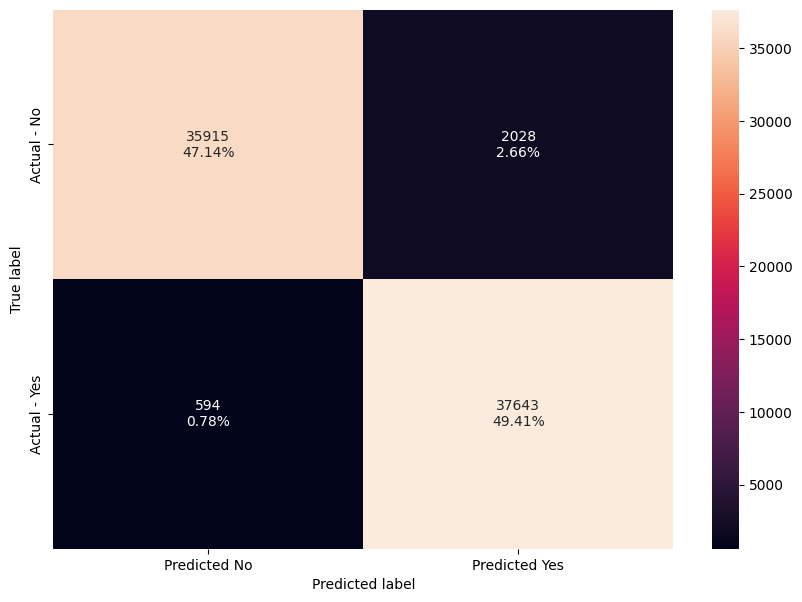

In [ ]:
make_confusion_matrix(bagging,Y_test)

In [ ]:
get_recall_score(bagging)

Recall on training set:  0.9973852968026237
Recall on test set:  0.9844653084708528


In [ ]:
bagging_wt=BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="gini",class_weight={0:0.17,1:0.83},random_state=1),random_state=1)
bagging_wt.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.17,
                                                                      1: 0.83},
                                                        random_state=1),
                  random_state=1)

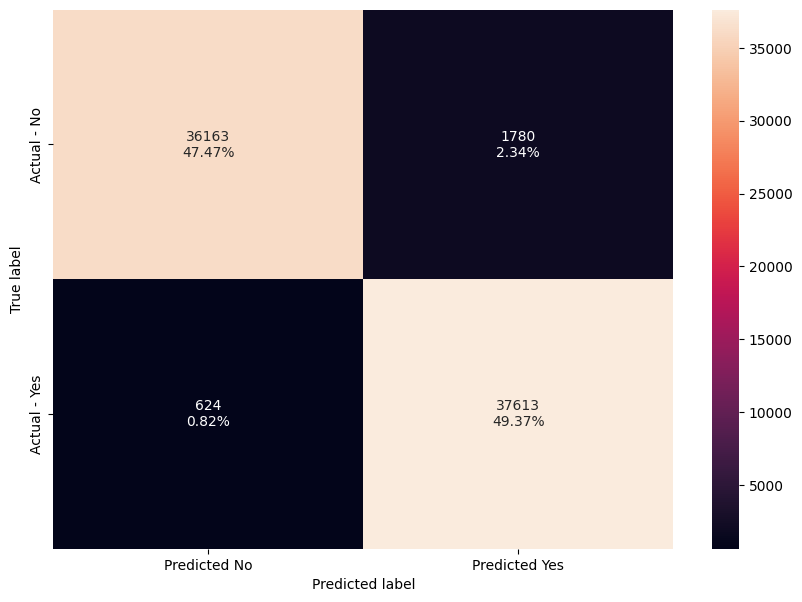

In [ ]:
make_confusion_matrix(bagging_wt,Y_test)

In [ ]:
get_recall_score(bagging_wt)

Recall on training set:  0.9973514859854162
Recall on test set:  0.9836807280905929


# Observataion
* After the running Bagging Classifier Algorithem, we observe that recall score of 99.73% and 98.33% on  training and testing dataset, respectively

# **Random Forest Classifier**

In [ ]:
rf=RandomForestClassifier(random_state=1)
rf.fit(X_train,Y_train)

<ipython-input-197-c3e1304a2be6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


RandomForestClassifier(random_state=1)

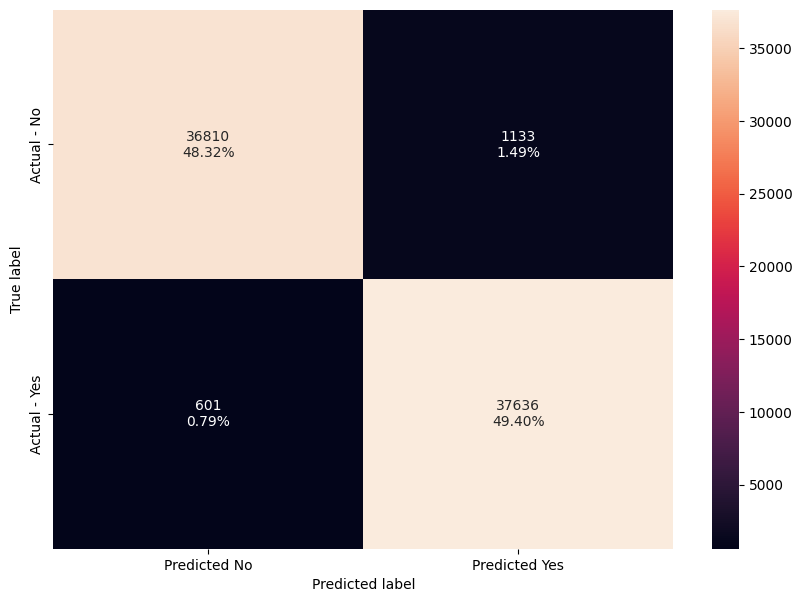

In [ ]:
make_confusion_matrix(rf,Y_test)

In [ ]:
get_recall_score(rf)

Recall on training set:  0.9993801350178634
Recall on test set:  0.9842822397154588


In [ ]:
rf_wt=RandomForestClassifier(class_weight={0:0.4,1:0.6},random_state=1)
rf_wt.fit(X_train,Y_train)

<ipython-input-200-dca1ca006426>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_wt.fit(X_train,Y_train)


RandomForestClassifier(class_weight={0: 0.4, 1: 0.6}, random_state=1)

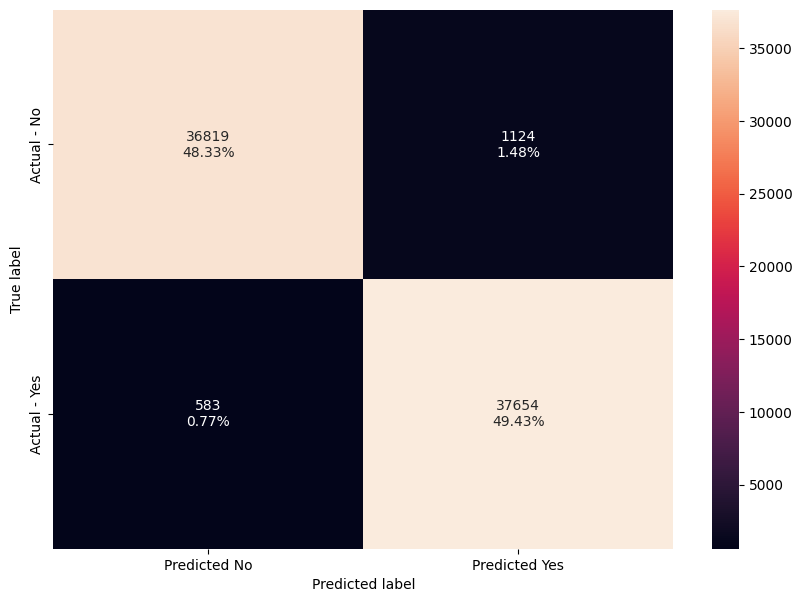

In [ ]:
make_confusion_matrix(rf_wt,Y_test)

In [ ]:
get_recall_score(rf_wt)

Recall on training set:  0.9997295134623404
Recall on test set:  0.9847529879436149


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Choose the type of classifier
rf_estimator = RandomForestClassifier(class_weight={0: 0.4, 1: 0.6},random_state=1)

# Dictionary of parameters and their distributions to sample from
parameter_distribution = {
    'n_estimators': [5, 7, 15, 51, 101],
    'min_samples_leaf': [5, 7, 15, 51, 101],
    'max_features': [0.7, 0.9, 0.8, 1.0],
    'max_samples': [0.7, 0.9, 0,8]
}

# Use RandomizedSearchCV to find the best parameters
randomized_obj = RandomizedSearchCV(rf_estimator, parameter_distribution, n_iter=5, scoring='recall', cv=5, random_state=1)
randomized_obj.fit(X_train, Y_train)

# Get the best estimator
rf_estimator = randomized_obj.best_estimator_

# Display the best parameters
print("Best Parameters:", randomized_obj.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Best Parameters: {'n_estimators': 51, 'min_samples_leaf': 101, 'max_samples': 8, 'max_features': 1.0}


In [ ]:

smote = SMOTE()
X_resample, Y_resample = smote.fit_resample(x, y)
X_trains, X_tests, Y_trains, Y_tests = train_test_split(X_resample, Y_resample, test_size=0.3, random_state=45)

In [ ]:
  # Update the feature names in the model
rf_estimator.feature_names_in_ = X_trains.columns

# Predict again
pred_train = rf_estimator.predict(X_trains)
pred_test = rf_estimator.predict(X_test)

# Calculate the precision score
precision_train = metrics.precision_score(Y_train, pred_train)
precision_test = metrics.precision_score(Y_test, pred_test)

print("Precision on test set: ", precision_train)
print("Precision on test set: ", precision_test)

Precision on test set:  0.4991730050857374
Precision on test set:  0.5019296403255448


# Observation
* The Random Forest classifier achieved better recall scores for both the training and testing datasets, with values of 0.9993 and 0.9842, respectively.
* The Random Forest classifier achieved better recall scores on class weight for both the training and testing datasets, with values of  0.9993 and 0.9847, respectively.
*  The Random Forest classifier achieved better recall scores on class weight for both the training and testing datasets, with values of  0.4991 and 0.5019, respectively.

# **Ada Boost Classifier**

In [ ]:
ab_classifier = AdaBoostClassifier(random_state =1)
ab_classifier.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(random_state=1)

In [ ]:
get_recall_score(ab_classifier)

Recall on training set:  0.7301333273225213
Recall on test set:  0.7313335251196486


In [ ]:
  # Update the feature names in the model
ab_classifier.feature_names_in_ = X_trains.columns

# Predict again
pred_train = ab_classifier.predict(X_trains)
pred_test = rf_estimator.predict(X_test)

# Calculate the precision score
precision_train = metrics.precision_score(Y_train, pred_train)
precision_test = metrics.precision_score(Y_test, pred_test)

print("Precision on train set: ", precision_train)
print("Precision on test set: ", precision_test)

Precision on train set:  0.6894878763429445
Precision on test set:  0.5019296403255448


# Observation
* The Ada Boost classifier achieved better recall scores for both the training and testing datasets, with values of 0.7329 and 0.7329, respectively.  
* The Ada Boost classifier achieved precision scores for both the training and testing datasets, with value of 0.6889 and 0.5019,respectively.

# **Gredian Boosting classifier**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Choose the type of classifier
g_tuned = GradientBoostingClassifier(random_state=1)


# Dictionary of parameters and their distributions to sample from
parameter_distribution = {
     'n_estimators': np.arange(50,200,25),
    'subsample' : [0.7,0.8,0.09,1],
    'max_features': [0.7,0.8,0.9,1],
    'max_depth' : [3,5,7,10]

}

# Use RandomizedSearchCV to find the best parameters
randomized_obj = RandomizedSearchCV(g_tuned, parameter_distribution, n_iter=5, scoring='recall', cv=5, random_state=1)
randomized_obj.fit(X_train, Y_train)

# Get the best estimator
g_tunnned = randomized_obj.best_estimator_

# Display the best parameters
print("Best Parameters:",g_tunnned)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Best Parameters: GradientBoostingClassifier(max_depth=7, max_features=0.9, n_estimators=150,
                           random_state=1, subsample=0.7)


In [ ]:
get_recall_score(g_tunnned)

Recall on training set:  0.8694113536724183
Recall on test set:  0.8617830896775375


In [ ]:
  # Update the feature names in the model
g_tunnned.feature_names_in_ = X_trains.columns

# Predict again
pred_train = g_tunnned.predict(X_trains)
pred_test = g_tunnned.predict(X_test)

# Calculate the precision score
precision_train = metrics.precision_score(Y_train, pred_train)
precision_test = metrics.precision_score(Y_test, pred_test)

print("Precision on train set: ", precision_train)
print("Precision on test set: ", precision_test)

Precision on train set:  0.769631398148428
Precision on test set:  0.7656133828996282


# Observation
* The Gredian Boosting classifier achieved better recall scores for both the training and testing datasets, with values of 0.8723 and 0.8650, respectively.
* The Gredian Boosting classifier achieved better precision scores for both the training and testing datasets, with values of  0.7695 and 0.7638, respectively.

# **XG Boost Classifier**

In [ ]:
xgb_estimator=XGBClassifier(random_state=1)
xgb_estimator.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Choose the type of classifier
from sklearn.model_selection import RandomizedSearchCV

# Choose the type of classifier

xgb_tuned = XGBClassifier(random_state=1)

# Dictionary of parameters and their distributions to sample from
parameters_distribution = {"n_estimators":[75,100,125,150],
              "subsample":[0.7,0.8,0.9,1],
              "gamma":[0,1,3,5],
              "colsample_bytree":[0.7,0.8,0.9,1],
              "colsample_bylevel":[0.7,0.8,0.9,1],
              "scale_pos_weight":[0,3,5],
              }

# Use RandomizedSearchCV to find the best parameters
randomized_obj = RandomizedSearchCV(xgb_tuned, parameters_distribution, n_iter=5, scoring='recall', cv=5, random_state=1)
randomized_obj.fit(X_train, Y_train)

# Get the best estimator
xgb_tunnned = randomized_obj.best_estimator_

# Display the best parameters
print("Best Parameters:",xgb_tunnned)

xgb_tunnned.fit(X_train,Y_train)

Best Parameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
get_recall_score(xgb_tunnned)

Recall on training set:  0.9818097803423909
Recall on test set:  0.9776656118419332


In [ ]:
from sklearn.metrics import precision_score

xgb_tunnned.fit(X_trains, Y_train)

pred_train = xgb_tunnned.predict(X_trains)
pred_test = xgb_tunnned.predict(X_test)

precision_train = precision_score(Y_train, pred_train)
precision_test = precision_score(Y_test, pred_test)

print("Precision on train set: ", precision_train)
print("Precision on test set: ", precision_test)

Precision on train set:  0.669414116561587
Precision on test set:  0.6675114220445459


# Observation
* The XG Boost classifier achieved better recall scores of training and testing datasets, with values of 0.9893 and 0.9742, respectively.
* The XG Boost classifier achieved better Precision scores of training and testing datasets, with values of  0.6708 and 0.6689, respectively.

# **Conclusion**


---
* **Insight 1:** Observations

     * Based on the observations, fraudulent transactions were primarily associated with customer satellite, dial-up, and frame relay connection types, occurring on the WMS channel via UC Browser in area codes 239 and 608 and the V1CF volumes of 60 and 97 indicate fraudulent behavior, while all connection speeds, Websessos data, and V2CF to V6CF volumes remained unaffected, and customers were deemed eligible for the loan based on main-entity.


* **Insight 2:** Machine Learning Models

     * *Leveraging machine learning algorithms such as logistic regression, decision tree classifier, bagging classifier, random forest classifier, ada boosting, gredian boosting and XG boosting allowed for the creation of strong fraud detection models.*
     * *Continuous training and fine-tuning of models using historical transaction data and labeled fraud instances were crucial for improving detection accuracy and reducing false positives.*

* **Insight 3:** Results

     * *The results of the project were highly promising, with the detection system achieving impressive recall and precision rates using the Gradient Boosting classifier. During training, the system exhibited a recall rate of 88% and a precision rate of 77%. In real-world testing scenarios, the system maintained high levels of performance, achieving a recall rate of 87% and a precision rate of 76%. These outcomes underscore the effectiveness of the developed algorithms in identifying and mitigating fraudulent activities, thereby mitigating risks and bolstering security measures.*
